# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 99525 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.all)


  0% (    1 of 99525) |           | Elapsed Time: 0:00:26 ETA:  30 days, 4:35:09

  0% (   86 of 99525) |                    | Elapsed Time: 0:00:27 ETA:  0:19:09

  0% (  172 of 99525) |                    | Elapsed Time: 0:00:28 ETA:  0:19:02

  0% (  256 of 99525) |                    | Elapsed Time: 0:00:29 ETA:  0:19:09

  0% (  331 of 99525) |                    | Elapsed Time: 0:00:30 ETA:  0:19:43

  0% (  405 of 99525) |                    | Elapsed Time: 0:00:31 ETA:  0:20:09

  0% (  482 of 99525) |                    | Elapsed Time: 0:00:32 ETA:  0:20:17

  0% (  561 of 99525) |                    | Elapsed Time: 0:00:33 ETA:  0:20:19

  0% (  639 of 99525) |                    | Elapsed Time: 0:00:34 ETA:  0:20:22

  0% (  720 of 99525) |                    | Elapsed Time: 0:00:35 ETA:  0:20:20

  0% (  800 of 99525) |                    | Elapsed Time: 0:00:36 ETA:  0:20:28

  0% (  880 of 99525) |                    | Elapsed Time: 0:00:37 ETA:  0:20:38

  0% (  961 of 99525) |                    | Elapsed Time: 0:00:38 ETA:  0:20:43

  1% ( 1043 of 99525) |                    | Elapsed Time: 0:00:39 ETA:  0:20:29

  1% ( 1124 of 99525) |                    | Elapsed Time: 0:00:40 ETA:  0:20:15

  1% ( 1141 of 99525) |                    | Elapsed Time: 0:00:41 ETA:  0:22:08

  1% ( 1221 of 99525) |                    | Elapsed Time: 0:00:42 ETA:  0:22:05

  1% ( 1245 of 99525) |                    | Elapsed Time: 0:00:42 ETA:  0:22:09

  1% ( 1327 of 99525) |                    | Elapsed Time: 0:00:43 ETA:  0:22:04

  1% ( 1408 of 99525) |                    | Elapsed Time: 0:00:44 ETA:  0:22:01

  1% ( 1489 of 99525) |                    | Elapsed Time: 0:00:45 ETA:  0:21:57

  1% ( 1571 of 99525) |                    | Elapsed Time: 0:00:46 ETA:  0:21:53

  1% ( 1649 of 99525) |                    | Elapsed Time: 0:00:47 ETA:  0:22:02

  1% ( 1735 of 99525) |                    | Elapsed Time: 0:00:48 ETA:  0:21:50

  1% ( 1813 of 99525) |                    | Elapsed Time: 0:00:49 ETA:  0:19:46

  1% ( 1890 of 99525) |                    | Elapsed Time: 0:00:50 ETA:  0:19:49

  1% ( 1973 of 99525) |                    | Elapsed Time: 0:00:51 ETA:  0:19:46

  2% ( 2054 of 99525) |                    | Elapsed Time: 0:00:52 ETA:  0:19:46

  2% ( 2139 of 99525) |                    | Elapsed Time: 0:00:53 ETA:  0:19:38

  2% ( 2221 of 99525) |                    | Elapsed Time: 0:00:54 ETA:  0:19:35

  2% ( 2302 of 99525) |                    | Elapsed Time: 0:00:55 ETA:  0:19:36

  2% ( 2385 of 99525) |                    | Elapsed Time: 0:00:56 ETA:  0:19:26

  2% ( 2464 of 99525) |                    | Elapsed Time: 0:00:57 ETA:  0:19:36

  2% ( 2489 of 99525) |                    | Elapsed Time: 0:00:57 ETA:  0:19:28

  2% ( 2561 of 99525) |                    | Elapsed Time: 0:00:58 ETA:  0:19:36

  2% ( 2630 of 99525) |                    | Elapsed Time: 0:01:00 ETA:  0:20:02

  2% ( 2698 of 99525) |                    | Elapsed Time: 0:01:01 ETA:  0:20:27

  2% ( 2767 of 99525) |                    | Elapsed Time: 0:01:02 ETA:  0:21:01

  2% ( 2835 of 99525) |                    | Elapsed Time: 0:01:03 ETA:  0:21:31

  2% ( 2904 of 99525) |                    | Elapsed Time: 0:01:04 ETA:  0:21:57

  2% ( 2972 of 99525) |                    | Elapsed Time: 0:01:05 ETA:  0:22:32

  3% ( 3041 of 99525) |                    | Elapsed Time: 0:01:06 ETA:  0:22:56

  3% ( 3109 of 99525) |                    | Elapsed Time: 0:01:07 ETA:  0:23:08

  3% ( 3178 of 99525) |                    | Elapsed Time: 0:01:08 ETA:  0:23:17

  3% ( 3247 of 99525) |                    | Elapsed Time: 0:01:09 ETA:  0:23:15

  3% ( 3316 of 99525) |                    | Elapsed Time: 0:01:10 ETA:  0:23:13

  3% ( 3382 of 99525) |                    | Elapsed Time: 0:01:11 ETA:  0:23:19

  3% ( 3449 of 99525) |                    | Elapsed Time: 0:01:12 ETA:  0:23:19

  3% ( 3519 of 99525) |                    | Elapsed Time: 0:01:13 ETA:  0:23:15

  3% ( 3589 of 99525) |                    | Elapsed Time: 0:01:14 ETA:  0:23:10

  3% ( 3659 of 99525) |                    | Elapsed Time: 0:01:15 ETA:  0:23:07

  3% ( 3733 of 99525) |                    | Elapsed Time: 0:01:16 ETA:  0:23:04

  3% ( 3804 of 99525) |                    | Elapsed Time: 0:01:17 ETA:  0:22:57

  3% ( 3879 of 99525) |                    | Elapsed Time: 0:01:18 ETA:  0:22:40

  3% ( 3954 of 99525) |                    | Elapsed Time: 0:01:19 ETA:  0:22:15

  4% ( 4029 of 99525) |                    | Elapsed Time: 0:01:20 ETA:  0:21:56

  4% ( 4105 of 99525) |                    | Elapsed Time: 0:01:21 ETA:  0:21:42

  4% ( 4179 of 99525) |                    | Elapsed Time: 0:01:22 ETA:  0:21:33

  4% ( 4256 of 99525) |                    | Elapsed Time: 0:01:23 ETA:  0:21:14

  4% ( 4304 of 99525) |                    | Elapsed Time: 0:01:24 ETA:  0:23:53

  4% ( 4374 of 99525) |                    | Elapsed Time: 0:01:25 ETA:  0:23:44

  4% ( 4448 of 99525) |                    | Elapsed Time: 0:01:26 ETA:  0:23:36

  4% ( 4526 of 99525) |                    | Elapsed Time: 0:01:27 ETA:  0:23:27

  4% ( 4603 of 99525) |                    | Elapsed Time: 0:01:28 ETA:  0:23:22

  4% ( 4684 of 99525) |                    | Elapsed Time: 0:01:29 ETA:  0:23:07

  4% ( 4763 of 99525) |                    | Elapsed Time: 0:01:31 ETA:  0:22:59

  4% ( 4841 of 99525) |                    | Elapsed Time: 0:01:32 ETA:  0:22:48

  4% ( 4921 of 99525) |                    | Elapsed Time: 0:01:33 ETA:  0:22:41

  5% ( 4977 of 99525) |#                   | Elapsed Time: 0:01:33 ETA:  0:20:06

  5% ( 5065 of 99525) |#                   | Elapsed Time: 0:01:34 ETA:  0:19:30

  5% ( 5150 of 99525) |#                   | Elapsed Time: 0:01:35 ETA:  0:19:09

  5% ( 5238 of 99525) |#                   | Elapsed Time: 0:01:36 ETA:  0:18:50

  5% ( 5325 of 99525) |#                   | Elapsed Time: 0:01:37 ETA:  0:18:32

  5% ( 5412 of 99525) |#                   | Elapsed Time: 0:01:38 ETA:  0:18:20

  5% ( 5501 of 99525) |#                   | Elapsed Time: 0:01:39 ETA:  0:18:02

  5% ( 5590 of 99525) |#                   | Elapsed Time: 0:01:40 ETA:  0:17:44

  5% ( 5676 of 99525) |#                   | Elapsed Time: 0:01:41 ETA:  0:17:33

  5% ( 5764 of 99525) |#                   | Elapsed Time: 0:01:42 ETA:  0:17:20

  5% ( 5851 of 99525) |#                   | Elapsed Time: 0:01:43 ETA:  0:17:21

  5% ( 5937 of 99525) |#                   | Elapsed Time: 0:01:44 ETA:  0:17:18

  6% ( 6026 of 99525) |#                   | Elapsed Time: 0:01:45 ETA:  0:17:15

  6% ( 6111 of 99525) |#                   | Elapsed Time: 0:01:46 ETA:  0:17:15

  6% ( 6200 of 99525) |#                   | Elapsed Time: 0:01:47 ETA:  0:17:12

  6% ( 6221 of 99525) |#                   | Elapsed Time: 0:01:48 ETA:  0:17:14

  6% ( 6307 of 99525) |#                   | Elapsed Time: 0:01:49 ETA:  0:17:18

  6% ( 6398 of 99525) |#                   | Elapsed Time: 0:01:50 ETA:  0:17:10

  6% ( 6486 of 99525) |#                   | Elapsed Time: 0:01:51 ETA:  0:17:10

  6% ( 6573 of 99525) |#                   | Elapsed Time: 0:01:52 ETA:  0:17:09

  6% ( 6658 of 99525) |#                   | Elapsed Time: 0:01:53 ETA:  0:17:11

  6% ( 6736 of 99525) |#                   | Elapsed Time: 0:01:54 ETA:  0:17:28

  6% ( 6815 of 99525) |#                   | Elapsed Time: 0:01:55 ETA:  0:17:39

  6% ( 6894 of 99525) |#                   | Elapsed Time: 0:01:56 ETA:  0:17:54

  7% ( 6973 of 99525) |#                   | Elapsed Time: 0:01:57 ETA:  0:18:03

  7% ( 7054 of 99525) |#                   | Elapsed Time: 0:01:58 ETA:  0:18:11

  7% ( 7135 of 99525) |#                   | Elapsed Time: 0:01:59 ETA:  0:18:26

  7% ( 7215 of 99525) |#                   | Elapsed Time: 0:02:00 ETA:  0:18:38

  7% ( 7296 of 99525) |#                   | Elapsed Time: 0:02:01 ETA:  0:18:47

  7% ( 7376 of 99525) |#                   | Elapsed Time: 0:02:02 ETA:  0:18:53

  7% ( 7465 of 99525) |#                   | Elapsed Time: 0:02:03 ETA:  0:18:42

  7% ( 7549 of 99525) |#                   | Elapsed Time: 0:02:04 ETA:  0:18:31

  7% ( 7631 of 99525) |#                   | Elapsed Time: 0:02:05 ETA:  0:18:23

  7% ( 7712 of 99525) |#                   | Elapsed Time: 0:02:06 ETA:  0:18:22

  7% ( 7791 of 99525) |#                   | Elapsed Time: 0:02:07 ETA:  0:18:24

  7% ( 7872 of 99525) |#                   | Elapsed Time: 0:02:08 ETA:  0:18:22

  7% ( 7953 of 99525) |#                   | Elapsed Time: 0:02:09 ETA:  0:18:20

  8% ( 8028 of 99525) |#                   | Elapsed Time: 0:02:10 ETA:  0:18:29

  8% ( 8105 of 99525) |#                   | Elapsed Time: 0:02:11 ETA:  0:18:36

  8% ( 8184 of 99525) |#                   | Elapsed Time: 0:02:12 ETA:  0:18:38

  8% ( 8242 of 99525) |#                   | Elapsed Time: 0:02:14 ETA:  0:21:51

  8% ( 8306 of 99525) |#                   | Elapsed Time: 0:02:15 ETA:  0:22:28

  8% ( 8379 of 99525) |#                   | Elapsed Time: 0:02:16 ETA:  0:22:44

  8% ( 8458 of 99525) |#                   | Elapsed Time: 0:02:17 ETA:  0:22:45

  8% ( 8527 of 99525) |#                   | Elapsed Time: 0:02:18 ETA:  0:23:12

  8% ( 8594 of 99525) |#                   | Elapsed Time: 0:02:19 ETA:  0:23:46

  8% ( 8663 of 99525) |#                   | Elapsed Time: 0:02:20 ETA:  0:24:01

  8% ( 8709 of 99525) |#                   | Elapsed Time: 0:02:21 ETA:  0:24:27

  8% ( 8779 of 99525) |#                   | Elapsed Time: 0:02:22 ETA:  0:24:50

  8% ( 8846 of 99525) |#                   | Elapsed Time: 0:02:23 ETA:  0:21:34

  8% ( 8914 of 99525) |#                   | Elapsed Time: 0:02:24 ETA:  0:21:24

  9% ( 8990 of 99525) |#                   | Elapsed Time: 0:02:25 ETA:  0:21:17

  9% ( 9059 of 99525) |#                   | Elapsed Time: 0:02:26 ETA:  0:21:38

  9% ( 9122 of 99525) |#                   | Elapsed Time: 0:02:27 ETA:  0:21:52

  9% ( 9186 of 99525) |#                   | Elapsed Time: 0:02:28 ETA:  0:21:58

  9% ( 9251 of 99525) |#                   | Elapsed Time: 0:02:29 ETA:  0:22:07

  9% ( 9316 of 99525) |#                   | Elapsed Time: 0:02:30 ETA:  0:22:15

  9% ( 9384 of 99525) |#                   | Elapsed Time: 0:02:31 ETA:  0:22:20

  9% ( 9456 of 99525) |#                   | Elapsed Time: 0:02:32 ETA:  0:22:07

  9% ( 9543 of 99525) |#                   | Elapsed Time: 0:02:33 ETA:  0:21:22

  9% ( 9632 of 99525) |#                   | Elapsed Time: 0:02:34 ETA:  0:20:52

  9% ( 9716 of 99525) |#                   | Elapsed Time: 0:02:35 ETA:  0:20:19

  9% ( 9797 of 99525) |#                   | Elapsed Time: 0:02:36 ETA:  0:19:40

  9% ( 9879 of 99525) |#                   | Elapsed Time: 0:02:37 ETA:  0:19:03

 10% ( 9953 of 99525) |##                  | Elapsed Time: 0:02:38 ETA:  0:18:31

 10% (10028 of 99525) |##                  | Elapsed Time: 0:02:39 ETA:  0:18:15

 10% (10104 of 99525) |##                  | Elapsed Time: 0:02:40 ETA:  0:18:08

 10% (10179 of 99525) |##                  | Elapsed Time: 0:02:41 ETA:  0:18:29

 10% (10252 of 99525) |##                  | Elapsed Time: 0:02:42 ETA:  0:19:01

 10% (10327 of 99525) |##                  | Elapsed Time: 0:02:43 ETA:  0:19:20

 10% (10405 of 99525) |##                  | Elapsed Time: 0:02:44 ETA:  0:19:26

 10% (10478 of 99525) |##                  | Elapsed Time: 0:02:45 ETA:  0:19:46

 10% (10554 of 99525) |##                  | Elapsed Time: 0:02:46 ETA:  0:19:27

 10% (10630 of 99525) |##                  | Elapsed Time: 0:02:47 ETA:  0:19:24

 10% (10706 of 99525) |##                  | Elapsed Time: 0:02:48 ETA:  0:19:21

 10% (10784 of 99525) |##                  | Elapsed Time: 0:02:49 ETA:  0:19:15

 10% (10864 of 99525) |##                  | Elapsed Time: 0:02:50 ETA:  0:19:04

 11% (10949 of 99525) |##                  | Elapsed Time: 0:02:51 ETA:  0:18:41

 11% (11036 of 99525) |##                  | Elapsed Time: 0:02:52 ETA:  0:18:18

 11% (11124 of 99525) |##                  | Elapsed Time: 0:02:53 ETA:  0:17:58

 11% (11197 of 99525) |##                  | Elapsed Time: 0:02:54 ETA:  0:17:38

 11% (11273 of 99525) |##                  | Elapsed Time: 0:02:55 ETA:  0:17:36

 11% (11347 of 99525) |##                  | Elapsed Time: 0:02:56 ETA:  0:17:39

 11% (11423 of 99525) |##                  | Elapsed Time: 0:02:57 ETA:  0:17:38

 11% (11501 of 99525) |##                  | Elapsed Time: 0:02:58 ETA:  0:17:37

 11% (11578 of 99525) |##                  | Elapsed Time: 0:02:59 ETA:  0:17:41

 11% (11656 of 99525) |##                  | Elapsed Time: 0:03:00 ETA:  0:17:52

 11% (11732 of 99525) |##                  | Elapsed Time: 0:03:01 ETA:  0:18:11

 11% (11809 of 99525) |##                  | Elapsed Time: 0:03:02 ETA:  0:18:32

 11% (11886 of 99525) |##                  | Elapsed Time: 0:03:03 ETA:  0:18:44

 12% (11964 of 99525) |##                  | Elapsed Time: 0:03:04 ETA:  0:18:38

 12% (12043 of 99525) |##                  | Elapsed Time: 0:03:05 ETA:  0:18:28

 12% (12120 of 99525) |##                  | Elapsed Time: 0:03:06 ETA:  0:18:26

 12% (12198 of 99525) |##                  | Elapsed Time: 0:03:07 ETA:  0:18:27

 12% (12275 of 99525) |##                  | Elapsed Time: 0:03:08 ETA:  0:18:26

 12% (12352 of 99525) |##                  | Elapsed Time: 0:03:09 ETA:  0:18:28

 12% (12441 of 99525) |##                  | Elapsed Time: 0:03:10 ETA:  0:18:23

 12% (12519 of 99525) |##                  | Elapsed Time: 0:03:11 ETA:  0:18:20

 12% (12596 of 99525) |##                  | Elapsed Time: 0:03:12 ETA:  0:18:21

 12% (12675 of 99525) |##                  | Elapsed Time: 0:03:13 ETA:  0:18:19

 12% (12751 of 99525) |##                  | Elapsed Time: 0:03:14 ETA:  0:18:21

 12% (12828 of 99525) |##                  | Elapsed Time: 0:03:15 ETA:  0:18:20

 12% (12904 of 99525) |##                  | Elapsed Time: 0:03:16 ETA:  0:18:21

 13% (12982 of 99525) |##                  | Elapsed Time: 0:03:17 ETA:  0:18:17

 13% (13059 of 99525) |##                  | Elapsed Time: 0:03:18 ETA:  0:18:15

 13% (13092 of 99525) |##                  | Elapsed Time: 0:03:20 ETA:  0:22:16

 13% (13164 of 99525) |##                  | Elapsed Time: 0:03:21 ETA:  0:22:29

 13% (13235 of 99525) |##                  | Elapsed Time: 0:03:22 ETA:  0:22:43

 13% (13308 of 99525) |##                  | Elapsed Time: 0:03:23 ETA:  0:22:56

 13% (13381 of 99525) |##                  | Elapsed Time: 0:03:24 ETA:  0:23:02

 13% (13460 of 99525) |##                  | Elapsed Time: 0:03:25 ETA:  0:22:58

 13% (13542 of 99525) |##                  | Elapsed Time: 0:03:26 ETA:  0:22:41

 13% (13622 of 99525) |##                  | Elapsed Time: 0:03:27 ETA:  0:22:35

 13% (13685 of 99525) |##                  | Elapsed Time: 0:03:28 ETA:  0:22:30

 13% (13765 of 99525) |##                  | Elapsed Time: 0:03:29 ETA:  0:18:11

 13% (13850 of 99525) |##                  | Elapsed Time: 0:03:30 ETA:  0:17:46

 13% (13933 of 99525) |##                  | Elapsed Time: 0:03:31 ETA:  0:17:24

 14% (14017 of 99525) |##                  | Elapsed Time: 0:03:32 ETA:  0:17:04

 14% (14099 of 99525) |##                  | Elapsed Time: 0:03:33 ETA:  0:16:47

 14% (14185 of 99525) |##                  | Elapsed Time: 0:03:34 ETA:  0:16:33

 14% (14269 of 99525) |##                  | Elapsed Time: 0:03:35 ETA:  0:16:29

 14% (14351 of 99525) |##                  | Elapsed Time: 0:03:36 ETA:  0:16:26

 14% (14433 of 99525) |##                  | Elapsed Time: 0:03:37 ETA:  0:16:28

 14% (14515 of 99525) |##                  | Elapsed Time: 0:03:38 ETA:  0:16:23

 14% (14587 of 99525) |##                  | Elapsed Time: 0:03:39 ETA:  0:16:42

 14% (14671 of 99525) |##                  | Elapsed Time: 0:03:40 ETA:  0:16:39

 14% (14754 of 99525) |##                  | Elapsed Time: 0:03:41 ETA:  0:16:39

 14% (14839 of 99525) |##                  | Elapsed Time: 0:03:42 ETA:  0:16:32

 15% (14929 of 99525) |###                 | Elapsed Time: 0:03:43 ETA:  0:16:35

 15% (15013 of 99525) |###                 | Elapsed Time: 0:03:44 ETA:  0:16:30

 15% (15099 of 99525) |###                 | Elapsed Time: 0:03:45 ETA:  0:16:22

 15% (15183 of 99525) |###                 | Elapsed Time: 0:03:46 ETA:  0:16:17

 15% (15265 of 99525) |###                 | Elapsed Time: 0:03:47 ETA:  0:15:59

 15% (15346 of 99525) |###                 | Elapsed Time: 0:03:48 ETA:  0:16:04

 15% (15426 of 99525) |###                 | Elapsed Time: 0:03:49 ETA:  0:16:09

 15% (15508 of 99525) |###                 | Elapsed Time: 0:03:50 ETA:  0:16:15

 15% (15590 of 99525) |###                 | Elapsed Time: 0:03:51 ETA:  0:16:21

 15% (15671 of 99525) |###                 | Elapsed Time: 0:03:52 ETA:  0:16:22

 15% (15752 of 99525) |###                 | Elapsed Time: 0:03:53 ETA:  0:16:26

 15% (15832 of 99525) |###                 | Elapsed Time: 0:03:54 ETA:  0:16:35

 15% (15911 of 99525) |###                 | Elapsed Time: 0:03:55 ETA:  0:16:43

 16% (15991 of 99525) |###                 | Elapsed Time: 0:03:56 ETA:  0:16:46

 16% (16072 of 99525) |###                 | Elapsed Time: 0:03:57 ETA:  0:16:45

 16% (16153 of 99525) |###                 | Elapsed Time: 0:03:58 ETA:  0:16:42

 16% (16173 of 99525) |###                 | Elapsed Time: 0:03:58 ETA:  0:16:46

 16% (16256 of 99525) |###                 | Elapsed Time: 0:03:59 ETA:  0:16:43

 16% (16338 of 99525) |###                 | Elapsed Time: 0:04:00 ETA:  0:16:41

 16% (16420 of 99525) |###                 | Elapsed Time: 0:04:01 ETA:  0:16:38

 16% (16500 of 99525) |###                 | Elapsed Time: 0:04:02 ETA:  0:16:36

 16% (16582 of 99525) |###                 | Elapsed Time: 0:04:03 ETA:  0:16:29

 16% (16659 of 99525) |###                 | Elapsed Time: 0:04:04 ETA:  0:16:33

 16% (16737 of 99525) |###                 | Elapsed Time: 0:04:05 ETA:  0:16:36

 16% (16817 of 99525) |###                 | Elapsed Time: 0:04:06 ETA:  0:16:37

 16% (16892 of 99525) |###                 | Elapsed Time: 0:04:07 ETA:  0:16:44

 17% (16972 of 99525) |###                 | Elapsed Time: 0:04:08 ETA:  0:16:48

 17% (17052 of 99525) |###                 | Elapsed Time: 0:04:09 ETA:  0:16:51

 17% (17133 of 99525) |###                 | Elapsed Time: 0:04:10 ETA:  0:16:52

 17% (17211 of 99525) |###                 | Elapsed Time: 0:04:11 ETA:  0:16:54

 17% (17287 of 99525) |###                 | Elapsed Time: 0:04:12 ETA:  0:17:04

 17% (17367 of 99525) |###                 | Elapsed Time: 0:04:13 ETA:  0:16:59

 17% (17417 of 99525) |###                 | Elapsed Time: 0:04:14 ETA:  0:16:56

 17% (17498 of 99525) |###                 | Elapsed Time: 0:04:15 ETA:  0:16:54

 17% (17580 of 99525) |###                 | Elapsed Time: 0:04:16 ETA:  0:16:39

 17% (17660 of 99525) |###                 | Elapsed Time: 0:04:17 ETA:  0:16:36

 17% (17740 of 99525) |###                 | Elapsed Time: 0:04:18 ETA:  0:16:35

 17% (17822 of 99525) |###                 | Elapsed Time: 0:04:19 ETA:  0:16:33

 17% (17904 of 99525) |###                 | Elapsed Time: 0:04:20 ETA:  0:16:24

 18% (17986 of 99525) |###                 | Elapsed Time: 0:04:21 ETA:  0:16:13

 18% (18067 of 99525) |###                 | Elapsed Time: 0:04:22 ETA:  0:16:09

 18% (18148 of 99525) |###                 | Elapsed Time: 0:04:23 ETA:  0:16:07

 18% (18229 of 99525) |###                 | Elapsed Time: 0:04:24 ETA:  0:16:05

 18% (18312 of 99525) |###                 | Elapsed Time: 0:04:25 ETA:  0:16:03

 18% (18393 of 99525) |###                 | Elapsed Time: 0:04:26 ETA:  0:16:02

 18% (18476 of 99525) |###                 | Elapsed Time: 0:04:27 ETA:  0:15:56

 18% (18556 of 99525) |###                 | Elapsed Time: 0:04:28 ETA:  0:15:59

 18% (18639 of 99525) |###                 | Elapsed Time: 0:04:29 ETA:  0:15:56

 18% (18661 of 99525) |###                 | Elapsed Time: 0:04:29 ETA:  0:15:55

 18% (18742 of 99525) |###                 | Elapsed Time: 0:04:30 ETA:  0:15:54

 18% (18824 of 99525) |###                 | Elapsed Time: 0:04:31 ETA:  0:15:52

 18% (18905 of 99525) |###                 | Elapsed Time: 0:04:32 ETA:  0:15:52

 19% (18986 of 99525) |###                 | Elapsed Time: 0:04:33 ETA:  0:15:54

 19% (19067 of 99525) |###                 | Elapsed Time: 0:04:34 ETA:  0:15:53

 19% (19118 of 99525) |###                 | Elapsed Time: 0:04:37 ETA:  0:21:12

 19% (19189 of 99525) |###                 | Elapsed Time: 0:04:38 ETA:  0:21:34

 19% (19260 of 99525) |###                 | Elapsed Time: 0:04:39 ETA:  0:22:04

 19% (19335 of 99525) |###                 | Elapsed Time: 0:04:40 ETA:  0:21:48

 19% (19409 of 99525) |###                 | Elapsed Time: 0:04:41 ETA:  0:22:04

 19% (19480 of 99525) |###                 | Elapsed Time: 0:04:42 ETA:  0:22:29

 19% (19549 of 99525) |###                 | Elapsed Time: 0:04:43 ETA:  0:22:58

 19% (19621 of 99525) |###                 | Elapsed Time: 0:04:44 ETA:  0:23:21

 19% (19702 of 99525) |###                 | Elapsed Time: 0:04:45 ETA:  0:23:20

 19% (19784 of 99525) |###                 | Elapsed Time: 0:04:46 ETA:  0:17:48

 19% (19865 of 99525) |###                 | Elapsed Time: 0:04:47 ETA:  0:17:26

 20% (19905 of 99525) |####                | Elapsed Time: 0:04:48 ETA:  0:17:10

 20% (19986 of 99525) |####                | Elapsed Time: 0:04:49 ETA:  0:16:55

 20% (20067 of 99525) |####                | Elapsed Time: 0:04:50 ETA:  0:16:40

 20% (20149 of 99525) |####                | Elapsed Time: 0:04:51 ETA:  0:16:17

 20% (20231 of 99525) |####                | Elapsed Time: 0:04:52 ETA:  0:15:51

 20% (20314 of 99525) |####                | Elapsed Time: 0:04:53 ETA:  0:15:31

 20% (20390 of 99525) |####                | Elapsed Time: 0:04:54 ETA:  0:15:38

 20% (20475 of 99525) |####                | Elapsed Time: 0:04:55 ETA:  0:15:32

 20% (20551 of 99525) |####                | Elapsed Time: 0:04:56 ETA:  0:15:41

 20% (20627 of 99525) |####                | Elapsed Time: 0:04:57 ETA:  0:15:50

 20% (20702 of 99525) |####                | Elapsed Time: 0:04:58 ETA:  0:16:00

 20% (20778 of 99525) |####                | Elapsed Time: 0:04:59 ETA:  0:16:08

 20% (20853 of 99525) |####                | Elapsed Time: 0:05:00 ETA:  0:16:20

 21% (20927 of 99525) |####                | Elapsed Time: 0:05:01 ETA:  0:16:34

 21% (21001 of 99525) |####                | Elapsed Time: 0:05:02 ETA:  0:16:49

 21% (21075 of 99525) |####                | Elapsed Time: 0:05:03 ETA:  0:16:51

 21% (21150 of 99525) |####                | Elapsed Time: 0:05:04 ETA:  0:17:16

 21% (21226 of 99525) |####                | Elapsed Time: 0:05:05 ETA:  0:17:14

 21% (21303 of 99525) |####                | Elapsed Time: 0:05:06 ETA:  0:17:08

 21% (21381 of 99525) |####                | Elapsed Time: 0:05:07 ETA:  0:17:04

 21% (21456 of 99525) |####                | Elapsed Time: 0:05:08 ETA:  0:17:03

 21% (21538 of 99525) |####                | Elapsed Time: 0:05:09 ETA:  0:16:45

 21% (21620 of 99525) |####                | Elapsed Time: 0:05:10 ETA:  0:16:28

 21% (21695 of 99525) |####                | Elapsed Time: 0:05:11 ETA:  0:16:25

 21% (21773 of 99525) |####                | Elapsed Time: 0:05:12 ETA:  0:16:14

 21% (21849 of 99525) |####                | Elapsed Time: 0:05:13 ETA:  0:16:17

 22% (21926 of 99525) |####                | Elapsed Time: 0:05:14 ETA:  0:16:14

 22% (22005 of 99525) |####                | Elapsed Time: 0:05:15 ETA:  0:16:09

 22% (22085 of 99525) |####                | Elapsed Time: 0:05:16 ETA:  0:16:03

 22% (22167 of 99525) |####                | Elapsed Time: 0:05:17 ETA:  0:15:49

 22% (22250 of 99525) |####                | Elapsed Time: 0:05:18 ETA:  0:15:47

 22% (22330 of 99525) |####                | Elapsed Time: 0:05:19 ETA:  0:15:47

 22% (22394 of 99525) |####                | Elapsed Time: 0:05:20 ETA:  0:15:39

 22% (22478 of 99525) |####                | Elapsed Time: 0:05:21 ETA:  0:15:26

 22% (22562 of 99525) |####                | Elapsed Time: 0:05:22 ETA:  0:15:10

 22% (22646 of 99525) |####                | Elapsed Time: 0:05:23 ETA:  0:14:58

 22% (22728 of 99525) |####                | Elapsed Time: 0:05:24 ETA:  0:14:53

 22% (22811 of 99525) |####                | Elapsed Time: 0:05:25 ETA:  0:14:47

 23% (22894 of 99525) |####                | Elapsed Time: 0:05:26 ETA:  0:14:46

 23% (22976 of 99525) |####                | Elapsed Time: 0:05:27 ETA:  0:14:46

 23% (23058 of 99525) |####                | Elapsed Time: 0:05:28 ETA:  0:14:43

 23% (23141 of 99525) |####                | Elapsed Time: 0:05:29 ETA:  0:14:37

 23% (23225 of 99525) |####                | Elapsed Time: 0:05:30 ETA:  0:14:36

 23% (23310 of 99525) |####                | Elapsed Time: 0:05:31 ETA:  0:14:34

 23% (23393 of 99525) |####                | Elapsed Time: 0:05:32 ETA:  0:14:34

 23% (23475 of 99525) |####                | Elapsed Time: 0:05:33 ETA:  0:14:33

 23% (23550 of 99525) |####                | Elapsed Time: 0:05:34 ETA:  0:14:45

 23% (23638 of 99525) |####                | Elapsed Time: 0:05:35 ETA:  0:15:02

 23% (23714 of 99525) |####                | Elapsed Time: 0:05:36 ETA:  0:15:12

 23% (23789 of 99525) |####                | Elapsed Time: 0:05:37 ETA:  0:15:26

 23% (23868 of 99525) |####                | Elapsed Time: 0:05:38 ETA:  0:15:35

 24% (23948 of 99525) |####                | Elapsed Time: 0:05:39 ETA:  0:15:44

 24% (24028 of 99525) |####                | Elapsed Time: 0:05:40 ETA:  0:15:50

 24% (24110 of 99525) |####                | Elapsed Time: 0:05:41 ETA:  0:15:49

 24% (24195 of 99525) |####                | Elapsed Time: 0:05:42 ETA:  0:15:28

 24% (24283 of 99525) |####                | Elapsed Time: 0:05:43 ETA:  0:15:01

 24% (24370 of 99525) |####                | Elapsed Time: 0:05:44 ETA:  0:14:47

 24% (24457 of 99525) |####                | Elapsed Time: 0:05:45 ETA:  0:14:28

 24% (24536 of 99525) |####                | Elapsed Time: 0:05:46 ETA:  0:14:20

 24% (24612 of 99525) |####                | Elapsed Time: 0:05:47 ETA:  0:14:23

 24% (24698 of 99525) |####                | Elapsed Time: 0:05:48 ETA:  0:14:12

 24% (24780 of 99525) |####                | Elapsed Time: 0:05:49 ETA:  0:14:07

 24% (24857 of 99525) |####                | Elapsed Time: 0:05:50 ETA:  0:14:15

 25% (24882 of 99525) |#####               | Elapsed Time: 0:05:50 ETA:  0:14:18

 25% (24963 of 99525) |#####               | Elapsed Time: 0:05:51 ETA:  0:14:28

 25% (25047 of 99525) |#####               | Elapsed Time: 0:05:52 ETA:  0:14:33

 25% (25129 of 99525) |#####               | Elapsed Time: 0:05:53 ETA:  0:14:42

 25% (25207 of 99525) |#####               | Elapsed Time: 0:05:54 ETA:  0:14:43

 25% (25285 of 99525) |#####               | Elapsed Time: 0:05:55 ETA:  0:14:38

 25% (25361 of 99525) |#####               | Elapsed Time: 0:05:56 ETA:  0:14:55

 25% (25437 of 99525) |#####               | Elapsed Time: 0:05:57 ETA:  0:15:05

 25% (25522 of 99525) |#####               | Elapsed Time: 0:05:58 ETA:  0:14:50

 25% (25601 of 99525) |#####               | Elapsed Time: 0:05:59 ETA:  0:14:53

 25% (25678 of 99525) |#####               | Elapsed Time: 0:06:00 ETA:  0:14:59

 25% (25763 of 99525) |#####               | Elapsed Time: 0:06:01 ETA:  0:14:56

 25% (25844 of 99525) |#####               | Elapsed Time: 0:06:02 ETA:  0:14:56

 26% (25923 of 99525) |#####               | Elapsed Time: 0:06:03 ETA:  0:14:53

 26% (26003 of 99525) |#####               | Elapsed Time: 0:06:04 ETA:  0:14:49

 26% (26082 of 99525) |#####               | Elapsed Time: 0:06:05 ETA:  0:14:44

 26% (26126 of 99525) |#####               | Elapsed Time: 0:06:06 ETA:  0:14:39

 26% (26204 of 99525) |#####               | Elapsed Time: 0:06:07 ETA:  0:14:49

 26% (26291 of 99525) |#####               | Elapsed Time: 0:06:08 ETA:  0:14:33

 26% (26380 of 99525) |#####               | Elapsed Time: 0:06:09 ETA:  0:14:12

 26% (26469 of 99525) |#####               | Elapsed Time: 0:06:10 ETA:  0:14:04

 26% (26547 of 99525) |#####               | Elapsed Time: 0:06:13 ETA:  0:19:36

 26% (26620 of 99525) |#####               | Elapsed Time: 0:06:14 ETA:  0:19:49

 26% (26701 of 99525) |#####               | Elapsed Time: 0:06:15 ETA:  0:19:46

 26% (26781 of 99525) |#####               | Elapsed Time: 0:06:16 ETA:  0:19:43

 26% (26863 of 99525) |#####               | Elapsed Time: 0:06:17 ETA:  0:19:21

 27% (26945 of 99525) |#####               | Elapsed Time: 0:06:18 ETA:  0:19:12

 27% (27028 of 99525) |#####               | Elapsed Time: 0:06:19 ETA:  0:19:21

 27% (27113 of 99525) |#####               | Elapsed Time: 0:06:20 ETA:  0:19:27

 27% (27199 of 99525) |#####               | Elapsed Time: 0:06:21 ETA:  0:19:32

 27% (27284 of 99525) |#####               | Elapsed Time: 0:06:22 ETA:  0:14:01

 27% (27370 of 99525) |#####               | Elapsed Time: 0:06:23 ETA:  0:13:38

 27% (27455 of 99525) |#####               | Elapsed Time: 0:06:24 ETA:  0:13:27

 27% (27540 of 99525) |#####               | Elapsed Time: 0:06:25 ETA:  0:13:21

 27% (27627 of 99525) |#####               | Elapsed Time: 0:06:26 ETA:  0:13:11

 27% (27712 of 99525) |#####               | Elapsed Time: 0:06:27 ETA:  0:13:07

 27% (27798 of 99525) |#####               | Elapsed Time: 0:06:28 ETA:  0:13:04

 28% (27882 of 99525) |#####               | Elapsed Time: 0:06:29 ETA:  0:13:06

 28% (27969 of 99525) |#####               | Elapsed Time: 0:06:30 ETA:  0:13:02

 28% (28055 of 99525) |#####               | Elapsed Time: 0:06:31 ETA:  0:12:57

 28% (28132 of 99525) |#####               | Elapsed Time: 0:06:32 ETA:  0:13:10

 28% (28212 of 99525) |#####               | Elapsed Time: 0:06:33 ETA:  0:13:16

 28% (28302 of 99525) |#####               | Elapsed Time: 0:06:34 ETA:  0:13:07

 28% (28389 of 99525) |#####               | Elapsed Time: 0:06:35 ETA:  0:13:05

 28% (28476 of 99525) |#####               | Elapsed Time: 0:06:36 ETA:  0:13:00

 28% (28564 of 99525) |#####               | Elapsed Time: 0:06:37 ETA:  0:12:56

 28% (28614 of 99525) |#####               | Elapsed Time: 0:06:38 ETA:  0:12:54

 28% (28701 of 99525) |#####               | Elapsed Time: 0:06:39 ETA:  0:12:53

 28% (28789 of 99525) |#####               | Elapsed Time: 0:06:40 ETA:  0:12:49

 29% (28878 of 99525) |#####               | Elapsed Time: 0:06:41 ETA:  0:12:29

 29% (28966 of 99525) |#####               | Elapsed Time: 0:06:42 ETA:  0:12:16

 29% (29053 of 99525) |#####               | Elapsed Time: 0:06:43 ETA:  0:12:21

 29% (29129 of 99525) |#####               | Elapsed Time: 0:06:44 ETA:  0:12:38

 29% (29220 of 99525) |#####               | Elapsed Time: 0:06:45 ETA:  0:12:31

 29% (29307 of 99525) |#####               | Elapsed Time: 0:06:46 ETA:  0:12:32

 29% (29385 of 99525) |#####               | Elapsed Time: 0:06:47 ETA:  0:12:43

 29% (29459 of 99525) |#####               | Elapsed Time: 0:06:48 ETA:  0:13:01

 29% (29536 of 99525) |#####               | Elapsed Time: 0:06:49 ETA:  0:13:17

 29% (29616 of 99525) |#####               | Elapsed Time: 0:06:50 ETA:  0:13:32

 29% (29692 of 99525) |#####               | Elapsed Time: 0:06:51 ETA:  0:13:51

 29% (29770 of 99525) |#####               | Elapsed Time: 0:06:52 ETA:  0:14:04

 30% (29858 of 99525) |######              | Elapsed Time: 0:06:53 ETA:  0:14:16

 30% (29941 of 99525) |######              | Elapsed Time: 0:06:54 ETA:  0:14:23

 30% (30021 of 99525) |######              | Elapsed Time: 0:06:55 ETA:  0:14:19

 30% (30105 of 99525) |######              | Elapsed Time: 0:06:56 ETA:  0:13:59

 30% (30186 of 99525) |######              | Elapsed Time: 0:06:57 ETA:  0:13:49

 30% (30275 of 99525) |######              | Elapsed Time: 0:06:58 ETA:  0:13:30

 30% (30365 of 99525) |######              | Elapsed Time: 0:06:59 ETA:  0:13:02

 30% (30455 of 99525) |######              | Elapsed Time: 0:07:00 ETA:  0:12:41

 30% (30536 of 99525) |######              | Elapsed Time: 0:07:01 ETA:  0:12:39

 30% (30619 of 99525) |######              | Elapsed Time: 0:07:02 ETA:  0:12:39

 30% (30706 of 99525) |######              | Elapsed Time: 0:07:03 ETA:  0:12:32

 30% (30783 of 99525) |######              | Elapsed Time: 0:07:04 ETA:  0:12:35

 31% (30864 of 99525) |######              | Elapsed Time: 0:07:05 ETA:  0:12:39

 31% (30942 of 99525) |######              | Elapsed Time: 0:07:06 ETA:  0:12:43

 31% (31025 of 99525) |######              | Elapsed Time: 0:07:07 ETA:  0:12:53

 31% (31102 of 99525) |######              | Elapsed Time: 0:07:08 ETA:  0:13:02

 31% (31186 of 99525) |######              | Elapsed Time: 0:07:09 ETA:  0:13:10

 31% (31270 of 99525) |######              | Elapsed Time: 0:07:10 ETA:  0:13:04

 31% (31352 of 99525) |######              | Elapsed Time: 0:07:11 ETA:  0:13:05

 31% (31436 of 99525) |######              | Elapsed Time: 0:07:12 ETA:  0:13:10

 31% (31517 of 99525) |######              | Elapsed Time: 0:07:13 ETA:  0:13:02

 31% (31596 of 99525) |######              | Elapsed Time: 0:07:14 ETA:  0:13:03

 31% (31679 of 99525) |######              | Elapsed Time: 0:07:15 ETA:  0:12:53

 31% (31760 of 99525) |######              | Elapsed Time: 0:07:16 ETA:  0:12:55

 31% (31840 of 99525) |######              | Elapsed Time: 0:07:17 ETA:  0:13:00

 32% (31922 of 99525) |######              | Elapsed Time: 0:07:18 ETA:  0:13:03

 32% (32003 of 99525) |######              | Elapsed Time: 0:07:19 ETA:  0:13:08

 32% (32081 of 99525) |######              | Elapsed Time: 0:07:20 ETA:  0:13:14

 32% (32158 of 99525) |######              | Elapsed Time: 0:07:21 ETA:  0:13:24

 32% (32234 of 99525) |######              | Elapsed Time: 0:07:22 ETA:  0:13:32

 32% (32311 of 99525) |######              | Elapsed Time: 0:07:23 ETA:  0:13:35

 32% (32346 of 99525) |######              | Elapsed Time: 0:07:24 ETA:  0:13:44

 32% (32422 of 99525) |######              | Elapsed Time: 0:07:25 ETA:  0:13:54

 32% (32506 of 99525) |######              | Elapsed Time: 0:07:26 ETA:  0:13:46

 32% (32581 of 99525) |######              | Elapsed Time: 0:07:27 ETA:  0:13:58

 32% (32659 of 99525) |######              | Elapsed Time: 0:07:28 ETA:  0:14:02

 32% (32739 of 99525) |######              | Elapsed Time: 0:07:29 ETA:  0:13:58

 32% (32820 of 99525) |######              | Elapsed Time: 0:07:30 ETA:  0:13:50

 33% (32904 of 99525) |######              | Elapsed Time: 0:07:31 ETA:  0:13:35

 33% (32978 of 99525) |######              | Elapsed Time: 0:07:32 ETA:  0:13:40

 33% (33060 of 99525) |######              | Elapsed Time: 0:07:33 ETA:  0:13:32

 33% (33141 of 99525) |######              | Elapsed Time: 0:07:34 ETA:  0:13:23

 33% (33225 of 99525) |######              | Elapsed Time: 0:07:35 ETA:  0:13:21

 33% (33306 of 99525) |######              | Elapsed Time: 0:07:36 ETA:  0:13:09

 33% (33392 of 99525) |######              | Elapsed Time: 0:07:37 ETA:  0:12:55

 33% (33476 of 99525) |######              | Elapsed Time: 0:07:38 ETA:  0:12:46

 33% (33561 of 99525) |######              | Elapsed Time: 0:07:39 ETA:  0:12:37

 33% (33590 of 99525) |######              | Elapsed Time: 0:07:39 ETA:  0:12:38

 33% (33675 of 99525) |######              | Elapsed Time: 0:07:40 ETA:  0:12:20

 33% (33743 of 99525) |######              | Elapsed Time: 0:07:41 ETA:  0:12:43

 33% (33819 of 99525) |######              | Elapsed Time: 0:07:42 ETA:  0:12:51

 34% (33900 of 99525) |######              | Elapsed Time: 0:07:43 ETA:  0:12:56

 34% (33983 of 99525) |######              | Elapsed Time: 0:07:44 ETA:  0:12:53

 34% (34064 of 99525) |######              | Elapsed Time: 0:07:45 ETA:  0:13:00

 34% (34146 of 99525) |######              | Elapsed Time: 0:07:46 ETA:  0:13:03

 34% (34232 of 99525) |######              | Elapsed Time: 0:07:47 ETA:  0:13:01

 34% (34317 of 99525) |######              | Elapsed Time: 0:07:48 ETA:  0:12:53

 34% (34401 of 99525) |######              | Elapsed Time: 0:07:49 ETA:  0:12:52

 34% (34484 of 99525) |######              | Elapsed Time: 0:07:50 ETA:  0:12:26

 34% (34562 of 99525) |######              | Elapsed Time: 0:07:51 ETA:  0:12:22

 34% (34646 of 99525) |######              | Elapsed Time: 0:07:52 ETA:  0:12:17

 34% (34723 of 99525) |######              | Elapsed Time: 0:07:53 ETA:  0:12:25

 34% (34788 of 99525) |######              | Elapsed Time: 0:07:54 ETA:  0:12:51

 35% (34834 of 99525) |#######             | Elapsed Time: 0:07:55 ETA:  0:13:18

 35% (34912 of 99525) |#######             | Elapsed Time: 0:07:56 ETA:  0:13:32

 35% (34991 of 99525) |#######             | Elapsed Time: 0:07:57 ETA:  0:13:43

 35% (35070 of 99525) |#######             | Elapsed Time: 0:07:58 ETA:  0:13:51

 35% (35147 of 99525) |#######             | Elapsed Time: 0:07:59 ETA:  0:14:02

 35% (35222 of 99525) |#######             | Elapsed Time: 0:08:00 ETA:  0:14:06

 35% (35301 of 99525) |#######             | Elapsed Time: 0:08:01 ETA:  0:14:15

 35% (35382 of 99525) |#######             | Elapsed Time: 0:08:02 ETA:  0:14:06

 35% (35462 of 99525) |#######             | Elapsed Time: 0:08:03 ETA:  0:13:36

 35% (35541 of 99525) |#######             | Elapsed Time: 0:08:04 ETA:  0:13:11

 35% (35624 of 99525) |#######             | Elapsed Time: 0:08:05 ETA:  0:13:01

 35% (35684 of 99525) |#######             | Elapsed Time: 0:08:09 ETA:  0:20:45

 35% (35762 of 99525) |#######             | Elapsed Time: 0:08:10 ETA:  0:20:45

 36% (35834 of 99525) |#######             | Elapsed Time: 0:08:11 ETA:  0:20:56

 36% (35910 of 99525) |#######             | Elapsed Time: 0:08:12 ETA:  0:20:53

 36% (35987 of 99525) |#######             | Elapsed Time: 0:08:13 ETA:  0:20:57

 36% (36059 of 99525) |#######             | Elapsed Time: 0:08:14 ETA:  0:21:19

 36% (36078 of 99525) |#######             | Elapsed Time: 0:08:15 ETA:  0:22:15

 36% (36156 of 99525) |#######             | Elapsed Time: 0:08:16 ETA:  0:22:17

 36% (36231 of 99525) |#######             | Elapsed Time: 0:08:17 ETA:  0:22:40

 36% (36314 of 99525) |#######             | Elapsed Time: 0:08:18 ETA:  0:13:36

 36% (36399 of 99525) |#######             | Elapsed Time: 0:08:19 ETA:  0:13:20

 36% (36482 of 99525) |#######             | Elapsed Time: 0:08:20 ETA:  0:12:57

 36% (36563 of 99525) |#######             | Elapsed Time: 0:08:21 ETA:  0:12:47

 36% (36645 of 99525) |#######             | Elapsed Time: 0:08:22 ETA:  0:12:35

 36% (36720 of 99525) |#######             | Elapsed Time: 0:08:23 ETA:  0:12:29

 36% (36803 of 99525) |#######             | Elapsed Time: 0:08:24 ETA:  0:12:19

 37% (36884 of 99525) |#######             | Elapsed Time: 0:08:25 ETA:  0:12:12

 37% (36966 of 99525) |#######             | Elapsed Time: 0:08:26 ETA:  0:11:59

 37% (37046 of 99525) |#######             | Elapsed Time: 0:08:27 ETA:  0:12:02

 37% (37127 of 99525) |#######             | Elapsed Time: 0:08:28 ETA:  0:12:08

 37% (37207 of 99525) |#######             | Elapsed Time: 0:08:29 ETA:  0:12:13

 37% (37287 of 99525) |#######             | Elapsed Time: 0:08:30 ETA:  0:12:14

 37% (37322 of 99525) |#######             | Elapsed Time: 0:08:30 ETA:  0:12:17

 37% (37392 of 99525) |#######             | Elapsed Time: 0:08:31 ETA:  0:12:24

 37% (37465 of 99525) |#######             | Elapsed Time: 0:08:32 ETA:  0:12:42

 37% (37537 of 99525) |#######             | Elapsed Time: 0:08:33 ETA:  0:12:59

 37% (37612 of 99525) |#######             | Elapsed Time: 0:08:34 ETA:  0:13:13

 37% (37691 of 99525) |#######             | Elapsed Time: 0:08:35 ETA:  0:13:15

 37% (37772 of 99525) |#######             | Elapsed Time: 0:08:36 ETA:  0:13:15

 38% (37853 of 99525) |#######             | Elapsed Time: 0:08:37 ETA:  0:13:11

 38% (37933 of 99525) |#######             | Elapsed Time: 0:08:38 ETA:  0:13:10

 38% (38016 of 99525) |#######             | Elapsed Time: 0:08:39 ETA:  0:12:59

 38% (38099 of 99525) |#######             | Elapsed Time: 0:08:40 ETA:  0:12:35

 38% (38188 of 99525) |#######             | Elapsed Time: 0:08:41 ETA:  0:12:06

 38% (38272 of 99525) |#######             | Elapsed Time: 0:08:42 ETA:  0:11:45

 38% (38352 of 99525) |#######             | Elapsed Time: 0:08:43 ETA:  0:11:34

 38% (38425 of 99525) |#######             | Elapsed Time: 0:08:44 ETA:  0:11:43

 38% (38499 of 99525) |#######             | Elapsed Time: 0:08:45 ETA:  0:11:53

 38% (38566 of 99525) |#######             | Elapsed Time: 0:08:46 ETA:  0:11:42

 38% (38643 of 99525) |#######             | Elapsed Time: 0:08:47 ETA:  0:11:45

 38% (38725 of 99525) |#######             | Elapsed Time: 0:08:48 ETA:  0:11:47

 38% (38803 of 99525) |#######             | Elapsed Time: 0:08:49 ETA:  0:11:55

 39% (38884 of 99525) |#######             | Elapsed Time: 0:08:50 ETA:  0:12:08

 39% (38969 of 99525) |#######             | Elapsed Time: 0:08:51 ETA:  0:12:05

 39% (39052 of 99525) |#######             | Elapsed Time: 0:08:52 ETA:  0:12:00

 39% (39131 of 99525) |#######             | Elapsed Time: 0:08:53 ETA:  0:11:47

 39% (39207 of 99525) |#######             | Elapsed Time: 0:08:54 ETA:  0:11:43

 39% (39288 of 99525) |#######             | Elapsed Time: 0:08:55 ETA:  0:11:52

 39% (39366 of 99525) |#######             | Elapsed Time: 0:08:56 ETA:  0:11:49

 39% (39446 of 99525) |#######             | Elapsed Time: 0:08:57 ETA:  0:11:51

 39% (39532 of 99525) |#######             | Elapsed Time: 0:08:58 ETA:  0:11:36

 39% (39617 of 99525) |#######             | Elapsed Time: 0:08:59 ETA:  0:11:28

 39% (39703 of 99525) |#######             | Elapsed Time: 0:09:00 ETA:  0:11:26

 39% (39787 of 99525) |#######             | Elapsed Time: 0:09:01 ETA:  0:11:22

 40% (39810 of 99525) |########            | Elapsed Time: 0:09:01 ETA:  0:11:14

 40% (39892 of 99525) |########            | Elapsed Time: 0:09:02 ETA:  0:11:03

 40% (39974 of 99525) |########            | Elapsed Time: 0:09:03 ETA:  0:11:01

 40% (40054 of 99525) |########            | Elapsed Time: 0:09:04 ETA:  0:10:57

 40% (40133 of 99525) |########            | Elapsed Time: 0:09:05 ETA:  0:10:59

 40% (40211 of 99525) |########            | Elapsed Time: 0:09:06 ETA:  0:11:12

 40% (40289 of 99525) |########            | Elapsed Time: 0:09:07 ETA:  0:11:24

 40% (40367 of 99525) |########            | Elapsed Time: 0:09:08 ETA:  0:11:38

 40% (40446 of 99525) |########            | Elapsed Time: 0:09:09 ETA:  0:11:48

 40% (40527 of 99525) |########            | Elapsed Time: 0:09:10 ETA:  0:11:48

 40% (40611 of 99525) |########            | Elapsed Time: 0:09:11 ETA:  0:11:43

 40% (40688 of 99525) |########            | Elapsed Time: 0:09:12 ETA:  0:11:51

 40% (40767 of 99525) |########            | Elapsed Time: 0:09:13 ETA:  0:11:51

 41% (40845 of 99525) |########            | Elapsed Time: 0:09:14 ETA:  0:11:51

 41% (40923 of 99525) |########            | Elapsed Time: 0:09:15 ETA:  0:11:50

 41% (41001 of 99525) |########            | Elapsed Time: 0:09:16 ETA:  0:11:50

 41% (41055 of 99525) |########            | Elapsed Time: 0:09:17 ETA:  0:11:47

 41% (41132 of 99525) |########            | Elapsed Time: 0:09:18 ETA:  0:11:50

 41% (41215 of 99525) |########            | Elapsed Time: 0:09:19 ETA:  0:11:45

 41% (41292 of 99525) |########            | Elapsed Time: 0:09:20 ETA:  0:11:57

 41% (41372 of 99525) |########            | Elapsed Time: 0:09:21 ETA:  0:11:50

 41% (41453 of 99525) |########            | Elapsed Time: 0:09:22 ETA:  0:11:46

 41% (41531 of 99525) |########            | Elapsed Time: 0:09:23 ETA:  0:11:45

 41% (41611 of 99525) |########            | Elapsed Time: 0:09:24 ETA:  0:11:39

 41% (41691 of 99525) |########            | Elapsed Time: 0:09:25 ETA:  0:11:34

 41% (41775 of 99525) |########            | Elapsed Time: 0:09:26 ETA:  0:11:23

 42% (41860 of 99525) |########            | Elapsed Time: 0:09:27 ETA:  0:11:08

 42% (41946 of 99525) |########            | Elapsed Time: 0:09:28 ETA:  0:11:02

 42% (42030 of 99525) |########            | Elapsed Time: 0:09:29 ETA:  0:10:49

 42% (42114 of 99525) |########            | Elapsed Time: 0:09:30 ETA:  0:10:42

 42% (42198 of 99525) |########            | Elapsed Time: 0:09:31 ETA:  0:10:36

 42% (42282 of 99525) |########            | Elapsed Time: 0:09:32 ETA:  0:10:26

 42% (42299 of 99525) |########            | Elapsed Time: 0:09:32 ETA:  0:10:25

 42% (42382 of 99525) |########            | Elapsed Time: 0:09:33 ETA:  0:10:20

 42% (42467 of 99525) |########            | Elapsed Time: 0:09:34 ETA:  0:10:17

 42% (42551 of 99525) |########            | Elapsed Time: 0:09:35 ETA:  0:10:18

 42% (42633 of 99525) |########            | Elapsed Time: 0:09:36 ETA:  0:10:23

 42% (42713 of 99525) |########            | Elapsed Time: 0:09:37 ETA:  0:10:30

 42% (42790 of 99525) |########            | Elapsed Time: 0:09:38 ETA:  0:10:41

 43% (42860 of 99525) |########            | Elapsed Time: 0:09:39 ETA:  0:11:07

 43% (42935 of 99525) |########            | Elapsed Time: 0:09:40 ETA:  0:11:23

 43% (43009 of 99525) |########            | Elapsed Time: 0:09:41 ETA:  0:11:29

 43% (43086 of 99525) |########            | Elapsed Time: 0:09:42 ETA:  0:11:38

 43% (43164 of 99525) |########            | Elapsed Time: 0:09:43 ETA:  0:11:50

 43% (43250 of 99525) |########            | Elapsed Time: 0:09:44 ETA:  0:11:46

 43% (43332 of 99525) |########            | Elapsed Time: 0:09:45 ETA:  0:11:45

 43% (43418 of 99525) |########            | Elapsed Time: 0:09:46 ETA:  0:11:32

 43% (43489 of 99525) |########            | Elapsed Time: 0:09:47 ETA:  0:11:41

 43% (43543 of 99525) |########            | Elapsed Time: 0:09:48 ETA:  0:11:31

 43% (43626 of 99525) |########            | Elapsed Time: 0:09:49 ETA:  0:11:15

 43% (43709 of 99525) |########            | Elapsed Time: 0:09:50 ETA:  0:10:58

 44% (43794 of 99525) |########            | Elapsed Time: 0:09:51 ETA:  0:10:43

 44% (43880 of 99525) |########            | Elapsed Time: 0:09:52 ETA:  0:10:28

 44% (43965 of 99525) |########            | Elapsed Time: 0:09:53 ETA:  0:10:30

 44% (44050 of 99525) |########            | Elapsed Time: 0:09:54 ETA:  0:10:24

 44% (44128 of 99525) |########            | Elapsed Time: 0:09:55 ETA:  0:10:37

 44% (44203 of 99525) |########            | Elapsed Time: 0:09:56 ETA:  0:10:29

 44% (44288 of 99525) |########            | Elapsed Time: 0:09:57 ETA:  0:10:12

 44% (44369 of 99525) |########            | Elapsed Time: 0:09:58 ETA:  0:10:15

 44% (44453 of 99525) |########            | Elapsed Time: 0:09:59 ETA:  0:10:12

 44% (44528 of 99525) |########            | Elapsed Time: 0:10:00 ETA:  0:10:28

 44% (44608 of 99525) |########            | Elapsed Time: 0:10:01 ETA:  0:10:38

 44% (44692 of 99525) |########            | Elapsed Time: 0:10:02 ETA:  0:10:38

 44% (44772 of 99525) |########            | Elapsed Time: 0:10:03 ETA:  0:10:47

 45% (44787 of 99525) |#########           | Elapsed Time: 0:10:04 ETA:  0:10:46

 45% (44859 of 99525) |#########           | Elapsed Time: 0:10:05 ETA:  0:10:50

 45% (44942 of 99525) |#########           | Elapsed Time: 0:10:06 ETA:  0:10:53

 45% (45024 of 99525) |#########           | Elapsed Time: 0:10:07 ETA:  0:10:50

 45% (45109 of 99525) |#########           | Elapsed Time: 0:10:08 ETA:  0:10:46

 45% (45190 of 99525) |#########           | Elapsed Time: 0:10:09 ETA:  0:10:33

 45% (45273 of 99525) |#########           | Elapsed Time: 0:10:10 ETA:  0:10:26

 45% (45358 of 99525) |#########           | Elapsed Time: 0:10:11 ETA:  0:10:22

 45% (45439 of 99525) |#########           | Elapsed Time: 0:10:12 ETA:  0:10:19

 45% (45519 of 99525) |#########           | Elapsed Time: 0:10:13 ETA:  0:10:16

 45% (45597 of 99525) |#########           | Elapsed Time: 0:10:14 ETA:  0:10:06

 45% (45672 of 99525) |#########           | Elapsed Time: 0:10:15 ETA:  0:10:19

 45% (45743 of 99525) |#########           | Elapsed Time: 0:10:16 ETA:  0:10:37

 46% (45816 of 99525) |#########           | Elapsed Time: 0:10:17 ETA:  0:10:59

 46% (45892 of 99525) |#########           | Elapsed Time: 0:10:18 ETA:  0:11:06

 46% (45967 of 99525) |#########           | Elapsed Time: 0:10:19 ETA:  0:11:21

 46% (46031 of 99525) |#########           | Elapsed Time: 0:10:19 ETA:  0:11:28

 46% (46109 of 99525) |#########           | Elapsed Time: 0:10:20 ETA:  0:11:33

 46% (46190 of 99525) |#########           | Elapsed Time: 0:10:21 ETA:  0:11:31

 46% (46273 of 99525) |#########           | Elapsed Time: 0:10:22 ETA:  0:11:21

 46% (46356 of 99525) |#########           | Elapsed Time: 0:10:23 ETA:  0:11:03

 46% (46439 of 99525) |#########           | Elapsed Time: 0:10:24 ETA:  0:10:40

 46% (46522 of 99525) |#########           | Elapsed Time: 0:10:25 ETA:  0:10:21

 46% (46606 of 99525) |#########           | Elapsed Time: 0:10:26 ETA:  0:10:06

 46% (46688 of 99525) |#########           | Elapsed Time: 0:10:27 ETA:  0:09:52

 46% (46765 of 99525) |#########           | Elapsed Time: 0:10:28 ETA:  0:10:00

 47% (46841 of 99525) |#########           | Elapsed Time: 0:10:29 ETA:  0:10:02

 47% (46922 of 99525) |#########           | Elapsed Time: 0:10:30 ETA:  0:10:01

 47% (46968 of 99525) |#########           | Elapsed Time: 0:10:35 ETA:  0:19:36

 47% (47043 of 99525) |#########           | Elapsed Time: 0:10:36 ETA:  0:19:57

 47% (47116 of 99525) |#########           | Elapsed Time: 0:10:37 ETA:  0:20:22

 47% (47192 of 99525) |#########           | Elapsed Time: 0:10:38 ETA:  0:20:39

 47% (47275 of 99525) |#########           | Elapsed Time: 0:10:39 ETA:  0:22:38

 47% (47349 of 99525) |#########           | Elapsed Time: 0:10:40 ETA:  0:22:47

 47% (47424 of 99525) |#########           | Elapsed Time: 0:10:41 ETA:  0:22:49

 47% (47502 of 99525) |#########           | Elapsed Time: 0:10:42 ETA:  0:22:57

 47% (47583 of 99525) |#########           | Elapsed Time: 0:10:43 ETA:  0:11:23

 47% (47660 of 99525) |#########           | Elapsed Time: 0:10:44 ETA:  0:11:17

 47% (47744 of 99525) |#########           | Elapsed Time: 0:10:45 ETA:  0:10:53

 48% (47829 of 99525) |#########           | Elapsed Time: 0:10:46 ETA:  0:10:34

 48% (47914 of 99525) |#########           | Elapsed Time: 0:10:47 ETA:  0:10:10

 48% (47995 of 99525) |#########           | Elapsed Time: 0:10:48 ETA:  0:10:04

 48% (48077 of 99525) |#########           | Elapsed Time: 0:10:49 ETA:  0:09:48

 48% (48162 of 99525) |#########           | Elapsed Time: 0:10:50 ETA:  0:09:30

 48% (48247 of 99525) |#########           | Elapsed Time: 0:10:51 ETA:  0:09:18

 48% (48331 of 99525) |#########           | Elapsed Time: 0:10:52 ETA:  0:09:10

 48% (48407 of 99525) |#########           | Elapsed Time: 0:10:53 ETA:  0:09:11

 48% (48477 of 99525) |#########           | Elapsed Time: 0:10:54 ETA:  0:09:33

 48% (48519 of 99525) |#########           | Elapsed Time: 0:10:55 ETA:  0:09:48

 48% (48607 of 99525) |#########           | Elapsed Time: 0:10:56 ETA:  0:09:42

 48% (48686 of 99525) |#########           | Elapsed Time: 0:10:57 ETA:  0:09:44

 49% (48773 of 99525) |#########           | Elapsed Time: 0:10:58 ETA:  0:09:35

 49% (48853 of 99525) |#########           | Elapsed Time: 0:10:59 ETA:  0:09:44

 49% (48932 of 99525) |#########           | Elapsed Time: 0:11:00 ETA:  0:09:54

 49% (48999 of 99525) |#########           | Elapsed Time: 0:11:01 ETA:  0:10:25

 49% (49063 of 99525) |#########           | Elapsed Time: 0:11:02 ETA:  0:10:48

 49% (49125 of 99525) |#########           | Elapsed Time: 0:11:03 ETA:  0:11:03

 49% (49187 of 99525) |#########           | Elapsed Time: 0:11:04 ETA:  0:11:26

 49% (49261 of 99525) |#########           | Elapsed Time: 0:11:05 ETA:  0:11:52

 49% (49345 of 99525) |#########           | Elapsed Time: 0:11:06 ETA:  0:11:40

 49% (49430 of 99525) |#########           | Elapsed Time: 0:11:07 ETA:  0:11:43

 49% (49507 of 99525) |#########           | Elapsed Time: 0:11:08 ETA:  0:11:47

 49% (49578 of 99525) |#########           | Elapsed Time: 0:11:09 ETA:  0:12:04

 49% (49652 of 99525) |#########           | Elapsed Time: 0:11:10 ETA:  0:11:48

 49% (49734 of 99525) |#########           | Elapsed Time: 0:11:11 ETA:  0:11:08

 50% (49763 of 99525) |##########          | Elapsed Time: 0:11:11 ETA:  0:10:37

 50% (49844 of 99525) |##########          | Elapsed Time: 0:11:12 ETA:  0:09:57

 50% (49926 of 99525) |##########          | Elapsed Time: 0:11:13 ETA:  0:09:42

 50% (50009 of 99525) |##########          | Elapsed Time: 0:11:14 ETA:  0:09:44

 50% (50089 of 99525) |##########          | Elapsed Time: 0:11:15 ETA:  0:09:52

 50% (50169 of 99525) |##########          | Elapsed Time: 0:11:16 ETA:  0:09:46

 50% (50246 of 99525) |##########          | Elapsed Time: 0:11:17 ETA:  0:09:33

 50% (50325 of 99525) |##########          | Elapsed Time: 0:11:18 ETA:  0:09:22

 50% (50408 of 99525) |##########          | Elapsed Time: 0:11:19 ETA:  0:09:19

 50% (50483 of 99525) |##########          | Elapsed Time: 0:11:20 ETA:  0:09:28

 50% (50555 of 99525) |##########          | Elapsed Time: 0:11:21 ETA:  0:09:43

 50% (50636 of 99525) |##########          | Elapsed Time: 0:11:22 ETA:  0:09:44

 50% (50718 of 99525) |##########          | Elapsed Time: 0:11:23 ETA:  0:09:44

 51% (50800 of 99525) |##########          | Elapsed Time: 0:11:24 ETA:  0:09:41

 51% (50881 of 99525) |##########          | Elapsed Time: 0:11:25 ETA:  0:09:38

 51% (50964 of 99525) |##########          | Elapsed Time: 0:11:26 ETA:  0:09:26

 51% (51007 of 99525) |##########          | Elapsed Time: 0:11:27 ETA:  0:09:22

 51% (51091 of 99525) |##########          | Elapsed Time: 0:11:28 ETA:  0:09:19

 51% (51174 of 99525) |##########          | Elapsed Time: 0:11:29 ETA:  0:09:03

 51% (51257 of 99525) |##########          | Elapsed Time: 0:11:30 ETA:  0:08:43

 51% (51343 of 99525) |##########          | Elapsed Time: 0:11:31 ETA:  0:08:32

 51% (51422 of 99525) |##########          | Elapsed Time: 0:11:32 ETA:  0:08:36

 51% (51499 of 99525) |##########          | Elapsed Time: 0:11:33 ETA:  0:08:43

 51% (51573 of 99525) |##########          | Elapsed Time: 0:11:34 ETA:  0:08:54

 51% (51656 of 99525) |##########          | Elapsed Time: 0:11:35 ETA:  0:08:53

 51% (51743 of 99525) |##########          | Elapsed Time: 0:11:36 ETA:  0:08:44

 52% (51823 of 99525) |##########          | Elapsed Time: 0:11:37 ETA:  0:08:51

 52% (51909 of 99525) |##########          | Elapsed Time: 0:11:38 ETA:  0:08:46

 52% (51995 of 99525) |##########          | Elapsed Time: 0:11:39 ETA:  0:08:39

 52% (52082 of 99525) |##########          | Elapsed Time: 0:11:40 ETA:  0:08:38

 52% (52164 of 99525) |##########          | Elapsed Time: 0:11:41 ETA:  0:08:33

 52% (52251 of 99525) |##########          | Elapsed Time: 0:11:42 ETA:  0:08:13

 52% (52336 of 99525) |##########          | Elapsed Time: 0:11:43 ETA:  0:08:10

 52% (52417 of 99525) |##########          | Elapsed Time: 0:11:44 ETA:  0:08:19

 52% (52503 of 99525) |##########          | Elapsed Time: 0:11:45 ETA:  0:08:07

 52% (52586 of 99525) |##########          | Elapsed Time: 0:11:46 ETA:  0:08:12

 52% (52668 of 99525) |##########          | Elapsed Time: 0:11:47 ETA:  0:08:19

 53% (52754 of 99525) |##########          | Elapsed Time: 0:11:48 ETA:  0:08:19

 53% (52837 of 99525) |##########          | Elapsed Time: 0:11:49 ETA:  0:08:16

 53% (52923 of 99525) |##########          | Elapsed Time: 0:11:50 ETA:  0:08:04

 53% (53007 of 99525) |##########          | Elapsed Time: 0:11:51 ETA:  0:08:03

 53% (53091 of 99525) |##########          | Elapsed Time: 0:11:52 ETA:  0:08:02

 53% (53176 of 99525) |##########          | Elapsed Time: 0:11:53 ETA:  0:07:54

 53% (53254 of 99525) |##########          | Elapsed Time: 0:11:54 ETA:  0:08:06

 53% (53329 of 99525) |##########          | Elapsed Time: 0:11:55 ETA:  0:08:18

 53% (53401 of 99525) |##########          | Elapsed Time: 0:11:56 ETA:  0:08:34

 53% (53495 of 99525) |##########          | Elapsed Time: 0:11:57 ETA:  0:08:46

 53% (53580 of 99525) |##########          | Elapsed Time: 0:11:58 ETA:  0:08:47

 53% (53665 of 99525) |##########          | Elapsed Time: 0:11:59 ETA:  0:08:44

 53% (53740 of 99525) |##########          | Elapsed Time: 0:12:00 ETA:  0:09:01

 54% (53815 of 99525) |##########          | Elapsed Time: 0:12:01 ETA:  0:09:20

 54% (53900 of 99525) |##########          | Elapsed Time: 0:12:02 ETA:  0:09:05

 54% (53986 of 99525) |##########          | Elapsed Time: 0:12:03 ETA:  0:08:42

 54% (54065 of 99525) |##########          | Elapsed Time: 0:12:04 ETA:  0:08:27

 54% (54150 of 99525) |##########          | Elapsed Time: 0:12:05 ETA:  0:08:15

 54% (54235 of 99525) |##########          | Elapsed Time: 0:12:06 ETA:  0:08:10

 54% (54320 of 99525) |##########          | Elapsed Time: 0:12:08 ETA:  0:08:09

 54% (54400 of 99525) |##########          | Elapsed Time: 0:12:09 ETA:  0:08:16

 54% (54473 of 99525) |##########          | Elapsed Time: 0:12:10 ETA:  0:08:19

 54% (54547 of 99525) |##########          | Elapsed Time: 0:12:11 ETA:  0:08:19

 54% (54629 of 99525) |##########          | Elapsed Time: 0:12:12 ETA:  0:08:23

 54% (54709 of 99525) |##########          | Elapsed Time: 0:12:13 ETA:  0:08:31

 55% (54739 of 99525) |###########         | Elapsed Time: 0:12:13 ETA:  0:08:27

 55% (54821 of 99525) |###########         | Elapsed Time: 0:12:14 ETA:  0:08:32

 55% (54903 of 99525) |###########         | Elapsed Time: 0:12:15 ETA:  0:08:36

 55% (54982 of 99525) |###########         | Elapsed Time: 0:12:16 ETA:  0:08:47

 55% (55059 of 99525) |###########         | Elapsed Time: 0:12:17 ETA:  0:08:52

 55% (55139 of 99525) |###########         | Elapsed Time: 0:12:18 ETA:  0:08:37

 55% (55224 of 99525) |###########         | Elapsed Time: 0:12:19 ETA:  0:08:17

 55% (55303 of 99525) |###########         | Elapsed Time: 0:12:20 ETA:  0:08:22

 55% (55391 of 99525) |###########         | Elapsed Time: 0:12:21 ETA:  0:08:07

 55% (55477 of 99525) |###########         | Elapsed Time: 0:12:22 ETA:  0:08:00

 55% (55559 of 99525) |###########         | Elapsed Time: 0:12:23 ETA:  0:07:59

 55% (55636 of 99525) |###########         | Elapsed Time: 0:12:24 ETA:  0:08:07

 55% (55721 of 99525) |###########         | Elapsed Time: 0:12:25 ETA:  0:07:55

 56% (55802 of 99525) |###########         | Elapsed Time: 0:12:26 ETA:  0:07:47

 56% (55884 of 99525) |###########         | Elapsed Time: 0:12:27 ETA:  0:07:43

 56% (55966 of 99525) |###########         | Elapsed Time: 0:12:28 ETA:  0:07:47

 56% (55983 of 99525) |###########         | Elapsed Time: 0:12:28 ETA:  0:07:41

 56% (56064 of 99525) |###########         | Elapsed Time: 0:12:29 ETA:  0:07:53

 56% (56146 of 99525) |###########         | Elapsed Time: 0:12:30 ETA:  0:07:59

 56% (56227 of 99525) |###########         | Elapsed Time: 0:12:31 ETA:  0:07:58

 56% (56310 of 99525) |###########         | Elapsed Time: 0:12:32 ETA:  0:07:47

 56% (56393 of 99525) |###########         | Elapsed Time: 0:12:33 ETA:  0:07:52

 56% (56464 of 99525) |###########         | Elapsed Time: 0:12:34 ETA:  0:08:08

 56% (56538 of 99525) |###########         | Elapsed Time: 0:12:35 ETA:  0:08:22

 56% (56620 of 99525) |###########         | Elapsed Time: 0:12:36 ETA:  0:08:21

 56% (56703 of 99525) |###########         | Elapsed Time: 0:12:37 ETA:  0:08:14

 57% (56789 of 99525) |###########         | Elapsed Time: 0:12:38 ETA:  0:08:04

 57% (56861 of 99525) |###########         | Elapsed Time: 0:12:39 ETA:  0:08:20

 57% (56930 of 99525) |###########         | Elapsed Time: 0:12:40 ETA:  0:08:40

 57% (57007 of 99525) |###########         | Elapsed Time: 0:12:41 ETA:  0:08:50

 57% (57094 of 99525) |###########         | Elapsed Time: 0:12:42 ETA:  0:08:40

 57% (57168 of 99525) |###########         | Elapsed Time: 0:12:43 ETA:  0:08:35

 57% (57227 of 99525) |###########         | Elapsed Time: 0:12:44 ETA:  0:08:26

 57% (57312 of 99525) |###########         | Elapsed Time: 0:12:45 ETA:  0:08:20

 57% (57394 of 99525) |###########         | Elapsed Time: 0:12:46 ETA:  0:08:21

 57% (57476 of 99525) |###########         | Elapsed Time: 0:12:47 ETA:  0:08:28

 57% (57558 of 99525) |###########         | Elapsed Time: 0:12:48 ETA:  0:08:09

 57% (57638 of 99525) |###########         | Elapsed Time: 0:12:49 ETA:  0:07:50

 57% (57721 of 99525) |###########         | Elapsed Time: 0:12:50 ETA:  0:07:37

 58% (57803 of 99525) |###########         | Elapsed Time: 0:12:51 ETA:  0:07:46

 58% (57881 of 99525) |###########         | Elapsed Time: 0:12:52 ETA:  0:07:37

 58% (57960 of 99525) |###########         | Elapsed Time: 0:12:53 ETA:  0:07:36

 58% (58038 of 99525) |###########         | Elapsed Time: 0:12:54 ETA:  0:07:47

 58% (58117 of 99525) |###########         | Elapsed Time: 0:12:55 ETA:  0:07:52

 58% (58204 of 99525) |###########         | Elapsed Time: 0:12:56 ETA:  0:07:42

 58% (58267 of 99525) |###########         | Elapsed Time: 0:12:57 ETA:  0:08:15

 58% (58349 of 99525) |###########         | Elapsed Time: 0:12:58 ETA:  0:08:10

 58% (58436 of 99525) |###########         | Elapsed Time: 0:12:59 ETA:  0:08:03

 58% (58471 of 99525) |###########         | Elapsed Time: 0:13:00 ETA:  0:08:01

 58% (58555 of 99525) |###########         | Elapsed Time: 0:13:01 ETA:  0:07:49

 58% (58637 of 99525) |###########         | Elapsed Time: 0:13:02 ETA:  0:07:43

 59% (58721 of 99525) |###########         | Elapsed Time: 0:13:03 ETA:  0:07:31

 59% (58807 of 99525) |###########         | Elapsed Time: 0:13:04 ETA:  0:07:16

 59% (58892 of 99525) |###########         | Elapsed Time: 0:13:05 ETA:  0:07:19

 59% (58976 of 99525) |###########         | Elapsed Time: 0:13:06 ETA:  0:06:41

 59% (59058 of 99525) |###########         | Elapsed Time: 0:13:07 ETA:  0:06:40

 59% (59140 of 99525) |###########         | Elapsed Time: 0:13:08 ETA:  0:06:47

 59% (59223 of 99525) |###########         | Elapsed Time: 0:13:09 ETA:  0:06:49

 59% (59302 of 99525) |###########         | Elapsed Time: 0:13:10 ETA:  0:06:56

 59% (59380 of 99525) |###########         | Elapsed Time: 0:13:11 ETA:  0:07:01

 59% (59462 of 99525) |###########         | Elapsed Time: 0:13:12 ETA:  0:07:03

 59% (59546 of 99525) |###########         | Elapsed Time: 0:13:13 ETA:  0:07:07

 59% (59631 of 99525) |###########         | Elapsed Time: 0:13:14 ETA:  0:07:06

 60% (59715 of 99525) |############        | Elapsed Time: 0:13:15 ETA:  0:07:25

 60% (59798 of 99525) |############        | Elapsed Time: 0:13:16 ETA:  0:07:21

 60% (59880 of 99525) |############        | Elapsed Time: 0:13:17 ETA:  0:07:22

 60% (59964 of 99525) |############        | Elapsed Time: 0:13:18 ETA:  0:07:12

 60% (60051 of 99525) |############        | Elapsed Time: 0:13:19 ETA:  0:06:53

 60% (60137 of 99525) |############        | Elapsed Time: 0:13:20 ETA:  0:06:45

 60% (60223 of 99525) |############        | Elapsed Time: 0:13:21 ETA:  0:06:40

 60% (60314 of 99525) |############        | Elapsed Time: 0:13:22 ETA:  0:06:28

 60% (60403 of 99525) |############        | Elapsed Time: 0:13:23 ETA:  0:06:03

 60% (60488 of 99525) |############        | Elapsed Time: 0:13:24 ETA:  0:05:59

 60% (60572 of 99525) |############        | Elapsed Time: 0:13:25 ETA:  0:05:56

 60% (60654 of 99525) |############        | Elapsed Time: 0:13:26 ETA:  0:05:55

 61% (60732 of 99525) |############        | Elapsed Time: 0:13:27 ETA:  0:06:04

 61% (60805 of 99525) |############        | Elapsed Time: 0:13:28 ETA:  0:06:25

 61% (60882 of 99525) |############        | Elapsed Time: 0:13:29 ETA:  0:06:39

 61% (60941 of 99525) |############        | Elapsed Time: 0:13:35 ETA:  0:18:32

 61% (60960 of 99525) |############        | Elapsed Time: 0:13:35 ETA:  0:20:12

 61% (61034 of 99525) |############        | Elapsed Time: 0:13:36 ETA:  0:21:02

 61% (61104 of 99525) |############        | Elapsed Time: 0:13:37 ETA:  0:21:52

 61% (61176 of 99525) |############        | Elapsed Time: 0:13:38 ETA:  0:22:35

 61% (61246 of 99525) |############        | Elapsed Time: 0:13:39 ETA:  0:23:17

 61% (61321 of 99525) |############        | Elapsed Time: 0:13:40 ETA:  0:23:27

 61% (61399 of 99525) |############        | Elapsed Time: 0:13:41 ETA:  0:23:07

 61% (61474 of 99525) |############        | Elapsed Time: 0:13:42 ETA:  0:23:13

 61% (61543 of 99525) |############        | Elapsed Time: 0:13:43 ETA:  0:09:13

 61% (61616 of 99525) |############        | Elapsed Time: 0:13:44 ETA:  0:09:10

 61% (61693 of 99525) |############        | Elapsed Time: 0:13:45 ETA:  0:09:00

 62% (61772 of 99525) |############        | Elapsed Time: 0:13:46 ETA:  0:08:41

 62% (61851 of 99525) |############        | Elapsed Time: 0:13:47 ETA:  0:08:26

 62% (61939 of 99525) |############        | Elapsed Time: 0:13:48 ETA:  0:07:51

 62% (62021 of 99525) |############        | Elapsed Time: 0:13:49 ETA:  0:07:37

 62% (62107 of 99525) |############        | Elapsed Time: 0:13:50 ETA:  0:07:21

 62% (62204 of 99525) |############        | Elapsed Time: 0:13:51 ETA:  0:06:29

 62% (62284 of 99525) |############        | Elapsed Time: 0:13:52 ETA:  0:06:16

 62% (62367 of 99525) |############        | Elapsed Time: 0:13:53 ETA:  0:06:06

 62% (62454 of 99525) |############        | Elapsed Time: 0:13:54 ETA:  0:05:50

 62% (62536 of 99525) |############        | Elapsed Time: 0:13:55 ETA:  0:05:44

 62% (62618 of 99525) |############        | Elapsed Time: 0:13:56 ETA:  0:05:54

 62% (62700 of 99525) |############        | Elapsed Time: 0:13:57 ETA:  0:05:54

 63% (62768 of 99525) |############        | Elapsed Time: 0:13:58 ETA:  0:06:27

 63% (62836 of 99525) |############        | Elapsed Time: 0:13:59 ETA:  0:07:09

 63% (62918 of 99525) |############        | Elapsed Time: 0:14:00 ETA:  0:07:04

 63% (63003 of 99525) |############        | Elapsed Time: 0:14:01 ETA:  0:06:53

 63% (63082 of 99525) |############        | Elapsed Time: 0:14:02 ETA:  0:06:59

 63% (63166 of 99525) |############        | Elapsed Time: 0:14:03 ETA:  0:07:04

 63% (63250 of 99525) |############        | Elapsed Time: 0:14:04 ETA:  0:07:00

 63% (63331 of 99525) |############        | Elapsed Time: 0:14:05 ETA:  0:07:00

 63% (63415 of 99525) |############        | Elapsed Time: 0:14:06 ETA:  0:06:54

 63% (63448 of 99525) |############        | Elapsed Time: 0:14:07 ETA:  0:06:31

 63% (63527 of 99525) |############        | Elapsed Time: 0:14:08 ETA:  0:06:10

 63% (63603 of 99525) |############        | Elapsed Time: 0:14:09 ETA:  0:06:20

 63% (63685 of 99525) |############        | Elapsed Time: 0:14:10 ETA:  0:06:26

 64% (63760 of 99525) |############        | Elapsed Time: 0:14:11 ETA:  0:06:33

 64% (63829 of 99525) |############        | Elapsed Time: 0:14:12 ETA:  0:06:59

 64% (63910 of 99525) |############        | Elapsed Time: 0:14:13 ETA:  0:07:03

 64% (63985 of 99525) |############        | Elapsed Time: 0:14:14 ETA:  0:07:14

 64% (64067 of 99525) |############        | Elapsed Time: 0:14:15 ETA:  0:07:17

 64% (64152 of 99525) |############        | Elapsed Time: 0:14:16 ETA:  0:07:07

 64% (64235 of 99525) |############        | Elapsed Time: 0:14:17 ETA:  0:06:59

 64% (64316 of 99525) |############        | Elapsed Time: 0:14:18 ETA:  0:06:48

 64% (64397 of 99525) |############        | Elapsed Time: 0:14:19 ETA:  0:06:48

 64% (64480 of 99525) |############        | Elapsed Time: 0:14:20 ETA:  0:06:32

 64% (64562 of 99525) |############        | Elapsed Time: 0:14:21 ETA:  0:06:08

 64% (64646 of 99525) |############        | Elapsed Time: 0:14:22 ETA:  0:06:03

 65% (64692 of 99525) |#############       | Elapsed Time: 0:14:22 ETA:  0:05:53

 65% (64772 of 99525) |#############       | Elapsed Time: 0:14:23 ETA:  0:05:56

 65% (64856 of 99525) |#############       | Elapsed Time: 0:14:24 ETA:  0:05:57

 65% (64940 of 99525) |#############       | Elapsed Time: 0:14:25 ETA:  0:05:54

 65% (65023 of 99525) |#############       | Elapsed Time: 0:14:26 ETA:  0:05:50

 65% (65108 of 99525) |#############       | Elapsed Time: 0:14:27 ETA:  0:05:41

 65% (65193 of 99525) |#############       | Elapsed Time: 0:14:28 ETA:  0:05:36

 65% (65279 of 99525) |#############       | Elapsed Time: 0:14:29 ETA:  0:05:29

 65% (65362 of 99525) |#############       | Elapsed Time: 0:14:30 ETA:  0:05:28

 65% (65445 of 99525) |#############       | Elapsed Time: 0:14:31 ETA:  0:05:24

 65% (65530 of 99525) |#############       | Elapsed Time: 0:14:32 ETA:  0:05:15

 65% (65614 of 99525) |#############       | Elapsed Time: 0:14:33 ETA:  0:05:13

 66% (65693 of 99525) |#############       | Elapsed Time: 0:14:34 ETA:  0:05:19

 66% (65770 of 99525) |#############       | Elapsed Time: 0:14:35 ETA:  0:05:27

 66% (65855 of 99525) |#############       | Elapsed Time: 0:14:36 ETA:  0:05:27

 66% (65936 of 99525) |#############       | Elapsed Time: 0:14:37 ETA:  0:05:26

 66% (66017 of 99525) |#############       | Elapsed Time: 0:14:38 ETA:  0:05:33

 66% (66095 of 99525) |#############       | Elapsed Time: 0:14:39 ETA:  0:05:41

 66% (66177 of 99525) |#############       | Elapsed Time: 0:14:40 ETA:  0:05:42

 66% (66256 of 99525) |#############       | Elapsed Time: 0:14:41 ETA:  0:05:50

 66% (66339 of 99525) |#############       | Elapsed Time: 0:14:42 ETA:  0:05:52

 66% (66415 of 99525) |#############       | Elapsed Time: 0:14:43 ETA:  0:05:57

 66% (66495 of 99525) |#############       | Elapsed Time: 0:14:44 ETA:  0:05:51

 66% (66575 of 99525) |#############       | Elapsed Time: 0:14:45 ETA:  0:05:59

 66% (66657 of 99525) |#############       | Elapsed Time: 0:14:47 ETA:  0:06:04

 67% (66740 of 99525) |#############       | Elapsed Time: 0:14:48 ETA:  0:06:00

 67% (66826 of 99525) |#############       | Elapsed Time: 0:14:49 ETA:  0:05:45

 67% (66909 of 99525) |#############       | Elapsed Time: 0:14:50 ETA:  0:05:41

 67% (66984 of 99525) |#############       | Elapsed Time: 0:14:51 ETA:  0:05:47

 67% (67066 of 99525) |#############       | Elapsed Time: 0:14:52 ETA:  0:05:48

 67% (67148 of 99525) |#############       | Elapsed Time: 0:14:53 ETA:  0:05:36

 67% (67180 of 99525) |#############       | Elapsed Time: 0:14:53 ETA:  0:05:41

 67% (67266 of 99525) |#############       | Elapsed Time: 0:14:54 ETA:  0:05:28

 67% (67348 of 99525) |#############       | Elapsed Time: 0:14:55 ETA:  0:05:26

 67% (67434 of 99525) |#############       | Elapsed Time: 0:14:56 ETA:  0:05:19

 67% (67517 of 99525) |#############       | Elapsed Time: 0:14:57 ETA:  0:05:25

 67% (67601 of 99525) |#############       | Elapsed Time: 0:14:58 ETA:  0:05:22

 68% (67689 of 99525) |#############       | Elapsed Time: 0:14:59 ETA:  0:04:58

 68% (67777 of 99525) |#############       | Elapsed Time: 0:15:00 ETA:  0:04:47

 68% (67853 of 99525) |#############       | Elapsed Time: 0:15:01 ETA:  0:04:55

 68% (67937 of 99525) |#############       | Elapsed Time: 0:15:02 ETA:  0:04:46

 68% (68020 of 99525) |#############       | Elapsed Time: 0:15:03 ETA:  0:04:50

 68% (68099 of 99525) |#############       | Elapsed Time: 0:15:04 ETA:  0:04:54

 68% (68184 of 99525) |#############       | Elapsed Time: 0:15:05 ETA:  0:04:54

 68% (68264 of 99525) |#############       | Elapsed Time: 0:15:06 ETA:  0:04:57

 68% (68347 of 99525) |#############       | Elapsed Time: 0:15:07 ETA:  0:04:57

 68% (68424 of 99525) |#############       | Elapsed Time: 0:15:08 ETA:  0:05:39

 68% (68500 of 99525) |#############       | Elapsed Time: 0:15:09 ETA:  0:05:39

 68% (68583 of 99525) |#############       | Elapsed Time: 0:15:10 ETA:  0:05:39

 68% (68663 of 99525) |#############       | Elapsed Time: 0:15:11 ETA:  0:05:45

 69% (68748 of 99525) |#############       | Elapsed Time: 0:15:12 ETA:  0:05:33

 69% (68831 of 99525) |#############       | Elapsed Time: 0:15:13 ETA:  0:05:36

 69% (68914 of 99525) |#############       | Elapsed Time: 0:15:14 ETA:  0:05:29

 69% (68995 of 99525) |#############       | Elapsed Time: 0:15:15 ETA:  0:05:32

 69% (69080 of 99525) |#############       | Elapsed Time: 0:15:16 ETA:  0:05:05

 69% (69160 of 99525) |#############       | Elapsed Time: 0:15:17 ETA:  0:05:07

 69% (69245 of 99525) |#############       | Elapsed Time: 0:15:18 ETA:  0:04:52

 69% (69332 of 99525) |#############       | Elapsed Time: 0:15:19 ETA:  0:04:45

 69% (69416 of 99525) |#############       | Elapsed Time: 0:15:20 ETA:  0:04:37

 69% (69502 of 99525) |#############       | Elapsed Time: 0:15:21 ETA:  0:04:35

 69% (69590 of 99525) |#############       | Elapsed Time: 0:15:22 ETA:  0:04:26

 70% (69668 of 99525) |##############      | Elapsed Time: 0:15:23 ETA:  0:04:33

 70% (69746 of 99525) |##############      | Elapsed Time: 0:15:24 ETA:  0:04:37

 70% (69821 of 99525) |##############      | Elapsed Time: 0:15:25 ETA:  0:04:52

 70% (69900 of 99525) |##############      | Elapsed Time: 0:15:26 ETA:  0:04:52

 70% (69978 of 99525) |##############      | Elapsed Time: 0:15:27 ETA:  0:05:01

 70% (70063 of 99525) |##############      | Elapsed Time: 0:15:28 ETA:  0:05:04

 70% (70147 of 99525) |##############      | Elapsed Time: 0:15:29 ETA:  0:05:03

 70% (70231 of 99525) |##############      | Elapsed Time: 0:15:30 ETA:  0:05:06

 70% (70313 of 99525) |##############      | Elapsed Time: 0:15:31 ETA:  0:05:16

 70% (70388 of 99525) |##############      | Elapsed Time: 0:15:32 ETA:  0:05:21

 70% (70472 of 99525) |##############      | Elapsed Time: 0:15:33 ETA:  0:05:10

 70% (70550 of 99525) |##############      | Elapsed Time: 0:15:34 ETA:  0:05:04

 70% (70628 of 99525) |##############      | Elapsed Time: 0:15:35 ETA:  0:05:05

 71% (70706 of 99525) |##############      | Elapsed Time: 0:15:36 ETA:  0:05:05

 71% (70781 of 99525) |##############      | Elapsed Time: 0:15:37 ETA:  0:05:22

 71% (70862 of 99525) |##############      | Elapsed Time: 0:15:38 ETA:  0:05:25

 71% (70912 of 99525) |##############      | Elapsed Time: 0:15:39 ETA:  0:05:26

 71% (70996 of 99525) |##############      | Elapsed Time: 0:15:40 ETA:  0:05:21

 71% (71077 of 99525) |##############      | Elapsed Time: 0:15:41 ETA:  0:05:08

 71% (71161 of 99525) |##############      | Elapsed Time: 0:15:42 ETA:  0:05:07

 71% (71243 of 99525) |##############      | Elapsed Time: 0:15:43 ETA:  0:04:58

 71% (71320 of 99525) |##############      | Elapsed Time: 0:15:44 ETA:  0:05:00

 71% (71398 of 99525) |##############      | Elapsed Time: 0:15:45 ETA:  0:04:59

 71% (71481 of 99525) |##############      | Elapsed Time: 0:15:46 ETA:  0:04:42

 71% (71560 of 99525) |##############      | Elapsed Time: 0:15:47 ETA:  0:04:46

 71% (71643 of 99525) |##############      | Elapsed Time: 0:15:48 ETA:  0:04:45

 72% (71724 of 99525) |##############      | Elapsed Time: 0:15:49 ETA:  0:04:48

 72% (71796 of 99525) |##############      | Elapsed Time: 0:15:50 ETA:  0:05:03

 72% (71877 of 99525) |##############      | Elapsed Time: 0:15:51 ETA:  0:05:07

 72% (71960 of 99525) |##############      | Elapsed Time: 0:15:52 ETA:  0:05:05

 72% (72040 of 99525) |##############      | Elapsed Time: 0:15:53 ETA:  0:04:57

 72% (72121 of 99525) |##############      | Elapsed Time: 0:15:54 ETA:  0:04:51

 72% (72156 of 99525) |##############      | Elapsed Time: 0:15:55 ETA:  0:05:00

 72% (72242 of 99525) |##############      | Elapsed Time: 0:15:56 ETA:  0:04:45

 72% (72326 of 99525) |##############      | Elapsed Time: 0:15:57 ETA:  0:04:44

 72% (72405 of 99525) |##############      | Elapsed Time: 0:15:58 ETA:  0:04:48

 72% (72487 of 99525) |##############      | Elapsed Time: 0:15:59 ETA:  0:04:29

 72% (72564 of 99525) |##############      | Elapsed Time: 0:16:00 ETA:  0:04:35

 72% (72642 of 99525) |##############      | Elapsed Time: 0:16:01 ETA:  0:04:43

 73% (72727 of 99525) |##############      | Elapsed Time: 0:16:02 ETA:  0:04:33

 73% (72806 of 99525) |##############      | Elapsed Time: 0:16:03 ETA:  0:04:35

 73% (72886 of 99525) |##############      | Elapsed Time: 0:16:04 ETA:  0:04:32

 73% (72960 of 99525) |##############      | Elapsed Time: 0:16:05 ETA:  0:04:52

 73% (73037 of 99525) |##############      | Elapsed Time: 0:16:06 ETA:  0:05:02

 73% (73116 of 99525) |##############      | Elapsed Time: 0:16:07 ETA:  0:05:00

 73% (73203 of 99525) |##############      | Elapsed Time: 0:16:08 ETA:  0:04:52

 73% (73280 of 99525) |##############      | Elapsed Time: 0:16:09 ETA:  0:04:51

 73% (73362 of 99525) |##############      | Elapsed Time: 0:16:10 ETA:  0:04:42

 73% (73400 of 99525) |##############      | Elapsed Time: 0:16:10 ETA:  0:04:50

 73% (73479 of 99525) |##############      | Elapsed Time: 0:16:11 ETA:  0:04:51

 73% (73556 of 99525) |##############      | Elapsed Time: 0:16:12 ETA:  0:04:55

 73% (73642 of 99525) |##############      | Elapsed Time: 0:16:13 ETA:  0:04:30

 74% (73731 of 99525) |##############      | Elapsed Time: 0:16:14 ETA:  0:04:08

 74% (73819 of 99525) |##############      | Elapsed Time: 0:16:15 ETA:  0:03:52

 74% (73895 of 99525) |##############      | Elapsed Time: 0:16:16 ETA:  0:04:08

 74% (73961 of 99525) |##############      | Elapsed Time: 0:16:17 ETA:  0:04:28

 74% (74043 of 99525) |##############      | Elapsed Time: 0:16:18 ETA:  0:04:28

 74% (74119 of 99525) |##############      | Elapsed Time: 0:16:19 ETA:  0:04:35

 74% (74194 of 99525) |##############      | Elapsed Time: 0:16:20 ETA:  0:04:41

 74% (74280 of 99525) |##############      | Elapsed Time: 0:16:21 ETA:  0:04:24

 74% (74364 of 99525) |##############      | Elapsed Time: 0:16:22 ETA:  0:04:26

 74% (74450 of 99525) |##############      | Elapsed Time: 0:16:23 ETA:  0:04:31

 74% (74534 of 99525) |##############      | Elapsed Time: 0:16:24 ETA:  0:04:37

 74% (74618 of 99525) |##############      | Elapsed Time: 0:16:25 ETA:  0:04:22

 75% (74644 of 99525) |###############     | Elapsed Time: 0:16:26 ETA:  0:03:50

 75% (74726 of 99525) |###############     | Elapsed Time: 0:16:27 ETA:  0:03:50

 75% (74809 of 99525) |###############     | Elapsed Time: 0:16:28 ETA:  0:03:35

 75% (74890 of 99525) |###############     | Elapsed Time: 0:16:29 ETA:  0:03:23

 75% (74970 of 99525) |###############     | Elapsed Time: 0:16:30 ETA:  0:03:33

 75% (75049 of 99525) |###############     | Elapsed Time: 0:16:31 ETA:  0:03:41

 75% (75126 of 99525) |###############     | Elapsed Time: 0:16:32 ETA:  0:03:55

 75% (75206 of 99525) |###############     | Elapsed Time: 0:16:33 ETA:  0:04:02

 75% (75278 of 99525) |###############     | Elapsed Time: 0:16:34 ETA:  0:04:23

 75% (75355 of 99525) |###############     | Elapsed Time: 0:16:35 ETA:  0:04:33

 75% (75433 of 99525) |###############     | Elapsed Time: 0:16:36 ETA:  0:04:39

 75% (75519 of 99525) |###############     | Elapsed Time: 0:16:37 ETA:  0:04:34

 75% (75601 of 99525) |###############     | Elapsed Time: 0:16:38 ETA:  0:04:31

 76% (75680 of 99525) |###############     | Elapsed Time: 0:16:39 ETA:  0:04:31

 76% (75764 of 99525) |###############     | Elapsed Time: 0:16:40 ETA:  0:04:21

 76% (75845 of 99525) |###############     | Elapsed Time: 0:16:41 ETA:  0:04:14

 76% (75888 of 99525) |###############     | Elapsed Time: 0:16:41 ETA:  0:04:09

 76% (75972 of 99525) |###############     | Elapsed Time: 0:16:42 ETA:  0:03:46

 76% (76057 of 99525) |###############     | Elapsed Time: 0:16:43 ETA:  0:03:31

 76% (76141 of 99525) |###############     | Elapsed Time: 0:16:44 ETA:  0:03:18

 76% (76219 of 99525) |###############     | Elapsed Time: 0:16:45 ETA:  0:03:31

 76% (76298 of 99525) |###############     | Elapsed Time: 0:16:46 ETA:  0:03:37

 76% (76377 of 99525) |###############     | Elapsed Time: 0:16:47 ETA:  0:03:37

 76% (76455 of 99525) |###############     | Elapsed Time: 0:16:48 ETA:  0:03:46

 76% (76540 of 99525) |###############     | Elapsed Time: 0:16:49 ETA:  0:03:37

 76% (76627 of 99525) |###############     | Elapsed Time: 0:16:50 ETA:  0:03:29

 77% (76703 of 99525) |###############     | Elapsed Time: 0:16:51 ETA:  0:03:41

 77% (76781 of 99525) |###############     | Elapsed Time: 0:16:52 ETA:  0:03:52

 77% (76863 of 99525) |###############     | Elapsed Time: 0:16:53 ETA:  0:03:57

 77% (76943 of 99525) |###############     | Elapsed Time: 0:16:54 ETA:  0:03:53

 77% (77028 of 99525) |###############     | Elapsed Time: 0:16:55 ETA:  0:03:42

 77% (77111 of 99525) |###############     | Elapsed Time: 0:16:56 ETA:  0:03:33

 77% (77132 of 99525) |###############     | Elapsed Time: 0:16:57 ETA:  0:03:28

 77% (77210 of 99525) |###############     | Elapsed Time: 0:16:58 ETA:  0:03:40

 77% (77285 of 99525) |###############     | Elapsed Time: 0:16:59 ETA:  0:04:01

 77% (77367 of 99525) |###############     | Elapsed Time: 0:17:00 ETA:  0:03:50

 77% (77452 of 99525) |###############     | Elapsed Time: 0:17:01 ETA:  0:03:35

 77% (77532 of 99525) |###############     | Elapsed Time: 0:17:02 ETA:  0:03:34

 77% (77609 of 99525) |###############     | Elapsed Time: 0:17:03 ETA:  0:03:37

 78% (77690 of 99525) |###############     | Elapsed Time: 0:17:04 ETA:  0:03:43

 78% (77773 of 99525) |###############     | Elapsed Time: 0:17:05 ETA:  0:03:44

 78% (77856 of 99525) |###############     | Elapsed Time: 0:17:06 ETA:  0:03:37

 78% (77936 of 99525) |###############     | Elapsed Time: 0:17:07 ETA:  0:03:33

 78% (78014 of 99525) |###############     | Elapsed Time: 0:17:08 ETA:  0:03:27

 78% (78104 of 99525) |###############     | Elapsed Time: 0:17:09 ETA:  0:03:13

 78% (78149 of 99525) |###############     | Elapsed Time: 0:17:15 ETA:  0:18:06

 78% (78222 of 99525) |###############     | Elapsed Time: 0:17:16 ETA:  0:18:27

 78% (78299 of 99525) |###############     | Elapsed Time: 0:17:17 ETA:  0:18:28

 78% (78376 of 99525) |###############     | Elapsed Time: 0:17:19 ETA:  0:21:13

 78% (78453 of 99525) |###############     | Elapsed Time: 0:17:20 ETA:  0:21:36

 78% (78525 of 99525) |###############     | Elapsed Time: 0:17:21 ETA:  0:22:05

 78% (78604 of 99525) |###############     | Elapsed Time: 0:17:22 ETA:  0:22:01

 79% (78685 of 99525) |###############     | Elapsed Time: 0:17:23 ETA:  0:22:36

 79% (78765 of 99525) |###############     | Elapsed Time: 0:17:24 ETA:  0:04:40

 79% (78839 of 99525) |###############     | Elapsed Time: 0:17:25 ETA:  0:04:38

 79% (78919 of 99525) |###############     | Elapsed Time: 0:17:26 ETA:  0:04:30

 79% (79001 of 99525) |###############     | Elapsed Time: 0:17:27 ETA:  0:03:57

 79% (79080 of 99525) |###############     | Elapsed Time: 0:17:28 ETA:  0:03:53

 79% (79165 of 99525) |###############     | Elapsed Time: 0:17:29 ETA:  0:03:38

 79% (79251 of 99525) |###############     | Elapsed Time: 0:17:30 ETA:  0:03:13

 79% (79329 of 99525) |###############     | Elapsed Time: 0:17:31 ETA:  0:03:15

 79% (79401 of 99525) |###############     | Elapsed Time: 0:17:32 ETA:  0:03:29

 79% (79482 of 99525) |###############     | Elapsed Time: 0:17:33 ETA:  0:03:27

 79% (79563 of 99525) |###############     | Elapsed Time: 0:17:34 ETA:  0:03:13

 80% (79620 of 99525) |################    | Elapsed Time: 0:17:34 ETA:  0:03:14

 80% (79694 of 99525) |################    | Elapsed Time: 0:17:35 ETA:  0:03:26

 80% (79775 of 99525) |################    | Elapsed Time: 0:17:36 ETA:  0:03:21

 80% (79855 of 99525) |################    | Elapsed Time: 0:17:37 ETA:  0:03:28

 80% (79932 of 99525) |################    | Elapsed Time: 0:17:38 ETA:  0:03:44

 80% (80006 of 99525) |################    | Elapsed Time: 0:17:39 ETA:  0:03:50

 80% (80091 of 99525) |################    | Elapsed Time: 0:17:40 ETA:  0:03:25

 80% (80172 of 99525) |################    | Elapsed Time: 0:17:41 ETA:  0:03:24

 80% (80248 of 99525) |################    | Elapsed Time: 0:17:42 ETA:  0:03:32

 80% (80324 of 99525) |################    | Elapsed Time: 0:17:43 ETA:  0:03:35

 80% (80397 of 99525) |################    | Elapsed Time: 0:17:44 ETA:  0:03:35

 80% (80475 of 99525) |################    | Elapsed Time: 0:17:45 ETA:  0:03:41

 80% (80561 of 99525) |################    | Elapsed Time: 0:17:46 ETA:  0:03:30

 81% (80646 of 99525) |################    | Elapsed Time: 0:17:47 ETA:  0:03:14

 81% (80725 of 99525) |################    | Elapsed Time: 0:17:48 ETA:  0:03:04

 81% (80807 of 99525) |################    | Elapsed Time: 0:17:49 ETA:  0:03:08

 81% (80865 of 99525) |################    | Elapsed Time: 0:17:50 ETA:  0:03:06

 81% (80948 of 99525) |################    | Elapsed Time: 0:17:51 ETA:  0:02:51

 81% (81033 of 99525) |################    | Elapsed Time: 0:17:52 ETA:  0:02:35

 81% (81115 of 99525) |################    | Elapsed Time: 0:17:53 ETA:  0:02:19

 81% (81196 of 99525) |################    | Elapsed Time: 0:17:54 ETA:  0:02:14

 81% (81279 of 99525) |################    | Elapsed Time: 0:17:55 ETA:  0:02:17

 81% (81360 of 99525) |################    | Elapsed Time: 0:17:56 ETA:  0:02:23

 81% (81444 of 99525) |################    | Elapsed Time: 0:17:57 ETA:  0:02:13

 81% (81525 of 99525) |################    | Elapsed Time: 0:17:58 ETA:  0:02:13

 81% (81609 of 99525) |################    | Elapsed Time: 0:17:59 ETA:  0:02:08

 82% (81691 of 99525) |################    | Elapsed Time: 0:18:00 ETA:  0:02:09

 82% (81771 of 99525) |################    | Elapsed Time: 0:18:01 ETA:  0:02:16

 82% (81856 of 99525) |################    | Elapsed Time: 0:18:02 ETA:  0:02:10

 82% (81941 of 99525) |################    | Elapsed Time: 0:18:03 ETA:  0:02:02

 82% (82021 of 99525) |################    | Elapsed Time: 0:18:04 ETA:  0:02:07

 82% (82109 of 99525) |################    | Elapsed Time: 0:18:05 ETA:  0:02:14

 82% (82189 of 99525) |################    | Elapsed Time: 0:18:06 ETA:  0:02:15

 82% (82275 of 99525) |################    | Elapsed Time: 0:18:07 ETA:  0:02:12

 82% (82355 of 99525) |################    | Elapsed Time: 0:18:08 ETA:  0:02:16

 82% (82438 of 99525) |################    | Elapsed Time: 0:18:09 ETA:  0:02:09

 82% (82518 of 99525) |################    | Elapsed Time: 0:18:10 ETA:  0:02:17

 82% (82598 of 99525) |################    | Elapsed Time: 0:18:11 ETA:  0:02:25

 83% (82679 of 99525) |################    | Elapsed Time: 0:18:12 ETA:  0:02:22

 83% (82766 of 99525) |################    | Elapsed Time: 0:18:13 ETA:  0:02:07

 83% (82852 of 99525) |################    | Elapsed Time: 0:18:14 ETA:  0:01:58

 83% (82934 of 99525) |################    | Elapsed Time: 0:18:15 ETA:  0:01:53

 83% (83017 of 99525) |################    | Elapsed Time: 0:18:16 ETA:  0:01:57

 83% (83101 of 99525) |################    | Elapsed Time: 0:18:17 ETA:  0:01:48

 83% (83184 of 99525) |################    | Elapsed Time: 0:18:18 ETA:  0:01:47

 83% (83266 of 99525) |################    | Elapsed Time: 0:18:19 ETA:  0:01:43

 83% (83353 of 99525) |################    | Elapsed Time: 0:18:21 ETA:  0:01:38

 83% (83435 of 99525) |################    | Elapsed Time: 0:18:22 ETA:  0:01:47

 83% (83505 of 99525) |################    | Elapsed Time: 0:18:23 ETA:  0:02:15

 83% (83589 of 99525) |################    | Elapsed Time: 0:18:24 ETA:  0:02:11

 84% (83676 of 99525) |################    | Elapsed Time: 0:18:25 ETA:  0:02:03

 84% (83754 of 99525) |################    | Elapsed Time: 0:18:26 ETA:  0:02:14

 84% (83837 of 99525) |################    | Elapsed Time: 0:18:27 ETA:  0:02:13

 84% (83916 of 99525) |################    | Elapsed Time: 0:18:28 ETA:  0:02:18

 84% (84000 of 99525) |################    | Elapsed Time: 0:18:29 ETA:  0:02:09

 84% (84083 of 99525) |################    | Elapsed Time: 0:18:30 ETA:  0:02:04

 84% (84168 of 99525) |################    | Elapsed Time: 0:18:31 ETA:  0:01:57

 84% (84255 of 99525) |################    | Elapsed Time: 0:18:32 ETA:  0:01:29

 84% (84344 of 99525) |################    | Elapsed Time: 0:18:33 ETA:  0:01:20

 84% (84434 of 99525) |################    | Elapsed Time: 0:18:34 ETA:  0:01:14

 84% (84509 of 99525) |################    | Elapsed Time: 0:18:35 ETA:  0:01:17

 85% (84597 of 99525) |#################   | Elapsed Time: 0:18:36 ETA:  0:01:17

 85% (84679 of 99525) |#################   | Elapsed Time: 0:18:37 ETA:  0:01:20

 85% (84760 of 99525) |#################   | Elapsed Time: 0:18:38 ETA:  0:01:23

 85% (84841 of 99525) |#################   | Elapsed Time: 0:18:39 ETA:  0:01:29

 85% (84924 of 99525) |#################   | Elapsed Time: 0:18:40 ETA:  0:01:35

 85% (85006 of 99525) |#################   | Elapsed Time: 0:18:41 ETA:  0:01:45

 85% (85087 of 99525) |#################   | Elapsed Time: 0:18:42 ETA:  0:02:00

 85% (85170 of 99525) |#################   | Elapsed Time: 0:18:43 ETA:  0:01:45

 85% (85254 of 99525) |#################   | Elapsed Time: 0:18:44 ETA:  0:01:30

 85% (85336 of 99525) |#################   | Elapsed Time: 0:18:45 ETA:  0:01:31

 85% (85419 of 99525) |#################   | Elapsed Time: 0:18:46 ETA:  0:01:29

 85% (85483 of 99525) |#################   | Elapsed Time: 0:18:47 ETA:  0:01:57

 85% (85561 of 99525) |#################   | Elapsed Time: 0:18:48 ETA:  0:02:01

 86% (85640 of 99525) |#################   | Elapsed Time: 0:18:49 ETA:  0:02:07

 86% (85725 of 99525) |#################   | Elapsed Time: 0:18:50 ETA:  0:02:01

 86% (85810 of 99525) |#################   | Elapsed Time: 0:18:51 ETA:  0:01:53

 86% (85841 of 99525) |#################   | Elapsed Time: 0:18:51 ETA:  0:01:53

 86% (85923 of 99525) |#################   | Elapsed Time: 0:18:52 ETA:  0:01:57

 86% (86005 of 99525) |#################   | Elapsed Time: 0:18:53 ETA:  0:01:56

 86% (86083 of 99525) |#################   | Elapsed Time: 0:18:54 ETA:  0:02:05

 86% (86165 of 99525) |#################   | Elapsed Time: 0:18:55 ETA:  0:01:29

 86% (86244 of 99525) |#################   | Elapsed Time: 0:18:56 ETA:  0:01:27

 86% (86327 of 99525) |#################   | Elapsed Time: 0:18:57 ETA:  0:01:18

 86% (86405 of 99525) |#################   | Elapsed Time: 0:18:58 ETA:  0:01:29

 86% (86486 of 99525) |#################   | Elapsed Time: 0:18:59 ETA:  0:01:35

 86% (86568 of 99525) |#################   | Elapsed Time: 0:19:00 ETA:  0:01:37

 87% (86650 of 99525) |#################   | Elapsed Time: 0:19:01 ETA:  0:01:35

 87% (86730 of 99525) |#################   | Elapsed Time: 0:19:02 ETA:  0:01:38

 87% (86811 of 99525) |#################   | Elapsed Time: 0:19:03 ETA:  0:01:32

 87% (86893 of 99525) |#################   | Elapsed Time: 0:19:04 ETA:  0:01:31

 87% (86975 of 99525) |#################   | Elapsed Time: 0:19:05 ETA:  0:01:25

 87% (87053 of 99525) |#################   | Elapsed Time: 0:19:06 ETA:  0:01:33

 87% (87085 of 99525) |#################   | Elapsed Time: 0:19:07 ETA:  0:01:33

 87% (87165 of 99525) |#################   | Elapsed Time: 0:19:08 ETA:  0:01:33

 87% (87250 of 99525) |#################   | Elapsed Time: 0:19:09 ETA:  0:01:26

 87% (87327 of 99525) |#################   | Elapsed Time: 0:19:10 ETA:  0:01:33

 87% (87408 of 99525) |#################   | Elapsed Time: 0:19:11 ETA:  0:01:29

 87% (87489 of 99525) |#################   | Elapsed Time: 0:19:12 ETA:  0:01:29

 87% (87568 of 99525) |#################   | Elapsed Time: 0:19:13 ETA:  0:01:33

 88% (87643 of 99525) |#################   | Elapsed Time: 0:19:14 ETA:  0:01:45

 88% (87725 of 99525) |#################   | Elapsed Time: 0:19:15 ETA:  0:01:37

 88% (87802 of 99525) |#################   | Elapsed Time: 0:19:16 ETA:  0:01:38

 88% (87885 of 99525) |#################   | Elapsed Time: 0:19:17 ETA:  0:01:34

 88% (87965 of 99525) |#################   | Elapsed Time: 0:19:18 ETA:  0:01:43

 88% (88047 of 99525) |#################   | Elapsed Time: 0:19:19 ETA:  0:01:34

 88% (88131 of 99525) |#################   | Elapsed Time: 0:19:20 ETA:  0:01:27

 88% (88208 of 99525) |#################   | Elapsed Time: 0:19:21 ETA:  0:01:34

 88% (88280 of 99525) |#################   | Elapsed Time: 0:19:22 ETA:  0:01:46

 88% (88329 of 99525) |#################   | Elapsed Time: 0:19:22 ETA:  0:01:40

 88% (88405 of 99525) |#################   | Elapsed Time: 0:19:23 ETA:  0:01:49

 88% (88488 of 99525) |#################   | Elapsed Time: 0:19:24 ETA:  0:01:36

 88% (88570 of 99525) |#################   | Elapsed Time: 0:19:25 ETA:  0:01:35

 89% (88655 of 99525) |#################   | Elapsed Time: 0:19:26 ETA:  0:01:24

 89% (88737 of 99525) |#################   | Elapsed Time: 0:19:27 ETA:  0:01:23

 89% (88818 of 99525) |#################   | Elapsed Time: 0:19:28 ETA:  0:01:29

 89% (88900 of 99525) |#################   | Elapsed Time: 0:19:29 ETA:  0:01:18

 89% (88975 of 99525) |#################   | Elapsed Time: 0:19:30 ETA:  0:01:11

 89% (89065 of 99525) |#################   | Elapsed Time: 0:19:31 ETA:  0:00:51

 89% (89156 of 99525) |#################   | Elapsed Time: 0:19:32 ETA:  0:00:26

 89% (89243 of 99525) |#################   | Elapsed Time: 0:19:33 ETA:  0:00:18

 89% (89326 of 99525) |#################   | Elapsed Time: 0:19:35 ETA:  0:00:17

 89% (89408 of 99525) |#################   | Elapsed Time: 0:19:36 ETA:  0:00:20

 89% (89490 of 99525) |#################   | Elapsed Time: 0:19:37 ETA:  0:00:18

 90% (89573 of 99525) |##################  | Elapsed Time: 0:19:38 ETA:  0:00:11

 90% (89660 of 99525) |##################  | Elapsed Time: 0:19:39 ETA:  0:00:01

 90% (89739 of 99525) |##################  | Elapsed Time: 0:19:40 ETA:  0:00:00

 90% (89821 of 99525) |##################  | Elapsed Time: 0:19:41 ETA:  0:00:07

 90% (89907 of 99525) |##################  | Elapsed Time: 0:19:42 ETA:  0:00:14

 90% (89990 of 99525) |##################  | Elapsed Time: 0:19:43 ETA:  0:00:21

 90% (90076 of 99525) |##################  | Elapsed Time: 0:19:44 ETA:  0:00:14

 90% (90159 of 99525) |##################  | Elapsed Time: 0:19:45 ETA:  0:00:11

 90% (90239 of 99525) |##################  | Elapsed Time: 0:19:46 ETA:  0:00:14

 90% (90317 of 99525) |##################  | Elapsed Time: 0:19:47 ETA:  0:00:24

 90% (90404 of 99525) |##################  | Elapsed Time: 0:19:48 ETA:  0:00:23

 90% (90477 of 99525) |##################  | Elapsed Time: 0:19:49 ETA:  0:00:31

 90% (90561 of 99525) |##################  | Elapsed Time: 0:19:50 ETA:  0:00:26

 91% (90649 of 99525) |##################  | Elapsed Time: 0:19:51 ETA:  0:00:21

 91% (90733 of 99525) |##################  | Elapsed Time: 0:19:52 ETA:  0:00:18

 91% (90817 of 99525) |##################  | Elapsed Time: 0:19:53 ETA:  0:00:34

 91% (90898 of 99525) |##################  | Elapsed Time: 0:19:54 ETA:  0:00:31

 91% (90978 of 99525) |##################  | Elapsed Time: 0:19:55 ETA:  0:00:25

 91% (91062 of 99525) |##################  | Elapsed Time: 0:19:56 ETA:  0:00:30

 91% (91143 of 99525) |##################  | Elapsed Time: 0:19:57 ETA:  0:00:15

 91% (91227 of 99525) |##################  | Elapsed Time: 0:19:58 ETA:  0:00:14

 91% (91309 of 99525) |##################  | Elapsed Time: 0:19:59 ETA:  0:00:23

 91% (91391 of 99525) |##################  | Elapsed Time: 0:20:00 ETA:  0:00:26

 91% (91475 of 99525) |##################  | Elapsed Time: 0:20:01 ETA:  0:00:15

 91% (91555 of 99525) |##################  | Elapsed Time: 0:20:02 ETA:  0:00:17

 92% (91638 of 99525) |##################  | Elapsed Time: 0:20:03 ETA:  0:00:14

 92% (91720 of 99525) |##################  | Elapsed Time: 0:20:04 ETA:  0:00:09

 92% (91803 of 99525) |##################  | Elapsed Time: 0:20:05 ETA:  0:00:09

 92% (91884 of 99525) |##################  | Elapsed Time: 0:20:06 ETA:  0:00:08

 92% (91962 of 99525) |##################  | Elapsed Time: 0:20:07 ETA:  0:00:17

 92% (92061 of 99525) |##################  | Elapsed Time: 0:20:08 ETA:  0:00:15

 92% (92141 of 99525) |##################  | Elapsed Time: 0:20:09 ETA:  0:00:21

 92% (92228 of 99525) |##################  | Elapsed Time: 0:20:10 ETA:  0:00:07

 92% (92311 of 99525) |##################  | Elapsed Time: 0:20:11 ETA:  0:00:05

 92% (92394 of 99525) |##################  | Elapsed Time: 0:20:12 ETA:  0:00:03

 92% (92478 of 99525) |##################  | Elapsed Time: 0:20:13 ETA:  0:00:00

 93% (92559 of 99525) |##################  | Elapsed Time: 0:20:14 ETA:  0:00:00

 93% (92641 of 99525) |##################  | Elapsed Time: 0:20:15 ETA:  0:00:00

 93% (92723 of 99525) |##################  | Elapsed Time: 0:20:16 ETA:  0:00:00

 93% (92811 of 99525) |##################  | Elapsed Time: 0:20:17 ETA:  0:00:00

 93% (92896 of 99525) |##################  | Elapsed Time: 0:20:18 ETA:  0:00:00

 93% (92976 of 99525) |##################  | Elapsed Time: 0:20:19 ETA:  0:00:00

 93% (93057 of 99525) |##################  | Elapsed Time: 0:20:20 ETA:  0:00:00

 93% (93139 of 99525) |##################  | Elapsed Time: 0:20:21 ETA:  0:00:00

 93% (93222 of 99525) |##################  | Elapsed Time: 0:20:22 ETA:  0:00:00

 93% (93305 of 99525) |##################  | Elapsed Time: 0:20:23 ETA:  0:00:00

 93% (93386 of 99525) |##################  | Elapsed Time: 0:20:24 ETA:  0:00:00

 93% (93472 of 99525) |##################  | Elapsed Time: 0:20:25 ETA:  0:00:00

 94% (93555 of 99525) |##################  | Elapsed Time: 0:20:26 ETA:  0:00:00

 94% (93634 of 99525) |##################  | Elapsed Time: 0:20:27 ETA:  0:00:00

 94% (93713 of 99525) |##################  | Elapsed Time: 0:20:28 ETA:  0:00:00

 94% (93797 of 99525) |##################  | Elapsed Time: 0:20:29 ETA:  0:00:00

 94% (93880 of 99525) |##################  | Elapsed Time: 0:20:30 ETA:  0:00:00

 94% (93965 of 99525) |##################  | Elapsed Time: 0:20:31 ETA:  0:00:00

 94% (94049 of 99525) |##################  | Elapsed Time: 0:20:32 ETA:  0:00:00

 94% (94131 of 99525) |##################  | Elapsed Time: 0:20:33 ETA:  0:00:00

 94% (94214 of 99525) |##################  | Elapsed Time: 0:20:34 ETA:  0:00:00

 94% (94299 of 99525) |##################  | Elapsed Time: 0:20:35 ETA:  0:00:00

 94% (94385 of 99525) |##################  | Elapsed Time: 0:20:36 ETA:  0:00:00

 94% (94468 of 99525) |##################  | Elapsed Time: 0:20:37 ETA:  0:00:00

 95% (94549 of 99525) |################### | Elapsed Time: 0:20:38 ETA:  0:00:00

 95% (94634 of 99525) |################### | Elapsed Time: 0:20:39 ETA:  0:00:00

 95% (94715 of 99525) |################### | Elapsed Time: 0:20:40 ETA:  0:00:00

 95% (94797 of 99525) |################### | Elapsed Time: 0:20:41 ETA:  0:00:00

 95% (94878 of 99525) |################### | Elapsed Time: 0:20:42 ETA:  0:00:00

 95% (94962 of 99525) |################### | Elapsed Time: 0:20:43 ETA:  0:00:00

 95% (95047 of 99525) |################### | Elapsed Time: 0:20:44 ETA:  0:00:00

 95% (95126 of 99525) |################### | Elapsed Time: 0:20:45 ETA:  0:00:00

 95% (95202 of 99525) |################### | Elapsed Time: 0:20:46 ETA:  0:00:00

 95% (95279 of 99525) |################### | Elapsed Time: 0:20:47 ETA:  0:00:00

 95% (95364 of 99525) |################### | Elapsed Time: 0:20:48 ETA:  0:00:00

 95% (95439 of 99525) |################### | Elapsed Time: 0:20:49 ETA:  0:00:00

 95% (95523 of 99525) |################### | Elapsed Time: 0:20:50 ETA:  0:00:00

 96% (95603 of 99525) |################### | Elapsed Time: 0:20:51 ETA:  0:00:00

 96% (95685 of 99525) |################### | Elapsed Time: 0:20:52 ETA:  0:00:00

 96% (95793 of 99525) |################### | Elapsed Time: 0:20:53 ETA:  0:00:00

 96% (95876 of 99525) |################### | Elapsed Time: 0:20:54 ETA:  0:00:00

 96% (95951 of 99525) |################### | Elapsed Time: 0:20:55 ETA:  0:00:00

 96% (96025 of 99525) |################### | Elapsed Time: 0:20:56 ETA:  0:00:00

 96% (96101 of 99525) |################### | Elapsed Time: 0:20:57 ETA:  0:00:00

 96% (96180 of 99525) |################### | Elapsed Time: 0:20:58 ETA:  0:00:00

 96% (96261 of 99525) |################### | Elapsed Time: 0:20:59 ETA:  0:00:00

 96% (96345 of 99525) |################### | Elapsed Time: 0:21:00 ETA:  0:00:00

 96% (96425 of 99525) |################### | Elapsed Time: 0:21:02 ETA:  0:00:06

 96% (96500 of 99525) |################### | Elapsed Time: 0:21:03 ETA:  0:00:14

 97% (96584 of 99525) |################### | Elapsed Time: 0:21:04 ETA:  0:00:12

 97% (96664 of 99525) |################### | Elapsed Time: 0:21:05 ETA:  0:00:03

 97% (96743 of 99525) |################### | Elapsed Time: 0:21:06 ETA:  0:00:00

 97% (96824 of 99525) |################### | Elapsed Time: 0:21:07 ETA:  0:00:00

 97% (96903 of 99525) |################### | Elapsed Time: 0:21:08 ETA:  0:00:00

 97% (96984 of 99525) |################### | Elapsed Time: 0:21:09 ETA:  0:00:00

 97% (97037 of 99525) |################### | Elapsed Time: 0:21:09 ETA:  0:00:00

 97% (97117 of 99525) |################### | Elapsed Time: 0:21:10 ETA:  0:00:00

 97% (97199 of 99525) |################### | Elapsed Time: 0:21:11 ETA:  0:00:00

 97% (97279 of 99525) |################### | Elapsed Time: 0:21:12 ETA:  0:00:00

 97% (97361 of 99525) |################### | Elapsed Time: 0:21:13 ETA:  0:00:00

 97% (97441 of 99525) |################### | Elapsed Time: 0:21:14 ETA:  0:00:00

 97% (97521 of 99525) |################### | Elapsed Time: 0:21:15 ETA:  0:00:00

 98% (97600 of 99525) |################### | Elapsed Time: 0:21:16 ETA:  0:00:00

 98% (97678 of 99525) |################### | Elapsed Time: 0:21:17 ETA:  0:00:00

 98% (97762 of 99525) |################### | Elapsed Time: 0:21:18 ETA:  0:00:00

 98% (97845 of 99525) |################### | Elapsed Time: 0:21:19 ETA:  0:00:00

 98% (97926 of 99525) |################### | Elapsed Time: 0:21:20 ETA:  0:00:00

 98% (98003 of 99525) |################### | Elapsed Time: 0:21:21 ETA:  0:00:00

 98% (98084 of 99525) |################### | Elapsed Time: 0:21:22 ETA:  0:00:00

 98% (98164 of 99525) |################### | Elapsed Time: 0:21:23 ETA:  0:00:00

 98% (98245 of 99525) |################### | Elapsed Time: 0:21:24 ETA:  0:00:00

 98% (98281 of 99525) |################### | Elapsed Time: 0:21:25 ETA:  0:00:00

 98% (98361 of 99525) |################### | Elapsed Time: 0:21:26 ETA:  0:00:00

 98% (98445 of 99525) |################### | Elapsed Time: 0:21:27 ETA:  0:00:00

 98% (98526 of 99525) |################### | Elapsed Time: 0:21:28 ETA:  0:00:00

 99% (98612 of 99525) |################### | Elapsed Time: 0:21:29 ETA:  0:00:00

 99% (98696 of 99525) |################### | Elapsed Time: 0:21:30 ETA:  0:00:00

 99% (98776 of 99525) |################### | Elapsed Time: 0:21:31 ETA:  0:00:00

 99% (98857 of 99525) |################### | Elapsed Time: 0:21:32 ETA:  0:00:00

 99% (98943 of 99525) |################### | Elapsed Time: 0:21:33 ETA:  0:00:00

 99% (99025 of 99525) |################### | Elapsed Time: 0:21:34 ETA:  0:00:00

 99% (99110 of 99525) |################### | Elapsed Time: 0:21:35 ETA:  0:00:00

 99% (99192 of 99525) |################### | Elapsed Time: 0:21:36 ETA:  0:00:00

 99% (99244 of 99525) |################### | Elapsed Time: 0:21:44 ETA:  0:16:29

 99% (99319 of 99525) |################### | Elapsed Time: 0:21:45 ETA:  0:17:03

 99% (99394 of 99525) |################### | Elapsed Time: 0:21:46 ETA:  0:17:32

 99% (99467 of 99525) |################### | Elapsed Time: 0:21:47 ETA:  0:17:57

100% (99525 of 99525) |####################| Elapsed Time: 0:21:48 Time: 0:21:48


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(x, y, **kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data[x + rel]
    y = data[y + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / h0s.mean(), '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / h0s.mean(), (values - h0ns + cis) / h0s.mean(),
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

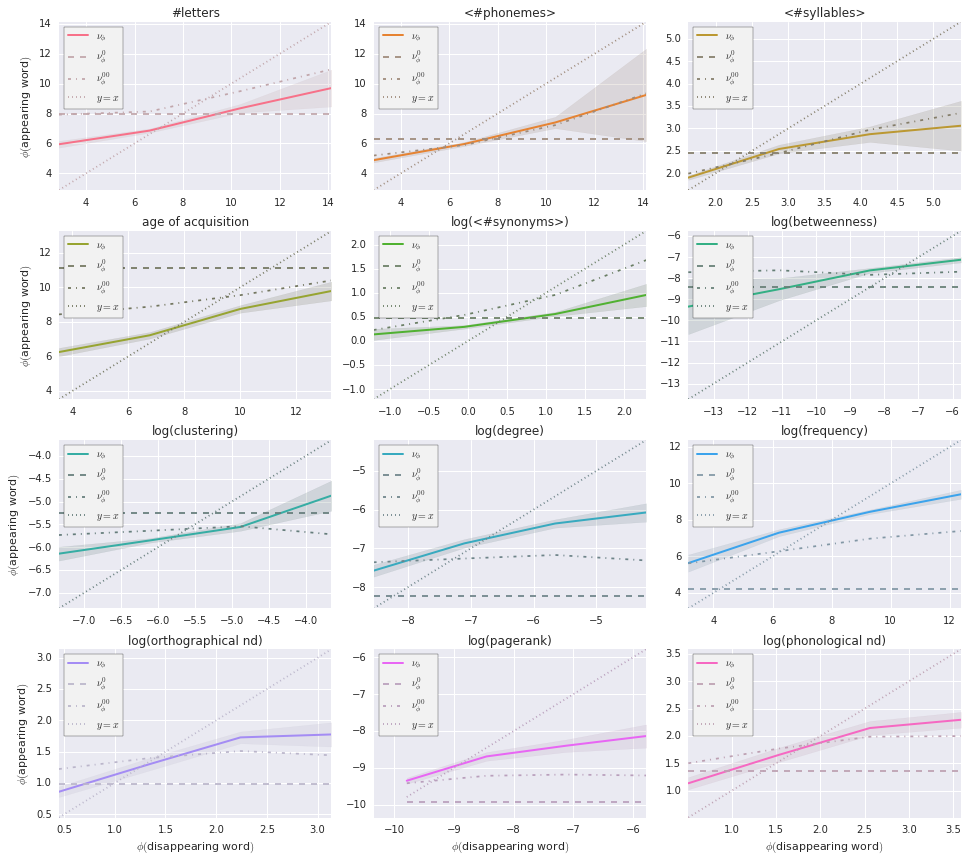

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

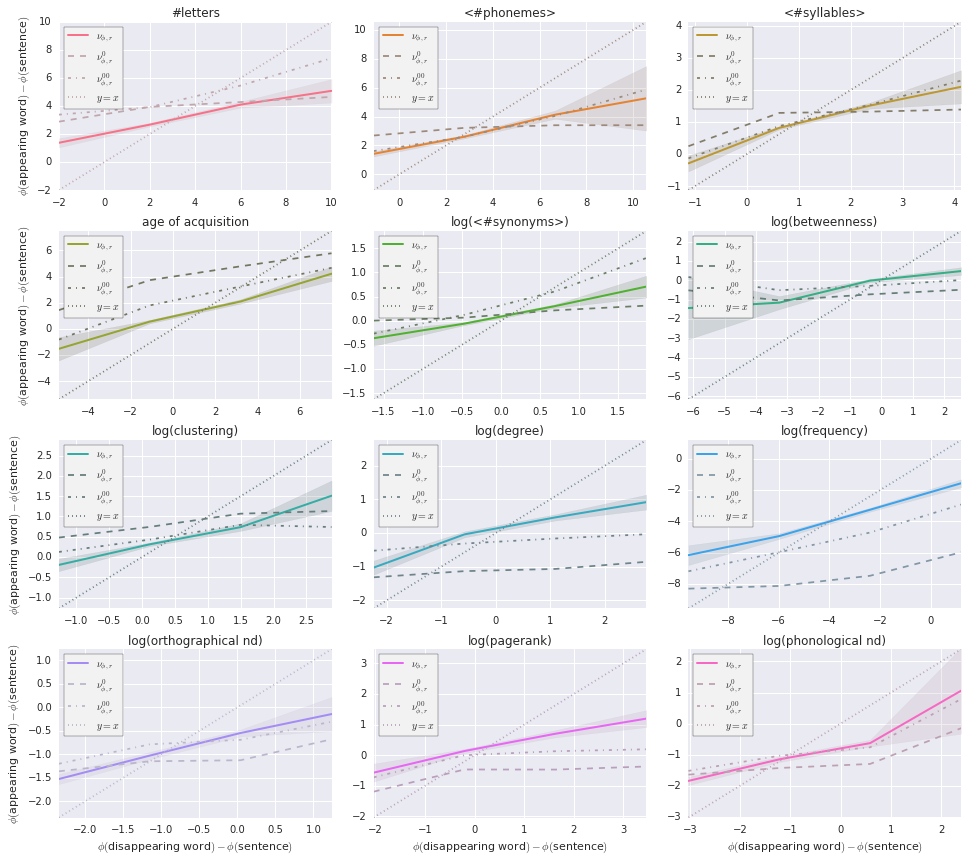

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

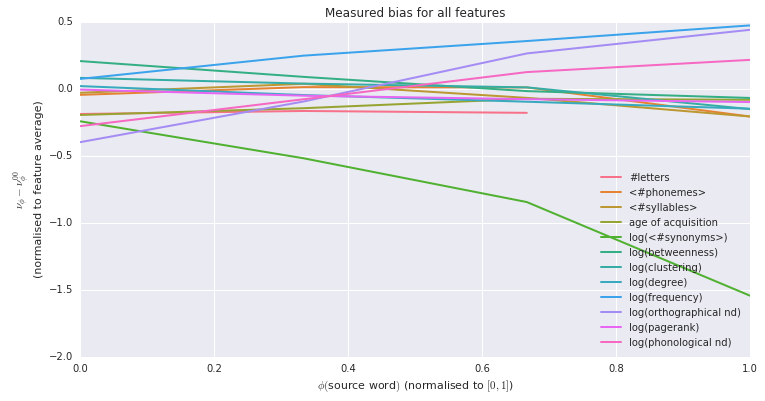

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

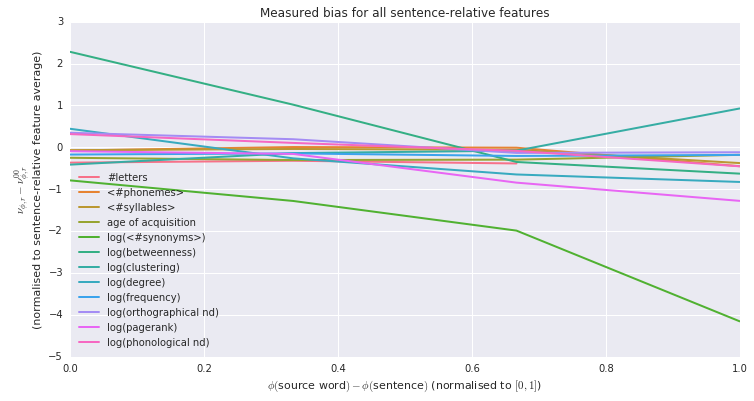

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

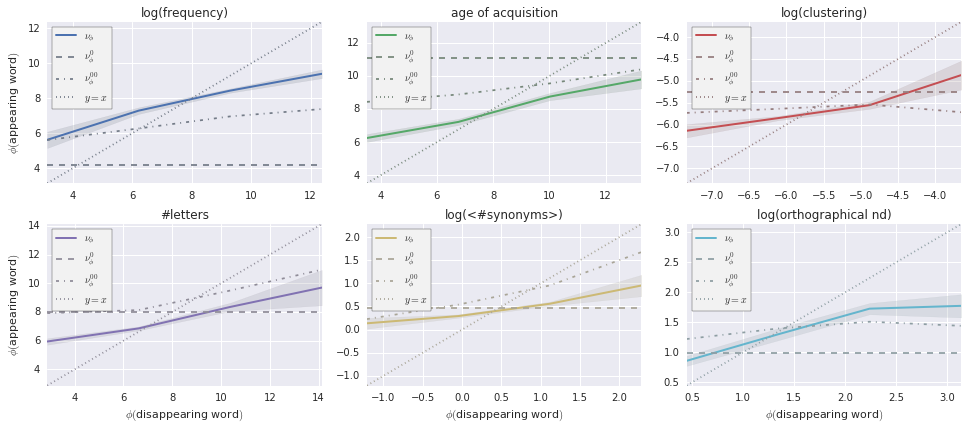

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

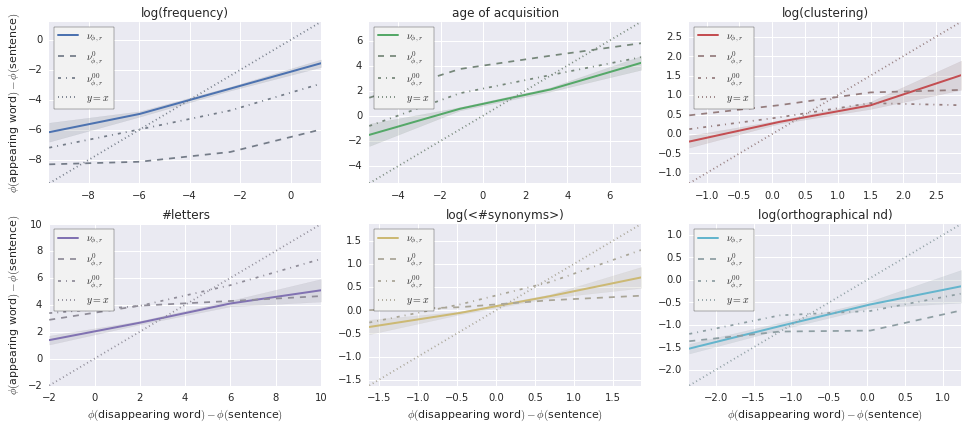

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

And the same with features relative to sentence average

Now $\nu_{\phi} - \nu_{\phi}^{00}$

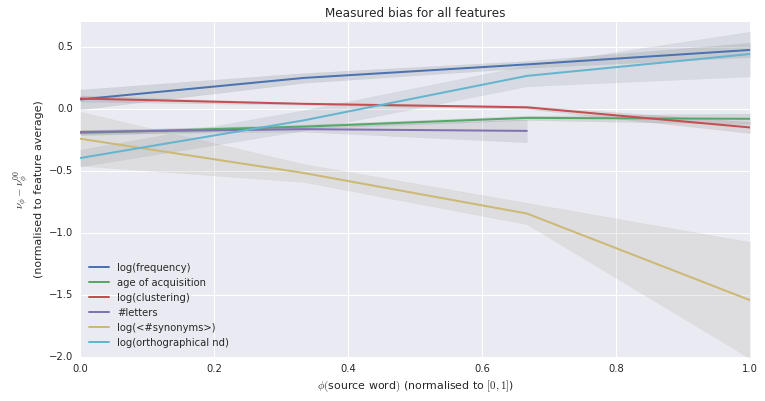

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

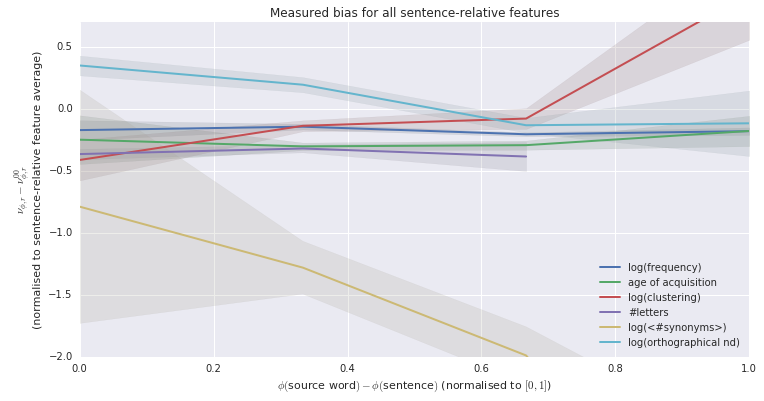

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


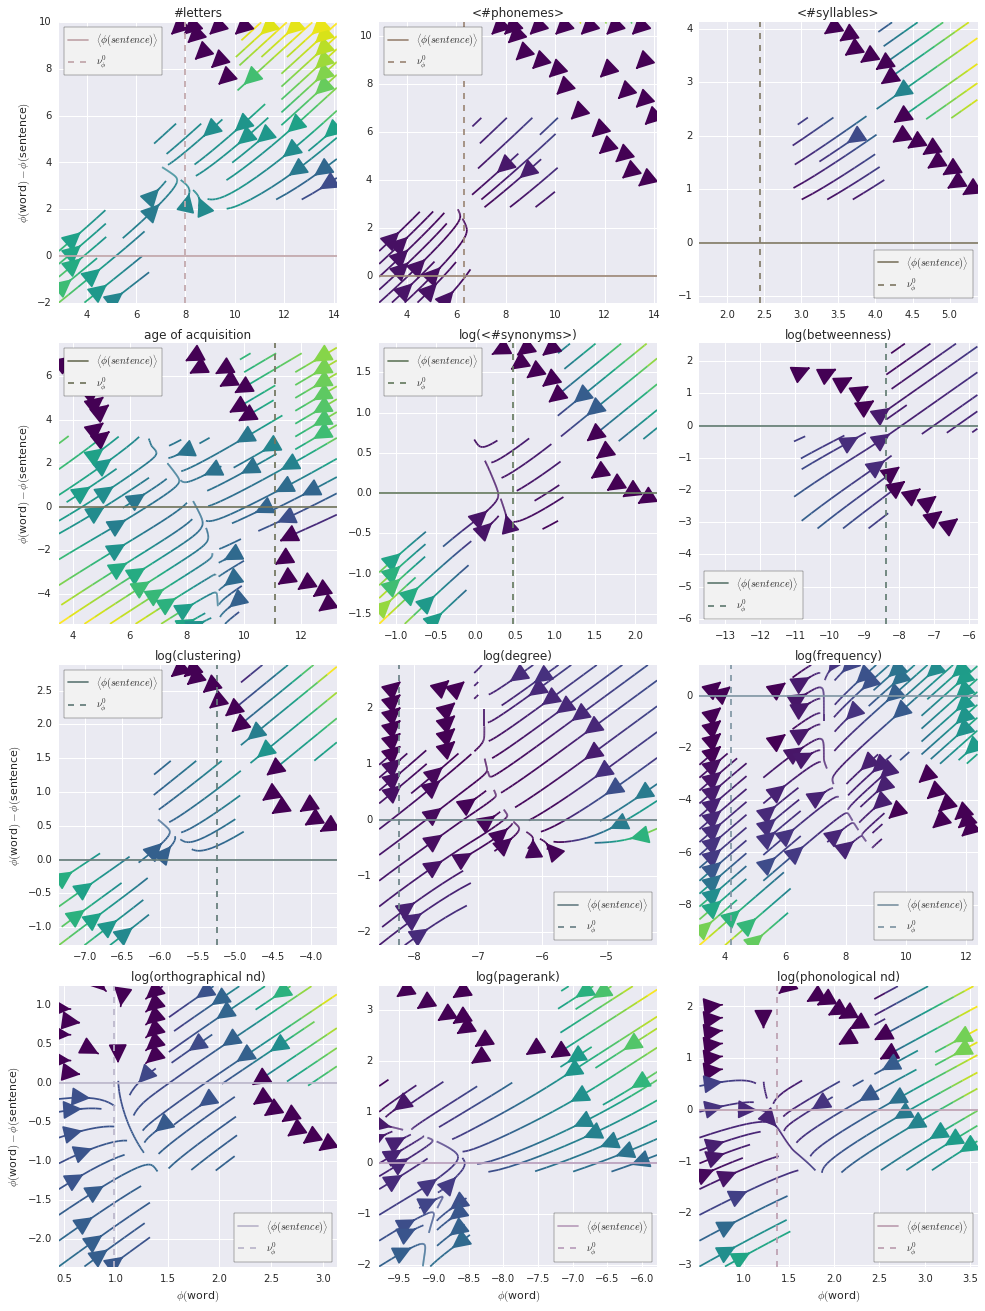

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


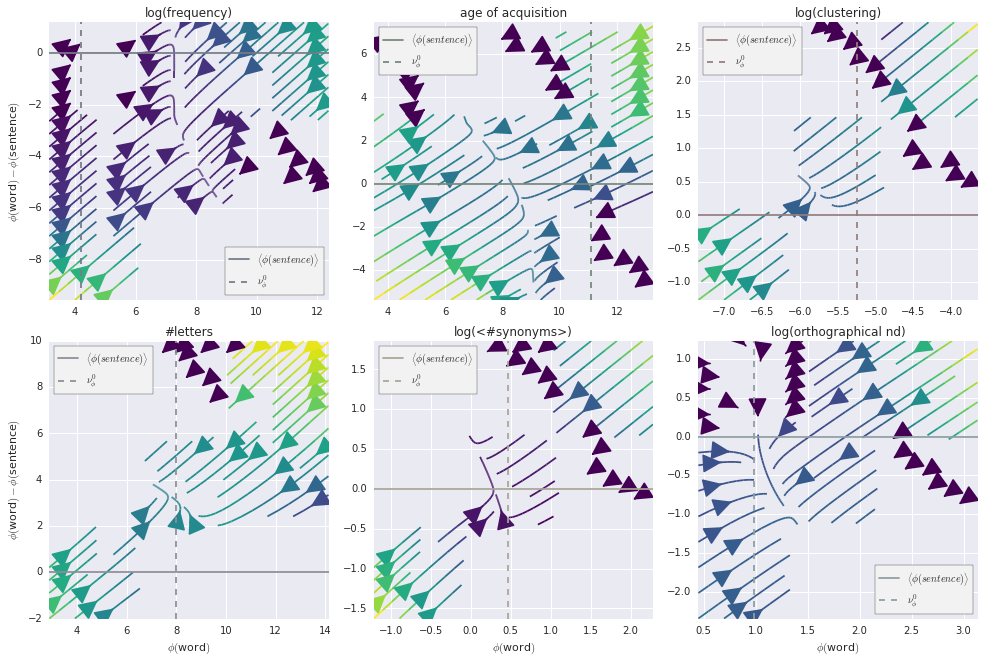

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.52250992  0.17399939  0.08956493  0.07355811  0.03471619  0.02865239
  0.02217452  0.01862682  0.01386789  0.00964897]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographical_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.479563,0.280277,-0.077859,0.246742,0.204008,-0.427455,0.211989,0.278167,-0.413468,0.277754,-0.172520,-0.000778
Component-1,-0.312984,0.407331,-0.140314,0.300155,0.268588,0.432741,-0.166233,0.288657,0.433154,-0.210314,0.154312,-0.017711
Component-2,0.739786,0.307751,-0.139574,0.089922,0.539255,-0.154225,-0.004390,0.062939,-0.047725,0.078036,-0.008680,-0.058615


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 99525) |          | Elapsed Time: 0:00:40 ETA:  46 days, 22:13:25

  0% (  101 of 99525) |                    | Elapsed Time: 0:00:41 ETA:  0:15:58

  0% (  227 of 99525) |                    | Elapsed Time: 0:00:42 ETA:  0:14:01

  0% (  342 of 99525) |                    | Elapsed Time: 0:00:43 ETA:  0:13:54

  0% (  458 of 99525) |                    | Elapsed Time: 0:00:44 ETA:  0:13:48

  0% (  581 of 99525) |                    | Elapsed Time: 0:00:45 ETA:  0:13:34

  0% (  705 of 99525) |                    | Elapsed Time: 0:00:46 ETA:  0:13:23

  0% (  826 of 99525) |                    | Elapsed Time: 0:00:47 ETA:  0:13:19

  0% (  941 of 99525) |                    | Elapsed Time: 0:00:48 ETA:  0:13:21

  1% ( 1073 of 99525) |                    | Elapsed Time: 0:00:49 ETA:  0:13:08

  1% ( 1203 of 99525) |                    | Elapsed Time: 0:00:50 ETA:  0:12:44

  1% ( 1245 of 99525) |                    | Elapsed Time: 0:00:51 ETA:  0:12:45

  1% ( 1369 of 99525) |                    | Elapsed Time: 0:00:52 ETA:  0:12:37

  1% ( 1497 of 99525) |                    | Elapsed Time: 0:00:53 ETA:  0:12:27

  1% ( 1617 of 99525) |                    | Elapsed Time: 0:00:54 ETA:  0:12:28

  1% ( 1747 of 99525) |                    | Elapsed Time: 0:00:55 ETA:  0:12:23

  1% ( 1857 of 99525) |                    | Elapsed Time: 0:00:56 ETA:  0:12:30

  1% ( 1977 of 99525) |                    | Elapsed Time: 0:00:57 ETA:  0:12:25

  2% ( 2131 of 99525) |                    | Elapsed Time: 0:00:58 ETA:  0:12:08

  2% ( 2273 of 99525) |                    | Elapsed Time: 0:00:59 ETA:  0:11:59

  2% ( 2416 of 99525) |                    | Elapsed Time: 0:01:00 ETA:  0:11:48

  2% ( 2489 of 99525) |                    | Elapsed Time: 0:01:00 ETA:  0:11:30

  2% ( 2582 of 99525) |                    | Elapsed Time: 0:01:01 ETA:  0:11:52

  2% ( 2649 of 99525) |                    | Elapsed Time: 0:01:02 ETA:  0:12:31

  2% ( 2716 of 99525) |                    | Elapsed Time: 0:01:03 ETA:  0:13:22

  2% ( 2782 of 99525) |                    | Elapsed Time: 0:01:04 ETA:  0:14:03

  2% ( 2845 of 99525) |                    | Elapsed Time: 0:01:05 ETA:  0:15:02

  2% ( 2910 of 99525) |                    | Elapsed Time: 0:01:06 ETA:  0:16:54

  2% ( 2976 of 99525) |                    | Elapsed Time: 0:01:07 ETA:  0:18:48

  3% ( 3042 of 99525) |                    | Elapsed Time: 0:01:08 ETA:  0:21:16

  3% ( 3109 of 99525) |                    | Elapsed Time: 0:01:09 ETA:  0:23:04

  3% ( 3175 of 99525) |                    | Elapsed Time: 0:01:10 ETA:  0:24:12

  3% ( 3243 of 99525) |                    | Elapsed Time: 0:01:11 ETA:  0:24:11

  3% ( 3316 of 99525) |                    | Elapsed Time: 0:01:12 ETA:  0:23:55

  3% ( 3392 of 99525) |                    | Elapsed Time: 0:01:13 ETA:  0:23:28

  3% ( 3498 of 99525) |                    | Elapsed Time: 0:01:14 ETA:  0:21:49

  3% ( 3604 of 99525) |                    | Elapsed Time: 0:01:15 ETA:  0:20:24

  3% ( 3733 of 99525) |                    | Elapsed Time: 0:01:16 ETA:  0:18:28

  3% ( 3848 of 99525) |                    | Elapsed Time: 0:01:17 ETA:  0:17:10

  3% ( 3955 of 99525) |                    | Elapsed Time: 0:01:18 ETA:  0:16:09

  4% ( 4066 of 99525) |                    | Elapsed Time: 0:01:19 ETA:  0:15:12

  4% ( 4181 of 99525) |                    | Elapsed Time: 0:01:20 ETA:  0:14:23

  4% ( 4303 of 99525) |                    | Elapsed Time: 0:01:21 ETA:  0:13:34

  4% ( 4415 of 99525) |                    | Elapsed Time: 0:01:22 ETA:  0:13:27

  4% ( 4515 of 99525) |                    | Elapsed Time: 0:01:23 ETA:  0:13:32

  4% ( 4639 of 99525) |                    | Elapsed Time: 0:01:24 ETA:  0:13:18

  4% ( 4772 of 99525) |                    | Elapsed Time: 0:01:25 ETA:  0:12:59

  4% ( 4904 of 99525) |                    | Elapsed Time: 0:01:26 ETA:  0:12:44

  5% ( 4977 of 99525) |#                   | Elapsed Time: 0:01:27 ETA:  0:12:30

  5% ( 5123 of 99525) |#                   | Elapsed Time: 0:01:28 ETA:  0:12:01

  5% ( 5292 of 99525) |#                   | Elapsed Time: 0:01:29 ETA:  0:11:21

  5% ( 5465 of 99525) |#                   | Elapsed Time: 0:01:30 ETA:  0:10:46

  5% ( 5629 of 99525) |#                   | Elapsed Time: 0:01:31 ETA:  0:10:13

  5% ( 5803 of 99525) |#                   | Elapsed Time: 0:01:32 ETA:  0:09:32

  5% ( 5968 of 99525) |#                   | Elapsed Time: 0:01:33 ETA:  0:09:10

  6% ( 6140 of 99525) |#                   | Elapsed Time: 0:01:34 ETA:  0:08:50

  6% ( 6221 of 99525) |#                   | Elapsed Time: 0:01:34 ETA:  0:08:36

  6% ( 6393 of 99525) |#                   | Elapsed Time: 0:01:35 ETA:  0:08:22

  6% ( 6568 of 99525) |#                   | Elapsed Time: 0:01:36 ETA:  0:08:09

  6% ( 6710 of 99525) |#                   | Elapsed Time: 0:01:37 ETA:  0:08:19

  6% ( 6847 of 99525) |#                   | Elapsed Time: 0:01:38 ETA:  0:08:34

  7% ( 6980 of 99525) |#                   | Elapsed Time: 0:01:39 ETA:  0:08:47

  7% ( 7115 of 99525) |#                   | Elapsed Time: 0:01:40 ETA:  0:09:05

  7% ( 7254 of 99525) |#                   | Elapsed Time: 0:01:41 ETA:  0:09:17

  7% ( 7391 of 99525) |#                   | Elapsed Time: 0:01:42 ETA:  0:09:34

  7% ( 7465 of 99525) |#                   | Elapsed Time: 0:01:43 ETA:  0:09:39

  7% ( 7606 of 99525) |#                   | Elapsed Time: 0:01:44 ETA:  0:09:56

  7% ( 7747 of 99525) |#                   | Elapsed Time: 0:01:45 ETA:  0:10:15

  7% ( 7889 of 99525) |#                   | Elapsed Time: 0:01:46 ETA:  0:10:14

  8% ( 8010 of 99525) |#                   | Elapsed Time: 0:01:47 ETA:  0:10:22

  8% ( 8110 of 99525) |#                   | Elapsed Time: 0:01:48 ETA:  0:10:43

  8% ( 8210 of 99525) |#                   | Elapsed Time: 0:01:49 ETA:  0:11:07

  8% ( 8272 of 99525) |#                   | Elapsed Time: 0:01:50 ETA:  0:12:05

  8% ( 8357 of 99525) |#                   | Elapsed Time: 0:01:51 ETA:  0:12:50

  8% ( 8489 of 99525) |#                   | Elapsed Time: 0:01:52 ETA:  0:12:47

  8% ( 8620 of 99525) |#                   | Elapsed Time: 0:01:53 ETA:  0:12:54

  8% ( 8709 of 99525) |#                   | Elapsed Time: 0:01:54 ETA:  0:13:11

  8% ( 8839 of 99525) |#                   | Elapsed Time: 0:01:55 ETA:  0:13:22

  8% ( 8908 of 99525) |#                   | Elapsed Time: 0:01:56 ETA:  0:14:15

  9% ( 9007 of 99525) |#                   | Elapsed Time: 0:01:57 ETA:  0:14:14

  9% ( 9091 of 99525) |#                   | Elapsed Time: 0:01:58 ETA:  0:14:30

  9% ( 9160 of 99525) |#                   | Elapsed Time: 0:01:59 ETA:  0:14:22

  9% ( 9229 of 99525) |#                   | Elapsed Time: 0:02:00 ETA:  0:14:38

  9% ( 9302 of 99525) |#                   | Elapsed Time: 0:02:01 ETA:  0:15:51

  9% ( 9369 of 99525) |#                   | Elapsed Time: 0:02:02 ETA:  0:17:22

  9% ( 9466 of 99525) |#                   | Elapsed Time: 0:02:03 ETA:  0:17:47

  9% ( 9646 of 99525) |#                   | Elapsed Time: 0:02:04 ETA:  0:16:32

  9% ( 9785 of 99525) |#                   | Elapsed Time: 0:02:05 ETA:  0:15:01

  9% ( 9911 of 99525) |#                   | Elapsed Time: 0:02:06 ETA:  0:14:30

 10% ( 9953 of 99525) |##                  | Elapsed Time: 0:02:06 ETA:  0:14:12

 10% (10050 of 99525) |##                  | Elapsed Time: 0:02:07 ETA:  0:13:40

 10% (10144 of 99525) |##                  | Elapsed Time: 0:02:08 ETA:  0:13:13

 10% (10238 of 99525) |##                  | Elapsed Time: 0:02:09 ETA:  0:12:50

 10% (10330 of 99525) |##                  | Elapsed Time: 0:02:10 ETA:  0:12:26

 10% (10441 of 99525) |##                  | Elapsed Time: 0:02:11 ETA:  0:12:12

 10% (10591 of 99525) |##                  | Elapsed Time: 0:02:12 ETA:  0:12:38

 10% (10736 of 99525) |##                  | Elapsed Time: 0:02:13 ETA:  0:12:32

 10% (10878 of 99525) |##                  | Elapsed Time: 0:02:14 ETA:  0:12:16

 11% (10993 of 99525) |##                  | Elapsed Time: 0:02:15 ETA:  0:12:08

 11% (11140 of 99525) |##                  | Elapsed Time: 0:02:16 ETA:  0:11:27

 11% (11197 of 99525) |##                  | Elapsed Time: 0:02:17 ETA:  0:11:04

 11% (11288 of 99525) |##                  | Elapsed Time: 0:02:18 ETA:  0:11:06

 11% (11391 of 99525) |##                  | Elapsed Time: 0:02:19 ETA:  0:10:56

 11% (11498 of 99525) |##                  | Elapsed Time: 0:02:20 ETA:  0:10:59

 11% (11606 of 99525) |##                  | Elapsed Time: 0:02:21 ETA:  0:11:32

 11% (11708 of 99525) |##                  | Elapsed Time: 0:02:22 ETA:  0:12:08

 11% (11812 of 99525) |##                  | Elapsed Time: 0:02:23 ETA:  0:12:42

 11% (11925 of 99525) |##                  | Elapsed Time: 0:02:24 ETA:  0:12:43

 12% (12037 of 99525) |##                  | Elapsed Time: 0:02:25 ETA:  0:13:17

 12% (12147 of 99525) |##                  | Elapsed Time: 0:02:26 ETA:  0:13:21

 12% (12257 of 99525) |##                  | Elapsed Time: 0:02:27 ETA:  0:13:02

 12% (12366 of 99525) |##                  | Elapsed Time: 0:02:28 ETA:  0:12:55

 12% (12441 of 99525) |##                  | Elapsed Time: 0:02:29 ETA:  0:12:54

 12% (12549 of 99525) |##                  | Elapsed Time: 0:02:30 ETA:  0:12:51

 12% (12660 of 99525) |##                  | Elapsed Time: 0:02:31 ETA:  0:12:43

 12% (12771 of 99525) |##                  | Elapsed Time: 0:02:32 ETA:  0:12:35

 12% (12879 of 99525) |##                  | Elapsed Time: 0:02:33 ETA:  0:12:39

 13% (12986 of 99525) |##                  | Elapsed Time: 0:02:34 ETA:  0:12:42

 13% (13097 of 99525) |##                  | Elapsed Time: 0:02:35 ETA:  0:12:41

 13% (13205 of 99525) |##                  | Elapsed Time: 0:02:36 ETA:  0:12:41

 13% (13313 of 99525) |##                  | Elapsed Time: 0:02:37 ETA:  0:12:42

 13% (13424 of 99525) |##                  | Elapsed Time: 0:02:38 ETA:  0:12:38

 13% (13552 of 99525) |##                  | Elapsed Time: 0:02:39 ETA:  0:12:18

 13% (13685 of 99525) |##                  | Elapsed Time: 0:02:40 ETA:  0:11:55

 13% (13812 of 99525) |##                  | Elapsed Time: 0:02:41 ETA:  0:11:37

 14% (13946 of 99525) |##                  | Elapsed Time: 0:02:42 ETA:  0:11:11

 14% (14082 of 99525) |##                  | Elapsed Time: 0:02:43 ETA:  0:10:49

 14% (14227 of 99525) |##                  | Elapsed Time: 0:02:44 ETA:  0:10:19

 14% (14351 of 99525) |##                  | Elapsed Time: 0:02:45 ETA:  0:10:06

 14% (14477 of 99525) |##                  | Elapsed Time: 0:02:46 ETA:  0:09:54

 14% (14596 of 99525) |##                  | Elapsed Time: 0:02:47 ETA:  0:10:00

 14% (14731 of 99525) |##                  | Elapsed Time: 0:02:48 ETA:  0:09:57

 14% (14877 of 99525) |##                  | Elapsed Time: 0:02:49 ETA:  0:09:46

 15% (14929 of 99525) |###                 | Elapsed Time: 0:02:49 ETA:  0:09:38

 15% (15072 of 99525) |###                 | Elapsed Time: 0:02:50 ETA:  0:09:31

 15% (15217 of 99525) |###                 | Elapsed Time: 0:02:51 ETA:  0:09:24

 15% (15363 of 99525) |###                 | Elapsed Time: 0:02:52 ETA:  0:09:22

 15% (15510 of 99525) |###                 | Elapsed Time: 0:02:53 ETA:  0:09:06

 15% (15660 of 99525) |###                 | Elapsed Time: 0:02:54 ETA:  0:08:50

 15% (15809 of 99525) |###                 | Elapsed Time: 0:02:55 ETA:  0:08:31

 16% (15936 of 99525) |###                 | Elapsed Time: 0:02:56 ETA:  0:08:35

 16% (16063 of 99525) |###                 | Elapsed Time: 0:02:57 ETA:  0:08:45

 16% (16173 of 99525) |###                 | Elapsed Time: 0:02:58 ETA:  0:08:57

 16% (16298 of 99525) |###                 | Elapsed Time: 0:02:59 ETA:  0:09:06

 16% (16427 of 99525) |###                 | Elapsed Time: 0:03:00 ETA:  0:09:15

 16% (16557 of 99525) |###                 | Elapsed Time: 0:03:01 ETA:  0:09:24

 16% (16663 of 99525) |###                 | Elapsed Time: 0:03:02 ETA:  0:09:50

 16% (16777 of 99525) |###                 | Elapsed Time: 0:03:03 ETA:  0:10:14

 16% (16879 of 99525) |###                 | Elapsed Time: 0:03:04 ETA:  0:10:48

 17% (16984 of 99525) |###                 | Elapsed Time: 0:03:06 ETA:  0:12:00

 17% (17101 of 99525) |###                 | Elapsed Time: 0:03:07 ETA:  0:12:08

 17% (17205 of 99525) |###                 | Elapsed Time: 0:03:08 ETA:  0:12:26

 17% (17312 of 99525) |###                 | Elapsed Time: 0:03:09 ETA:  0:12:43

 17% (17417 of 99525) |###                 | Elapsed Time: 0:03:10 ETA:  0:12:55

 17% (17535 of 99525) |###                 | Elapsed Time: 0:03:11 ETA:  0:13:06

 17% (17653 of 99525) |###                 | Elapsed Time: 0:03:12 ETA:  0:12:53

 17% (17762 of 99525) |###                 | Elapsed Time: 0:03:13 ETA:  0:12:56

 17% (17886 of 99525) |###                 | Elapsed Time: 0:03:14 ETA:  0:12:33

 18% (18011 of 99525) |###                 | Elapsed Time: 0:03:15 ETA:  0:11:17

 18% (18131 of 99525) |###                 | Elapsed Time: 0:03:16 ETA:  0:11:13

 18% (18258 of 99525) |###                 | Elapsed Time: 0:03:17 ETA:  0:10:47

 18% (18387 of 99525) |###                 | Elapsed Time: 0:03:18 ETA:  0:10:28

 18% (18511 of 99525) |###                 | Elapsed Time: 0:03:19 ETA:  0:10:22

 18% (18661 of 99525) |###                 | Elapsed Time: 0:03:20 ETA:  0:10:06

 18% (18796 of 99525) |###                 | Elapsed Time: 0:03:21 ETA:  0:09:45

 19% (18925 of 99525) |###                 | Elapsed Time: 0:03:22 ETA:  0:09:40

 19% (19051 of 99525) |###                 | Elapsed Time: 0:03:23 ETA:  0:09:39

 19% (19152 of 99525) |###                 | Elapsed Time: 0:03:24 ETA:  0:09:52

 19% (19251 of 99525) |###                 | Elapsed Time: 0:03:25 ETA:  0:10:14

 19% (19364 of 99525) |###                 | Elapsed Time: 0:03:26 ETA:  0:10:26

 19% (19458 of 99525) |###                 | Elapsed Time: 0:03:27 ETA:  0:10:52

 19% (19519 of 99525) |###                 | Elapsed Time: 0:03:28 ETA:  0:11:59

 19% (19594 of 99525) |###                 | Elapsed Time: 0:03:29 ETA:  0:12:36

 19% (19693 of 99525) |###                 | Elapsed Time: 0:03:30 ETA:  0:13:14

 19% (19813 of 99525) |###                 | Elapsed Time: 0:03:31 ETA:  0:13:23

 20% (19905 of 99525) |####                | Elapsed Time: 0:03:32 ETA:  0:13:36

 20% (20029 of 99525) |####                | Elapsed Time: 0:03:33 ETA:  0:13:07

 20% (20153 of 99525) |####                | Elapsed Time: 0:03:34 ETA:  0:12:38

 20% (20279 of 99525) |####                | Elapsed Time: 0:03:35 ETA:  0:12:24

 20% (20372 of 99525) |####                | Elapsed Time: 0:03:36 ETA:  0:12:23

 20% (20511 of 99525) |####                | Elapsed Time: 0:03:37 ETA:  0:11:07

 20% (20653 of 99525) |####                | Elapsed Time: 0:03:38 ETA:  0:10:10

 20% (20801 of 99525) |####                | Elapsed Time: 0:03:39 ETA:  0:09:32

 21% (20939 of 99525) |####                | Elapsed Time: 0:03:40 ETA:  0:09:18

 21% (21082 of 99525) |####                | Elapsed Time: 0:03:41 ETA:  0:09:03

 21% (21150 of 99525) |####                | Elapsed Time: 0:03:41 ETA:  0:08:49

 21% (21309 of 99525) |####                | Elapsed Time: 0:03:42 ETA:  0:08:26

 21% (21468 of 99525) |####                | Elapsed Time: 0:03:43 ETA:  0:08:04

 21% (21619 of 99525) |####                | Elapsed Time: 0:03:44 ETA:  0:07:30

 21% (21715 of 99525) |####                | Elapsed Time: 0:03:45 ETA:  0:07:52

 21% (21811 of 99525) |####                | Elapsed Time: 0:03:46 ETA:  0:08:19

 22% (21908 of 99525) |####                | Elapsed Time: 0:03:47 ETA:  0:08:52

 22% (22037 of 99525) |####                | Elapsed Time: 0:03:48 ETA:  0:08:57

 22% (22174 of 99525) |####                | Elapsed Time: 0:03:49 ETA:  0:09:00

 22% (22318 of 99525) |####                | Elapsed Time: 0:03:50 ETA:  0:08:59

 22% (22394 of 99525) |####                | Elapsed Time: 0:03:51 ETA:  0:09:13

 22% (22542 of 99525) |####                | Elapsed Time: 0:03:52 ETA:  0:09:20

 22% (22689 of 99525) |####                | Elapsed Time: 0:03:53 ETA:  0:09:23

 22% (22831 of 99525) |####                | Elapsed Time: 0:03:54 ETA:  0:08:49

 23% (22968 of 99525) |####                | Elapsed Time: 0:03:55 ETA:  0:08:21

 23% (23108 of 99525) |####                | Elapsed Time: 0:03:56 ETA:  0:07:53

 23% (23256 of 99525) |####                | Elapsed Time: 0:03:57 ETA:  0:07:41

 23% (23392 of 99525) |####                | Elapsed Time: 0:03:58 ETA:  0:07:41

 23% (23508 of 99525) |####                | Elapsed Time: 0:03:59 ETA:  0:07:56

 23% (23638 of 99525) |####                | Elapsed Time: 0:04:00 ETA:  0:08:27

 23% (23745 of 99525) |####                | Elapsed Time: 0:04:01 ETA:  0:08:55

 23% (23860 of 99525) |####                | Elapsed Time: 0:04:02 ETA:  0:09:14

 24% (24018 of 99525) |####                | Elapsed Time: 0:04:03 ETA:  0:08:57

 24% (24185 of 99525) |####                | Elapsed Time: 0:04:04 ETA:  0:08:36

 24% (24338 of 99525) |####                | Elapsed Time: 0:04:05 ETA:  0:08:31

 24% (24486 of 99525) |####                | Elapsed Time: 0:04:06 ETA:  0:08:22

 24% (24651 of 99525) |####                | Elapsed Time: 0:04:07 ETA:  0:07:49

 24% (24784 of 99525) |####                | Elapsed Time: 0:04:08 ETA:  0:07:33

 25% (24882 of 99525) |#####               | Elapsed Time: 0:04:09 ETA:  0:07:51

 25% (25001 of 99525) |#####               | Elapsed Time: 0:04:10 ETA:  0:07:42

 25% (25126 of 99525) |#####               | Elapsed Time: 0:04:11 ETA:  0:07:36

 25% (25251 of 99525) |#####               | Elapsed Time: 0:04:12 ETA:  0:07:54

 25% (25367 of 99525) |#####               | Elapsed Time: 0:04:13 ETA:  0:08:25

 25% (25512 of 99525) |#####               | Elapsed Time: 0:04:14 ETA:  0:08:29

 25% (25679 of 99525) |#####               | Elapsed Time: 0:04:15 ETA:  0:08:17

 25% (25803 of 99525) |#####               | Elapsed Time: 0:04:16 ETA:  0:08:43

 26% (25933 of 99525) |#####               | Elapsed Time: 0:04:17 ETA:  0:08:44

 26% (26059 of 99525) |#####               | Elapsed Time: 0:04:18 ETA:  0:08:27

 26% (26126 of 99525) |#####               | Elapsed Time: 0:04:18 ETA:  0:08:18

 26% (26248 of 99525) |#####               | Elapsed Time: 0:04:19 ETA:  0:08:18

 26% (26407 of 99525) |#####               | Elapsed Time: 0:04:20 ETA:  0:07:55

 26% (26554 of 99525) |#####               | Elapsed Time: 0:04:21 ETA:  0:07:33

 26% (26685 of 99525) |#####               | Elapsed Time: 0:04:22 ETA:  0:07:41

 26% (26850 of 99525) |#####               | Elapsed Time: 0:04:23 ETA:  0:07:41

 27% (27018 of 99525) |#####               | Elapsed Time: 0:04:24 ETA:  0:07:13

 27% (27186 of 99525) |#####               | Elapsed Time: 0:04:25 ETA:  0:06:50

 27% (27370 of 99525) |#####               | Elapsed Time: 0:04:26 ETA:  0:06:22

 27% (27531 of 99525) |#####               | Elapsed Time: 0:04:27 ETA:  0:06:01

 27% (27688 of 99525) |#####               | Elapsed Time: 0:04:28 ETA:  0:06:01

 27% (27846 of 99525) |#####               | Elapsed Time: 0:04:30 ETA:  0:05:55

 28% (28000 of 99525) |#####               | Elapsed Time: 0:04:31 ETA:  0:05:43

 28% (28132 of 99525) |#####               | Elapsed Time: 0:04:32 ETA:  0:05:58

 28% (28283 of 99525) |#####               | Elapsed Time: 0:04:33 ETA:  0:06:05

 28% (28451 of 99525) |#####               | Elapsed Time: 0:04:34 ETA:  0:06:04

 28% (28614 of 99525) |#####               | Elapsed Time: 0:04:35 ETA:  0:06:05

 28% (28780 of 99525) |#####               | Elapsed Time: 0:04:36 ETA:  0:06:00

 29% (28944 of 99525) |#####               | Elapsed Time: 0:04:37 ETA:  0:05:58

 29% (29109 of 99525) |#####               | Elapsed Time: 0:04:38 ETA:  0:05:53

 29% (29269 of 99525) |#####               | Elapsed Time: 0:04:39 ETA:  0:05:51

 29% (29368 of 99525) |#####               | Elapsed Time: 0:04:40 ETA:  0:06:16

 29% (29482 of 99525) |#####               | Elapsed Time: 0:04:41 ETA:  0:06:24

 29% (29607 of 99525) |#####               | Elapsed Time: 0:04:42 ETA:  0:06:37

 29% (29741 of 99525) |#####               | Elapsed Time: 0:04:43 ETA:  0:06:54

 30% (29858 of 99525) |######              | Elapsed Time: 0:04:43 ETA:  0:07:04

 30% (30013 of 99525) |######              | Elapsed Time: 0:04:44 ETA:  0:07:10

 30% (30140 of 99525) |######              | Elapsed Time: 0:04:45 ETA:  0:07:31

 30% (30298 of 99525) |######              | Elapsed Time: 0:04:46 ETA:  0:07:34

 30% (30460 of 99525) |######              | Elapsed Time: 0:04:47 ETA:  0:07:32

 30% (30580 of 99525) |######              | Elapsed Time: 0:04:48 ETA:  0:07:18

 30% (30714 of 99525) |######              | Elapsed Time: 0:04:49 ETA:  0:07:05

 30% (30824 of 99525) |######              | Elapsed Time: 0:04:50 ETA:  0:07:12

 31% (30973 of 99525) |######              | Elapsed Time: 0:04:51 ETA:  0:07:03

 31% (31102 of 99525) |######              | Elapsed Time: 0:04:52 ETA:  0:06:51

 31% (31269 of 99525) |######              | Elapsed Time: 0:04:53 ETA:  0:06:43

 31% (31429 of 99525) |######              | Elapsed Time: 0:04:54 ETA:  0:06:24

 31% (31590 of 99525) |######              | Elapsed Time: 0:04:55 ETA:  0:06:22

 31% (31751 of 99525) |######              | Elapsed Time: 0:04:56 ETA:  0:06:22

 32% (31884 of 99525) |######              | Elapsed Time: 0:04:57 ETA:  0:06:14

 32% (32012 of 99525) |######              | Elapsed Time: 0:04:58 ETA:  0:06:17

 32% (32111 of 99525) |######              | Elapsed Time: 0:04:59 ETA:  0:06:22

 32% (32192 of 99525) |######              | Elapsed Time: 0:05:00 ETA:  0:06:59

 32% (32291 of 99525) |######              | Elapsed Time: 0:05:01 ETA:  0:07:36

 32% (32346 of 99525) |######              | Elapsed Time: 0:05:02 ETA:  0:08:01

 32% (32469 of 99525) |######              | Elapsed Time: 0:05:03 ETA:  0:08:27

 32% (32575 of 99525) |######              | Elapsed Time: 0:05:04 ETA:  0:09:11

 32% (32677 of 99525) |######              | Elapsed Time: 0:05:05 ETA:  0:10:05

 32% (32784 of 99525) |######              | Elapsed Time: 0:05:06 ETA:  0:10:29

 33% (32923 of 99525) |######              | Elapsed Time: 0:05:07 ETA:  0:10:17

 33% (33039 of 99525) |######              | Elapsed Time: 0:05:08 ETA:  0:09:59

 33% (33160 of 99525) |######              | Elapsed Time: 0:05:09 ETA:  0:09:20

 33% (33314 of 99525) |######              | Elapsed Time: 0:05:10 ETA:  0:08:33

 33% (33466 of 99525) |######              | Elapsed Time: 0:05:11 ETA:  0:08:11

 33% (33590 of 99525) |######              | Elapsed Time: 0:05:11 ETA:  0:07:53

 33% (33719 of 99525) |######              | Elapsed Time: 0:05:12 ETA:  0:07:36

 33% (33818 of 99525) |######              | Elapsed Time: 0:05:14 ETA:  0:07:37

 34% (33935 of 99525) |######              | Elapsed Time: 0:05:15 ETA:  0:07:30

 34% (34048 of 99525) |######              | Elapsed Time: 0:05:16 ETA:  0:07:47

 34% (34159 of 99525) |######              | Elapsed Time: 0:05:17 ETA:  0:07:49

 34% (34316 of 99525) |######              | Elapsed Time: 0:05:18 ETA:  0:07:23

 34% (34471 of 99525) |######              | Elapsed Time: 0:05:19 ETA:  0:07:21

 34% (34567 of 99525) |######              | Elapsed Time: 0:05:20 ETA:  0:08:00

 34% (34685 of 99525) |######              | Elapsed Time: 0:05:21 ETA:  0:08:21

 34% (34782 of 99525) |######              | Elapsed Time: 0:05:22 ETA:  0:08:46

 35% (34834 of 99525) |#######             | Elapsed Time: 0:05:22 ETA:  0:09:08

 35% (34966 of 99525) |#######             | Elapsed Time: 0:05:23 ETA:  0:08:55

 35% (35119 of 99525) |#######             | Elapsed Time: 0:05:24 ETA:  0:08:21

 35% (35238 of 99525) |#######             | Elapsed Time: 0:05:25 ETA:  0:08:14

 35% (35341 of 99525) |#######             | Elapsed Time: 0:05:26 ETA:  0:08:56

 35% (35458 of 99525) |#######             | Elapsed Time: 0:05:27 ETA:  0:09:29

 35% (35571 of 99525) |#######             | Elapsed Time: 0:05:28 ETA:  0:09:12

 35% (35709 of 99525) |#######             | Elapsed Time: 0:05:29 ETA:  0:08:53

 36% (35864 of 99525) |#######             | Elapsed Time: 0:05:30 ETA:  0:08:06

 36% (35986 of 99525) |#######             | Elapsed Time: 0:05:31 ETA:  0:07:29

 36% (36078 of 99525) |#######             | Elapsed Time: 0:05:32 ETA:  0:07:21

 36% (36189 of 99525) |#######             | Elapsed Time: 0:05:33 ETA:  0:07:51

 36% (36341 of 99525) |#######             | Elapsed Time: 0:05:34 ETA:  0:07:25

 36% (36480 of 99525) |#######             | Elapsed Time: 0:05:35 ETA:  0:07:00

 36% (36622 of 99525) |#######             | Elapsed Time: 0:05:36 ETA:  0:06:42

 36% (36738 of 99525) |#######             | Elapsed Time: 0:05:37 ETA:  0:06:40

 37% (36850 of 99525) |#######             | Elapsed Time: 0:05:38 ETA:  0:06:56

 37% (36963 of 99525) |#######             | Elapsed Time: 0:05:39 ETA:  0:07:24

 37% (37079 of 99525) |#######             | Elapsed Time: 0:05:40 ETA:  0:07:26

 37% (37200 of 99525) |#######             | Elapsed Time: 0:05:41 ETA:  0:07:40

 37% (37322 of 99525) |#######             | Elapsed Time: 0:05:42 ETA:  0:07:18

 37% (37453 of 99525) |#######             | Elapsed Time: 0:05:43 ETA:  0:07:32

 37% (37597 of 99525) |#######             | Elapsed Time: 0:05:44 ETA:  0:07:27

 37% (37747 of 99525) |#######             | Elapsed Time: 0:05:45 ETA:  0:07:21

 38% (37905 of 99525) |#######             | Elapsed Time: 0:05:46 ETA:  0:06:51

 38% (38014 of 99525) |#######             | Elapsed Time: 0:05:47 ETA:  0:06:52

 38% (38158 of 99525) |#######             | Elapsed Time: 0:05:48 ETA:  0:06:31

 38% (38287 of 99525) |#######             | Elapsed Time: 0:05:49 ETA:  0:06:26

 38% (38381 of 99525) |#######             | Elapsed Time: 0:05:50 ETA:  0:06:42

 38% (38461 of 99525) |#######             | Elapsed Time: 0:05:51 ETA:  0:07:22

 38% (38504 of 99525) |#######            | Elapsed Time: 0:13:08 ETA:  11:29:28

 38% (38566 of 99525) |#######            | Elapsed Time: 0:13:09 ETA:  14:46:34

 38% (38595 of 99525) |#######            | Elapsed Time: 0:13:10 ETA:  17:34:47

 38% (38612 of 99525) |#######            | Elapsed Time: 0:13:11 ETA:  20:19:11

 38% (38635 of 99525) |#####        | Elapsed Time: 0:13:12 ETA:  1 day, 1:31:50

 38% (38659 of 99525) |#####        | Elapsed Time: 0:13:13 ETA:  1 day, 8:47:48

 38% (38676 of 99525) |####        | Elapsed Time: 0:13:14 ETA:  1 day, 17:25:01

 38% (38692 of 99525) |####        | Elapsed Time: 0:13:15 ETA:  2 days, 4:57:15

 38% (38706 of 99525) |#######             | Elapsed Time: 0:13:16 ETA:  0:54:26

 38% (38721 of 99525) |#######             | Elapsed Time: 0:13:17 ETA:  1:13:51

 38% (38736 of 99525) |#######             | Elapsed Time: 0:13:18 ETA:  1:17:08

 38% (38753 of 99525) |#######             | Elapsed Time: 0:13:19 ETA:  1:23:58

 38% (38789 of 99525) |#######             | Elapsed Time: 0:13:21 ETA:  1:13:17

 39% (38863 of 99525) |#######             | Elapsed Time: 0:13:22 ETA:  0:53:49

 39% (38944 of 99525) |#######             | Elapsed Time: 0:13:23 ETA:  0:40:14

 39% (39012 of 99525) |#######             | Elapsed Time: 0:13:24 ETA:  0:31:57

 39% (39097 of 99525) |#######             | Elapsed Time: 0:13:25 ETA:  0:24:07

 39% (39195 of 99525) |#######             | Elapsed Time: 0:13:26 ETA:  0:17:33

 39% (39274 of 99525) |#######             | Elapsed Time: 0:13:27 ETA:  0:13:44

 39% (39368 of 99525) |#######             | Elapsed Time: 0:13:28 ETA:  0:10:18

 39% (39451 of 99525) |#######             | Elapsed Time: 0:13:29 ETA:  0:08:03

 39% (39546 of 99525) |#######             | Elapsed Time: 0:13:30 ETA:  0:06:19

 39% (39635 of 99525) |#######             | Elapsed Time: 0:13:31 ETA:  0:05:56

 39% (39719 of 99525) |#######             | Elapsed Time: 0:13:32 ETA:  0:05:50

 40% (39810 of 99525) |########            | Elapsed Time: 0:13:33 ETA:  0:05:21

 40% (39900 of 99525) |########            | Elapsed Time: 0:13:34 ETA:  0:05:33

 40% (39994 of 99525) |########            | Elapsed Time: 0:13:35 ETA:  0:05:09

 40% (40079 of 99525) |########            | Elapsed Time: 0:13:36 ETA:  0:05:22

 40% (40140 of 99525) |########            | Elapsed Time: 0:13:37 ETA:  0:05:56

 40% (40223 of 99525) |########            | Elapsed Time: 0:13:38 ETA:  0:06:18

 40% (40303 of 99525) |########            | Elapsed Time: 0:13:39 ETA:  0:06:32

 40% (40411 of 99525) |########            | Elapsed Time: 0:13:40 ETA:  0:05:48

 40% (40481 of 99525) |########            | Elapsed Time: 0:13:41 ETA:  0:06:15

 40% (40574 of 99525) |########            | Elapsed Time: 0:13:42 ETA:  0:06:01

 40% (40655 of 99525) |########            | Elapsed Time: 0:13:43 ETA:  0:06:14

 40% (40704 of 99525) |########            | Elapsed Time: 0:13:44 ETA:  0:07:32

 40% (40760 of 99525) |########            | Elapsed Time: 0:13:45 ETA:  0:08:27

 41% (40844 of 99525) |########            | Elapsed Time: 0:13:46 ETA:  0:07:44

 41% (40931 of 99525) |########            | Elapsed Time: 0:13:47 ETA:  0:07:34

 41% (40999 of 99525) |########            | Elapsed Time: 0:13:48 ETA:  0:07:55

 41% (41055 of 99525) |########            | Elapsed Time: 0:13:49 ETA:  0:08:51

 41% (41147 of 99525) |########            | Elapsed Time: 0:13:50 ETA:  0:08:00

 41% (41242 of 99525) |########            | Elapsed Time: 0:13:51 ETA:  0:07:54

 41% (41334 of 99525) |########            | Elapsed Time: 0:13:52 ETA:  0:07:31

 41% (41463 of 99525) |########            | Elapsed Time: 0:13:53 ETA:  0:05:11

 41% (41590 of 99525) |########            | Elapsed Time: 0:13:54 ETA:  0:03:31

 41% (41726 of 99525) |########            | Elapsed Time: 0:13:55 ETA:  0:02:28

 42% (41847 of 99525) |########            | Elapsed Time: 0:13:56 ETA:  0:01:50

 42% (41961 of 99525) |########            | Elapsed Time: 0:13:57 ETA:  0:01:03

 42% (42077 of 99525) |########            | Elapsed Time: 0:13:58 ETA:  0:00:41

 42% (42193 of 99525) |########            | Elapsed Time: 0:13:59 ETA:  0:00:20

 42% (42299 of 99525) |########            | Elapsed Time: 0:14:00 ETA:  0:00:00

 42% (42416 of 99525) |########            | Elapsed Time: 0:14:01 ETA:  0:00:01

 42% (42537 of 99525) |########            | Elapsed Time: 0:14:02 ETA:  0:00:06

 42% (42657 of 99525) |########            | Elapsed Time: 0:14:03 ETA:  0:00:18

 42% (42788 of 99525) |########            | Elapsed Time: 0:14:04 ETA:  0:00:08

 43% (42879 of 99525) |########            | Elapsed Time: 0:14:05 ETA:  0:00:28

 43% (42974 of 99525) |########            | Elapsed Time: 0:14:06 ETA:  0:00:47

 43% (43069 of 99525) |########            | Elapsed Time: 0:14:07 ETA:  0:01:07

 43% (43182 of 99525) |########            | Elapsed Time: 0:14:08 ETA:  0:00:56

 43% (43296 of 99525) |########            | Elapsed Time: 0:14:09 ETA:  0:00:52

 43% (43430 of 99525) |########            | Elapsed Time: 0:14:10 ETA:  0:00:36

 43% (43503 of 99525) |########            | Elapsed Time: 0:14:11 ETA:  0:01:19

 43% (43543 of 99525) |########            | Elapsed Time: 0:14:11 ETA:  0:01:48

 43% (43653 of 99525) |########            | Elapsed Time: 0:14:12 ETA:  0:02:10

 43% (43767 of 99525) |########            | Elapsed Time: 0:14:13 ETA:  0:01:44

 44% (43889 of 99525) |########            | Elapsed Time: 0:14:14 ETA:  0:01:15

 44% (44007 of 99525) |########            | Elapsed Time: 0:14:15 ETA:  0:00:51

 44% (44122 of 99525) |########            | Elapsed Time: 0:14:16 ETA:  0:00:49

 44% (44233 of 99525) |########            | Elapsed Time: 0:14:17 ETA:  0:00:51

 44% (44366 of 99525) |########            | Elapsed Time: 0:14:18 ETA:  0:00:51

 44% (44486 of 99525) |########            | Elapsed Time: 0:14:19 ETA:  0:00:06

 44% (44569 of 99525) |########            | Elapsed Time: 0:14:20 ETA:  0:00:17

 44% (44687 of 99525) |########            | Elapsed Time: 0:14:21 ETA:  0:00:09

 45% (44787 of 99525) |#########           | Elapsed Time: 0:14:22 ETA:  0:00:37

 45% (44867 of 99525) |#########           | Elapsed Time: 0:14:23 ETA:  0:01:16

 45% (44986 of 99525) |#########           | Elapsed Time: 0:14:24 ETA:  0:01:10

 45% (45107 of 99525) |#########           | Elapsed Time: 0:14:25 ETA:  0:00:59

 45% (45213 of 99525) |#########           | Elapsed Time: 0:14:26 ETA:  0:01:27

 45% (45326 of 99525) |#########           | Elapsed Time: 0:14:27 ETA:  0:01:33

 45% (45442 of 99525) |#########           | Elapsed Time: 0:14:28 ETA:  0:00:56

 45% (45543 of 99525) |#########           | Elapsed Time: 0:14:29 ETA:  0:01:13

 45% (45649 of 99525) |#########           | Elapsed Time: 0:14:30 ETA:  0:01:00

 45% (45726 of 99525) |#########           | Elapsed Time: 0:14:31 ETA:  0:01:27

 46% (45802 of 99525) |#########           | Elapsed Time: 0:14:32 ETA:  0:01:29

 46% (45923 of 99525) |#########           | Elapsed Time: 0:14:33 ETA:  0:01:26

 46% (46031 of 99525) |#########           | Elapsed Time: 0:14:34 ETA:  0:01:38

 46% (46137 of 99525) |#########           | Elapsed Time: 0:14:35 ETA:  0:01:38

 46% (46258 of 99525) |#########           | Elapsed Time: 0:14:36 ETA:  0:01:28

 46% (46382 of 99525) |#########           | Elapsed Time: 0:14:37 ETA:  0:01:19

 46% (46509 of 99525) |#########           | Elapsed Time: 0:14:38 ETA:  0:00:52

 46% (46645 of 99525) |#########           | Elapsed Time: 0:14:39 ETA:  0:00:22

 46% (46772 of 99525) |#########           | Elapsed Time: 0:14:40 ETA:  0:00:00

 47% (46876 of 99525) |#########           | Elapsed Time: 0:14:41 ETA:  0:00:00

 47% (46994 of 99525) |#########           | Elapsed Time: 0:14:42 ETA:  0:00:00

 47% (47092 of 99525) |#########           | Elapsed Time: 0:14:43 ETA:  0:00:00

 47% (47193 of 99525) |#########           | Elapsed Time: 0:14:44 ETA:  0:00:00

 47% (47275 of 99525) |#########           | Elapsed Time: 0:14:45 ETA:  0:00:00

 47% (47421 of 99525) |#########           | Elapsed Time: 0:14:46 ETA:  0:00:00

 47% (47514 of 99525) |#########           | Elapsed Time: 0:14:47 ETA:  0:00:02

 47% (47596 of 99525) |#########           | Elapsed Time: 0:14:48 ETA:  0:00:54

 47% (47674 of 99525) |#########           | Elapsed Time: 0:14:49 ETA:  0:01:45

 47% (47742 of 99525) |#########           | Elapsed Time: 0:14:50 ETA:  0:02:25

 48% (47822 of 99525) |#########           | Elapsed Time: 0:14:51 ETA:  0:03:12

 48% (47905 of 99525) |#########           | Elapsed Time: 0:14:52 ETA:  0:03:31

 48% (47979 of 99525) |#########           | Elapsed Time: 0:14:53 ETA:  0:04:08

 48% (48106 of 99525) |#########           | Elapsed Time: 0:14:54 ETA:  0:03:11

 48% (48242 of 99525) |#########           | Elapsed Time: 0:14:55 ETA:  0:03:24

 48% (48374 of 99525) |#########           | Elapsed Time: 0:14:56 ETA:  0:02:32

 48% (48519 of 99525) |#########           | Elapsed Time: 0:14:57 ETA:  0:00:50

 48% (48657 of 99525) |#########           | Elapsed Time: 0:14:58 ETA:  0:00:00

 49% (48782 of 99525) |#########           | Elapsed Time: 0:14:59 ETA:  0:00:00

 49% (48913 of 99525) |#########           | Elapsed Time: 0:15:00 ETA:  0:00:00

 49% (49021 of 99525) |#########           | Elapsed Time: 0:15:01 ETA:  0:00:00

 49% (49125 of 99525) |#########           | Elapsed Time: 0:15:02 ETA:  0:00:00

 49% (49203 of 99525) |#########           | Elapsed Time: 0:15:03 ETA:  0:00:00

 49% (49306 of 99525) |#########           | Elapsed Time: 0:15:04 ETA:  0:00:00

 49% (49443 of 99525) |#########           | Elapsed Time: 0:15:05 ETA:  0:00:00

 49% (49573 of 99525) |#########           | Elapsed Time: 0:15:06 ETA:  0:00:00

 49% (49713 of 99525) |#########           | Elapsed Time: 0:15:07 ETA:  0:00:00

 50% (49763 of 99525) |##########          | Elapsed Time: 0:15:08 ETA:  0:00:00

 50% (49923 of 99525) |##########          | Elapsed Time: 0:15:09 ETA:  0:00:00

 50% (50066 of 99525) |##########          | Elapsed Time: 0:15:10 ETA:  0:00:00

 50% (50197 of 99525) |##########          | Elapsed Time: 0:15:11 ETA:  0:00:00

 50% (50324 of 99525) |##########          | Elapsed Time: 0:15:12 ETA:  0:00:00

 50% (50439 of 99525) |##########          | Elapsed Time: 0:15:13 ETA:  0:00:00

 50% (50504 of 99525) |##########          | Elapsed Time: 0:15:14 ETA:  0:00:00

 50% (50581 of 99525) |##########          | Elapsed Time: 0:15:15 ETA:  0:00:00

 50% (50703 of 99525) |##########          | Elapsed Time: 0:15:16 ETA:  0:00:00

 51% (50815 of 99525) |##########          | Elapsed Time: 0:15:17 ETA:  0:00:00

 51% (50932 of 99525) |##########          | Elapsed Time: 0:15:18 ETA:  0:00:00

 51% (51007 of 99525) |##########          | Elapsed Time: 0:15:18 ETA:  0:00:00

 51% (51124 of 99525) |##########          | Elapsed Time: 0:15:19 ETA:  0:00:10

 51% (51239 of 99525) |##########          | Elapsed Time: 0:15:20 ETA:  0:00:21

 51% (51364 of 99525) |##########          | Elapsed Time: 0:15:21 ETA:  0:00:10

 51% (51489 of 99525) |##########          | Elapsed Time: 0:15:22 ETA:  0:00:00

 51% (51605 of 99525) |##########          | Elapsed Time: 0:15:23 ETA:  0:00:00

 51% (51734 of 99525) |##########          | Elapsed Time: 0:15:24 ETA:  0:00:00

 52% (51859 of 99525) |##########          | Elapsed Time: 0:15:25 ETA:  0:00:00

 52% (52016 of 99525) |##########          | Elapsed Time: 0:15:26 ETA:  0:00:00

 52% (52173 of 99525) |##########          | Elapsed Time: 0:15:27 ETA:  0:00:00

 52% (52251 of 99525) |##########          | Elapsed Time: 0:15:28 ETA:  0:00:00

 52% (52362 of 99525) |##########          | Elapsed Time: 0:15:29 ETA:  0:00:00

 52% (52476 of 99525) |##########          | Elapsed Time: 0:15:30 ETA:  0:00:00

 52% (52582 of 99525) |##########          | Elapsed Time: 0:15:31 ETA:  0:00:00

 52% (52713 of 99525) |##########          | Elapsed Time: 0:15:32 ETA:  0:00:00

 53% (52840 of 99525) |##########          | Elapsed Time: 0:15:33 ETA:  0:00:00

 53% (52995 of 99525) |##########          | Elapsed Time: 0:15:34 ETA:  0:00:00

 53% (53139 of 99525) |##########          | Elapsed Time: 0:15:35 ETA:  0:00:00

 53% (53261 of 99525) |##########          | Elapsed Time: 0:15:36 ETA:  0:00:00

 53% (53359 of 99525) |##########          | Elapsed Time: 0:15:37 ETA:  0:00:00

 53% (53495 of 99525) |##########          | Elapsed Time: 0:15:38 ETA:  0:00:00

 53% (53638 of 99525) |##########          | Elapsed Time: 0:15:39 ETA:  0:00:00

 54% (53765 of 99525) |##########          | Elapsed Time: 0:15:40 ETA:  0:00:00

 54% (53887 of 99525) |##########          | Elapsed Time: 0:15:41 ETA:  0:00:00

 54% (54021 of 99525) |##########          | Elapsed Time: 0:15:42 ETA:  0:00:00

 54% (54132 of 99525) |##########          | Elapsed Time: 0:15:43 ETA:  0:00:00

 54% (54276 of 99525) |##########          | Elapsed Time: 0:15:44 ETA:  0:00:00

 54% (54401 of 99525) |##########          | Elapsed Time: 0:15:45 ETA:  0:00:00

 54% (54532 of 99525) |##########          | Elapsed Time: 0:15:46 ETA:  0:00:00

 54% (54679 of 99525) |##########          | Elapsed Time: 0:15:47 ETA:  0:00:00

 55% (54739 of 99525) |###########         | Elapsed Time: 0:15:47 ETA:  0:00:00

 55% (54855 of 99525) |###########         | Elapsed Time: 0:15:48 ETA:  0:00:00

 55% (54952 of 99525) |###########         | Elapsed Time: 0:15:49 ETA:  0:00:00

 55% (55055 of 99525) |###########         | Elapsed Time: 0:15:50 ETA:  0:00:00

 55% (55187 of 99525) |###########         | Elapsed Time: 0:15:51 ETA:  0:00:00

 55% (55338 of 99525) |###########         | Elapsed Time: 0:15:52 ETA:  0:00:00

 55% (55485 of 99525) |###########         | Elapsed Time: 0:15:54 ETA:  0:00:00

 55% (55609 of 99525) |###########         | Elapsed Time: 0:15:55 ETA:  0:00:00

 56% (55752 of 99525) |###########         | Elapsed Time: 0:15:56 ETA:  0:00:00

 56% (55907 of 99525) |###########         | Elapsed Time: 0:15:57 ETA:  0:00:00

 56% (55983 of 99525) |###########         | Elapsed Time: 0:15:57 ETA:  0:00:00

 56% (56118 of 99525) |###########         | Elapsed Time: 0:15:58 ETA:  0:00:00

 56% (56242 of 99525) |###########         | Elapsed Time: 0:15:59 ETA:  0:00:00

 56% (56363 of 99525) |###########         | Elapsed Time: 0:16:00 ETA:  0:00:00

 56% (56449 of 99525) |###########         | Elapsed Time: 0:16:01 ETA:  0:00:00

 56% (56542 of 99525) |###########         | Elapsed Time: 0:16:02 ETA:  0:00:00

 56% (56680 of 99525) |###########         | Elapsed Time: 0:16:03 ETA:  0:00:00

 57% (56819 of 99525) |###########         | Elapsed Time: 0:16:04 ETA:  0:00:00

 57% (56947 of 99525) |###########         | Elapsed Time: 0:16:05 ETA:  0:00:00

 57% (56964 of 99525) |###########         | Elapsed Time: 0:16:06 ETA:  0:00:00

 57% (57002 of 99525) |###########         | Elapsed Time: 0:16:07 ETA:  0:00:52

 57% (57128 of 99525) |###########         | Elapsed Time: 0:16:08 ETA:  0:00:49

 57% (57227 of 99525) |###########         | Elapsed Time: 0:16:09 ETA:  0:00:28

 57% (57365 of 99525) |###########         | Elapsed Time: 0:16:10 ETA:  0:00:00

 57% (57509 of 99525) |###########         | Elapsed Time: 0:16:11 ETA:  0:00:00

 57% (57643 of 99525) |###########         | Elapsed Time: 0:16:12 ETA:  0:00:00

 58% (57769 of 99525) |###########         | Elapsed Time: 0:16:13 ETA:  0:00:00

 58% (57927 of 99525) |###########         | Elapsed Time: 0:16:14 ETA:  0:00:00

 58% (58039 of 99525) |###########         | Elapsed Time: 0:16:15 ETA:  0:00:00

 58% (58167 of 99525) |###########         | Elapsed Time: 0:16:16 ETA:  0:00:00

 58% (58313 of 99525) |###########         | Elapsed Time: 0:16:17 ETA:  0:00:00

 58% (58471 of 99525) |###########         | Elapsed Time: 0:16:18 ETA:  0:00:00

 58% (58611 of 99525) |###########         | Elapsed Time: 0:16:19 ETA:  0:00:00

 59% (58747 of 99525) |###########         | Elapsed Time: 0:16:20 ETA:  0:00:00

 59% (58890 of 99525) |###########         | Elapsed Time: 0:16:21 ETA:  0:00:00

 59% (59021 of 99525) |###########         | Elapsed Time: 0:16:22 ETA:  0:00:00

 59% (59146 of 99525) |###########         | Elapsed Time: 0:16:23 ETA:  0:00:00

 59% (59297 of 99525) |###########         | Elapsed Time: 0:16:24 ETA:  0:00:00

 59% (59436 of 99525) |###########         | Elapsed Time: 0:16:25 ETA:  0:00:00

 59% (59552 of 99525) |###########         | Elapsed Time: 0:16:26 ETA:  0:00:00

 59% (59675 of 99525) |###########         | Elapsed Time: 0:16:27 ETA:  0:00:00

 60% (59715 of 99525) |############        | Elapsed Time: 0:16:27 ETA:  0:00:00

 60% (59854 of 99525) |############        | Elapsed Time: 0:16:28 ETA:  0:00:00

 60% (59990 of 99525) |############        | Elapsed Time: 0:16:29 ETA:  0:00:00

 60% (60135 of 99525) |############        | Elapsed Time: 0:16:30 ETA:  0:00:00

 60% (60276 of 99525) |############        | Elapsed Time: 0:16:31 ETA:  0:00:00

 60% (60431 of 99525) |############        | Elapsed Time: 0:16:32 ETA:  0:00:00

 60% (60552 of 99525) |############        | Elapsed Time: 0:16:33 ETA:  0:00:00

 60% (60653 of 99525) |############        | Elapsed Time: 0:16:34 ETA:  0:00:00

 61% (60738 of 99525) |############        | Elapsed Time: 0:16:35 ETA:  0:00:00

 61% (60798 of 99525) |############        | Elapsed Time: 0:16:36 ETA:  0:00:00

 61% (60850 of 99525) |############        | Elapsed Time: 0:16:37 ETA:  0:00:00

 61% (60919 of 99525) |############        | Elapsed Time: 0:16:38 ETA:  0:00:00

 61% (60960 of 99525) |############        | Elapsed Time: 0:16:39 ETA:  0:00:33

 61% (61055 of 99525) |############        | Elapsed Time: 0:16:40 ETA:  0:01:33

 61% (61169 of 99525) |############        | Elapsed Time: 0:16:41 ETA:  0:02:33

 61% (61276 of 99525) |############        | Elapsed Time: 0:16:42 ETA:  0:02:54

 61% (61397 of 99525) |############        | Elapsed Time: 0:16:43 ETA:  0:02:22

 61% (61505 of 99525) |############        | Elapsed Time: 0:16:44 ETA:  0:01:46

 61% (61624 of 99525) |############        | Elapsed Time: 0:16:45 ETA:  0:00:24

 61% (61696 of 99525) |############        | Elapsed Time: 0:16:46 ETA:  0:00:00

 62% (61768 of 99525) |############        | Elapsed Time: 0:16:47 ETA:  0:00:00

 62% (61833 of 99525) |############        | Elapsed Time: 0:16:48 ETA:  0:00:26

 62% (61929 of 99525) |############        | Elapsed Time: 0:16:49 ETA:  0:00:25

 62% (62003 of 99525) |############        | Elapsed Time: 0:16:50 ETA:  0:01:13

 62% (62085 of 99525) |############        | Elapsed Time: 0:16:51 ETA:  0:01:47

 62% (62174 of 99525) |############        | Elapsed Time: 0:16:52 ETA:  0:02:32

 62% (62204 of 99525) |############        | Elapsed Time: 0:16:52 ETA:  0:03:10

 62% (62287 of 99525) |############        | Elapsed Time: 0:16:53 ETA:  0:04:14

 62% (62358 of 99525) |############        | Elapsed Time: 0:16:54 ETA:  0:04:15

 62% (62423 of 99525) |############        | Elapsed Time: 0:16:55 ETA:  0:04:26

 62% (62493 of 99525) |############        | Elapsed Time: 0:16:56 ETA:  0:04:10

 62% (62591 of 99525) |############        | Elapsed Time: 0:16:57 ETA:  0:04:04

 62% (62667 of 99525) |############        | Elapsed Time: 0:16:59 ETA:  0:04:01

 63% (62717 of 99525) |############        | Elapsed Time: 0:17:00 ETA:  0:05:03

 63% (62764 of 99525) |############        | Elapsed Time: 0:17:01 ETA:  0:06:37

 63% (62813 of 99525) |############        | Elapsed Time: 0:17:02 ETA:  0:07:39

 63% (62880 of 99525) |############        | Elapsed Time: 0:17:03 ETA:  0:08:19

 63% (62957 of 99525) |############        | Elapsed Time: 0:17:04 ETA:  0:08:03

 63% (63039 of 99525) |############        | Elapsed Time: 0:17:05 ETA:  0:07:21

 63% (63122 of 99525) |############        | Elapsed Time: 0:17:06 ETA:  0:06:51

 63% (63198 of 99525) |############        | Elapsed Time: 0:17:07 ETA:  0:07:41

 63% (63288 of 99525) |############        | Elapsed Time: 0:17:08 ETA:  0:07:10

 63% (63331 of 99525) |############        | Elapsed Time: 0:17:09 ETA:  0:07:27

 63% (63379 of 99525) |############        | Elapsed Time: 0:17:10 ETA:  0:07:28

 63% (63439 of 99525) |############        | Elapsed Time: 0:17:11 ETA:  0:06:59

 63% (63448 of 99525) |############        | Elapsed Time: 0:17:11 ETA:  0:07:05

 63% (63525 of 99525) |############        | Elapsed Time: 0:17:12 ETA:  0:07:07

 63% (63587 of 99525) |############        | Elapsed Time: 0:17:13 ETA:  0:08:07

 63% (63624 of 99525) |############        | Elapsed Time: 0:17:14 ETA:  0:10:28

 63% (63675 of 99525) |############        | Elapsed Time: 0:17:15 ETA:  0:11:53

 64% (63721 of 99525) |############        | Elapsed Time: 0:17:16 ETA:  0:14:45

 64% (63760 of 99525) |############        | Elapsed Time: 0:17:17 ETA:  0:15:05

 64% (63789 of 99525) |############        | Elapsed Time: 0:17:18 ETA:  0:16:30

 64% (63819 of 99525) |############        | Elapsed Time: 0:17:19 ETA:  0:19:10

 64% (63864 of 99525) |############        | Elapsed Time: 0:17:20 ETA:  0:19:09

 64% (63901 of 99525) |############        | Elapsed Time: 0:17:21 ETA:  0:23:01

 64% (63954 of 99525) |############        | Elapsed Time: 0:17:22 ETA:  0:23:49

 64% (64001 of 99525) |############        | Elapsed Time: 0:17:23 ETA:  0:22:39

 64% (64069 of 99525) |############        | Elapsed Time: 0:17:24 ETA:  0:20:55

 64% (64137 of 99525) |############        | Elapsed Time: 0:17:25 ETA:  0:18:51

 64% (64217 of 99525) |############        | Elapsed Time: 0:17:26 ETA:  0:15:33

 64% (64273 of 99525) |############        | Elapsed Time: 0:17:27 ETA:  0:13:44

 64% (64313 of 99525) |############        | Elapsed Time: 0:17:28 ETA:  0:13:06

 64% (64365 of 99525) |############        | Elapsed Time: 0:17:29 ETA:  0:12:42

 64% (64449 of 99525) |############        | Elapsed Time: 0:17:30 ETA:  0:10:03

 64% (64515 of 99525) |############        | Elapsed Time: 0:17:31 ETA:  0:09:23

 64% (64544 of 99525) |############        | Elapsed Time: 0:17:32 ETA:  0:10:30

 64% (64591 of 99525) |############        | Elapsed Time: 0:17:33 ETA:  0:11:39

 64% (64632 of 99525) |############        | Elapsed Time: 0:17:34 ETA:  0:13:20

 65% (64692 of 99525) |#############       | Elapsed Time: 0:17:35 ETA:  0:15:25

 65% (64801 of 99525) |#############       | Elapsed Time: 0:17:36 ETA:  0:10:42

 65% (64958 of 99525) |#############       | Elapsed Time: 0:17:37 ETA:  0:05:38

 65% (65090 of 99525) |#############       | Elapsed Time: 0:17:38 ETA:  0:03:56

 65% (65237 of 99525) |#############       | Elapsed Time: 0:17:39 ETA:  0:01:30

 65% (65361 of 99525) |#############       | Elapsed Time: 0:17:41 ETA:  0:00:00

 65% (65494 of 99525) |#############       | Elapsed Time: 0:17:42 ETA:  0:00:00

 65% (65617 of 99525) |#############       | Elapsed Time: 0:17:43 ETA:  0:00:00

 66% (65725 of 99525) |#############       | Elapsed Time: 0:17:44 ETA:  0:00:00

 66% (65859 of 99525) |#############       | Elapsed Time: 0:17:45 ETA:  0:00:00

 66% (65936 of 99525) |#############       | Elapsed Time: 0:17:45 ETA:  0:00:00

 66% (66048 of 99525) |#############       | Elapsed Time: 0:17:46 ETA:  0:00:00

 66% (66172 of 99525) |#############       | Elapsed Time: 0:17:47 ETA:  0:00:00

 66% (66284 of 99525) |#############       | Elapsed Time: 0:17:48 ETA:  0:00:00

 66% (66385 of 99525) |#############       | Elapsed Time: 0:17:49 ETA:  0:00:00

 66% (66496 of 99525) |#############       | Elapsed Time: 0:17:50 ETA:  0:00:00

 66% (66639 of 99525) |#############       | Elapsed Time: 0:17:51 ETA:  0:00:00

 67% (66793 of 99525) |#############       | Elapsed Time: 0:17:52 ETA:  0:00:00

 67% (66917 of 99525) |#############       | Elapsed Time: 0:17:53 ETA:  0:00:00

 67% (67002 of 99525) |#############       | Elapsed Time: 0:17:54 ETA:  0:00:00

 67% (67111 of 99525) |#############       | Elapsed Time: 0:17:55 ETA:  0:00:00

 67% (67180 of 99525) |#############       | Elapsed Time: 0:17:56 ETA:  0:00:00

 67% (67304 of 99525) |#############       | Elapsed Time: 0:17:57 ETA:  0:00:00

 67% (67459 of 99525) |#############       | Elapsed Time: 0:17:58 ETA:  0:00:00

 67% (67599 of 99525) |#############       | Elapsed Time: 0:17:59 ETA:  0:00:00

 68% (67763 of 99525) |#############       | Elapsed Time: 0:18:00 ETA:  0:00:00

 68% (67897 of 99525) |#############       | Elapsed Time: 0:18:01 ETA:  0:00:00

 68% (67934 of 99525) |#############       | Elapsed Time: 0:18:03 ETA:  0:00:00

 68% (68017 of 99525) |#############       | Elapsed Time: 0:18:04 ETA:  0:00:00

 68% (68158 of 99525) |#############       | Elapsed Time: 0:18:05 ETA:  0:00:00

 68% (68274 of 99525) |#############       | Elapsed Time: 0:18:06 ETA:  0:00:00

 68% (68392 of 99525) |#############       | Elapsed Time: 0:18:07 ETA:  0:00:00

 68% (68424 of 99525) |#############       | Elapsed Time: 0:18:08 ETA:  0:00:00

 68% (68558 of 99525) |#############       | Elapsed Time: 0:18:09 ETA:  0:00:00

 69% (68679 of 99525) |#############       | Elapsed Time: 0:18:10 ETA:  0:00:00

 69% (68800 of 99525) |#############       | Elapsed Time: 0:18:11 ETA:  0:00:00

 69% (68922 of 99525) |#############       | Elapsed Time: 0:18:12 ETA:  0:00:00

 69% (69028 of 99525) |#############       | Elapsed Time: 0:18:13 ETA:  0:00:00

 69% (69148 of 99525) |#############       | Elapsed Time: 0:18:14 ETA:  0:00:00

 69% (69274 of 99525) |#############       | Elapsed Time: 0:18:15 ETA:  0:00:00

 69% (69413 of 99525) |#############       | Elapsed Time: 0:18:16 ETA:  0:00:00

 69% (69564 of 99525) |#############       | Elapsed Time: 0:18:17 ETA:  0:00:00

 70% (69668 of 99525) |##############      | Elapsed Time: 0:18:17 ETA:  0:00:00

 70% (69793 of 99525) |##############      | Elapsed Time: 0:18:18 ETA:  0:00:00

 70% (69918 of 99525) |##############      | Elapsed Time: 0:18:19 ETA:  0:00:00

 70% (70024 of 99525) |##############      | Elapsed Time: 0:18:20 ETA:  0:00:00

 70% (70168 of 99525) |##############      | Elapsed Time: 0:18:21 ETA:  0:00:00

 70% (70285 of 99525) |##############      | Elapsed Time: 0:18:22 ETA:  0:00:00

 70% (70410 of 99525) |##############      | Elapsed Time: 0:18:23 ETA:  0:00:00

 70% (70542 of 99525) |##############      | Elapsed Time: 0:18:24 ETA:  0:00:00

 70% (70658 of 99525) |##############      | Elapsed Time: 0:18:25 ETA:  0:00:00

 71% (70753 of 99525) |##############      | Elapsed Time: 0:18:26 ETA:  0:00:00

 71% (70821 of 99525) |##############      | Elapsed Time: 0:18:27 ETA:  0:00:00

 71% (70912 of 99525) |##############      | Elapsed Time: 0:18:28 ETA:  0:00:00

 71% (71071 of 99525) |##############      | Elapsed Time: 0:18:29 ETA:  0:00:00

 71% (71197 of 99525) |##############      | Elapsed Time: 0:18:30 ETA:  0:00:00

 71% (71295 of 99525) |##############      | Elapsed Time: 0:18:31 ETA:  0:00:00

 71% (71416 of 99525) |##############      | Elapsed Time: 0:18:32 ETA:  0:00:00

 71% (71543 of 99525) |##############      | Elapsed Time: 0:18:33 ETA:  0:00:00

 72% (71698 of 99525) |##############      | Elapsed Time: 0:18:34 ETA:  0:00:00

 72% (71791 of 99525) |##############      | Elapsed Time: 0:18:35 ETA:  0:00:00

 72% (71918 of 99525) |##############      | Elapsed Time: 0:18:36 ETA:  0:00:00

 72% (72048 of 99525) |##############      | Elapsed Time: 0:18:37 ETA:  0:00:00

 72% (72156 of 99525) |##############      | Elapsed Time: 0:18:38 ETA:  0:00:00

 72% (72307 of 99525) |##############      | Elapsed Time: 0:18:39 ETA:  0:00:00

 72% (72426 of 99525) |##############      | Elapsed Time: 0:18:40 ETA:  0:00:00

 72% (72545 of 99525) |##############      | Elapsed Time: 0:18:41 ETA:  0:00:00

 73% (72682 of 99525) |##############      | Elapsed Time: 0:18:42 ETA:  0:00:00

 73% (72823 of 99525) |##############      | Elapsed Time: 0:18:43 ETA:  0:00:00

 73% (72961 of 99525) |##############      | Elapsed Time: 0:18:44 ETA:  0:00:00

 73% (73074 of 99525) |##############      | Elapsed Time: 0:18:45 ETA:  0:00:00

 73% (73215 of 99525) |##############      | Elapsed Time: 0:18:46 ETA:  0:00:00

 73% (73321 of 99525) |##############      | Elapsed Time: 0:18:47 ETA:  0:00:00

 73% (73400 of 99525) |##############      | Elapsed Time: 0:18:48 ETA:  0:00:00

 73% (73548 of 99525) |##############      | Elapsed Time: 0:18:49 ETA:  0:00:00

 74% (73698 of 99525) |##############      | Elapsed Time: 0:18:50 ETA:  0:00:00

 74% (73848 of 99525) |##############      | Elapsed Time: 0:18:51 ETA:  0:00:00

 74% (73948 of 99525) |##############      | Elapsed Time: 0:18:52 ETA:  0:00:00

 74% (74068 of 99525) |##############      | Elapsed Time: 0:18:53 ETA:  0:00:00

 74% (74154 of 99525) |##############      | Elapsed Time: 0:18:54 ETA:  0:00:00

 74% (74304 of 99525) |##############      | Elapsed Time: 0:18:55 ETA:  0:00:00

 74% (74431 of 99525) |##############      | Elapsed Time: 0:18:56 ETA:  0:00:00

 74% (74570 of 99525) |##############      | Elapsed Time: 0:18:57 ETA:  0:00:00

 75% (74644 of 99525) |###############     | Elapsed Time: 0:18:57 ETA:  0:00:00

 75% (74798 of 99525) |###############     | Elapsed Time: 0:18:58 ETA:  0:00:00

 75% (74928 of 99525) |###############     | Elapsed Time: 0:18:59 ETA:  0:00:00

 75% (75049 of 99525) |###############     | Elapsed Time: 0:19:00 ETA:  0:00:00

 75% (75157 of 99525) |###############     | Elapsed Time: 0:19:01 ETA:  0:00:00

 75% (75240 of 99525) |###############     | Elapsed Time: 0:19:02 ETA:  0:00:00

 75% (75325 of 99525) |###############     | Elapsed Time: 0:19:03 ETA:  0:00:00

 75% (75423 of 99525) |###############     | Elapsed Time: 0:19:04 ETA:  0:00:00

 75% (75585 of 99525) |###############     | Elapsed Time: 0:19:05 ETA:  0:00:00

 76% (75730 of 99525) |###############     | Elapsed Time: 0:19:06 ETA:  0:00:00

 76% (75855 of 99525) |###############     | Elapsed Time: 0:19:07 ETA:  0:00:00

 76% (75888 of 99525) |###############     | Elapsed Time: 0:19:08 ETA:  0:00:00

 76% (76031 of 99525) |###############     | Elapsed Time: 0:19:09 ETA:  0:00:00

 76% (76160 of 99525) |###############     | Elapsed Time: 0:19:10 ETA:  0:00:00

 76% (76279 of 99525) |###############     | Elapsed Time: 0:19:11 ETA:  0:00:00

 76% (76395 of 99525) |###############     | Elapsed Time: 0:19:12 ETA:  0:00:00

 76% (76525 of 99525) |###############     | Elapsed Time: 0:19:13 ETA:  0:00:00

 77% (76661 of 99525) |###############     | Elapsed Time: 0:19:14 ETA:  0:00:00

 77% (76767 of 99525) |###############     | Elapsed Time: 0:19:15 ETA:  0:00:00

 77% (76878 of 99525) |###############     | Elapsed Time: 0:19:16 ETA:  0:00:00

 77% (77029 of 99525) |###############     | Elapsed Time: 0:19:17 ETA:  0:00:00

 77% (77132 of 99525) |###############     | Elapsed Time: 0:19:17 ETA:  0:00:00

 77% (77236 of 99525) |###############     | Elapsed Time: 0:19:18 ETA:  0:00:00

 77% (77352 of 99525) |###############     | Elapsed Time: 0:19:19 ETA:  0:00:00

 77% (77465 of 99525) |###############     | Elapsed Time: 0:19:20 ETA:  0:00:00

 77% (77573 of 99525) |###############     | Elapsed Time: 0:19:21 ETA:  0:00:00

 78% (77676 of 99525) |###############     | Elapsed Time: 0:19:22 ETA:  0:00:00

 78% (77784 of 99525) |###############     | Elapsed Time: 0:19:23 ETA:  0:00:00

 78% (77937 of 99525) |###############     | Elapsed Time: 0:19:24 ETA:  0:00:00

 78% (78092 of 99525) |###############     | Elapsed Time: 0:19:25 ETA:  0:00:00

 78% (78217 of 99525) |###############     | Elapsed Time: 0:19:26 ETA:  0:00:00

 78% (78353 of 99525) |###############     | Elapsed Time: 0:19:27 ETA:  0:00:00

 78% (78376 of 99525) |###############     | Elapsed Time: 0:19:28 ETA:  0:00:00

 78% (78485 of 99525) |###############     | Elapsed Time: 0:19:29 ETA:  0:00:00

 79% (78637 of 99525) |###############     | Elapsed Time: 0:19:30 ETA:  0:00:00

 79% (78760 of 99525) |###############     | Elapsed Time: 0:19:31 ETA:  0:00:00

 79% (78889 of 99525) |###############     | Elapsed Time: 0:19:32 ETA:  0:00:00

 79% (79045 of 99525) |###############     | Elapsed Time: 0:19:33 ETA:  0:00:00

 79% (79197 of 99525) |###############     | Elapsed Time: 0:19:34 ETA:  0:00:00

 79% (79316 of 99525) |###############     | Elapsed Time: 0:19:35 ETA:  0:00:00

 79% (79384 of 99525) |###############     | Elapsed Time: 0:19:36 ETA:  0:00:00

 79% (79496 of 99525) |###############     | Elapsed Time: 0:19:37 ETA:  0:00:00

 80% (79620 of 99525) |################    | Elapsed Time: 0:19:38 ETA:  0:00:00

 80% (79704 of 99525) |################    | Elapsed Time: 0:19:39 ETA:  0:00:00

 80% (79809 of 99525) |################    | Elapsed Time: 0:19:40 ETA:  0:00:00

 80% (79910 of 99525) |################    | Elapsed Time: 0:19:41 ETA:  0:00:00

 80% (80010 of 99525) |################    | Elapsed Time: 0:19:42 ETA:  0:00:00

 80% (80144 of 99525) |################    | Elapsed Time: 0:19:43 ETA:  0:00:00

 80% (80260 of 99525) |################    | Elapsed Time: 0:19:44 ETA:  0:00:00

 80% (80368 of 99525) |################    | Elapsed Time: 0:19:45 ETA:  0:00:00

 80% (80513 of 99525) |################    | Elapsed Time: 0:19:46 ETA:  0:00:00

 81% (80652 of 99525) |################    | Elapsed Time: 0:19:47 ETA:  0:00:00

 81% (80782 of 99525) |################    | Elapsed Time: 0:19:48 ETA:  0:00:00

 81% (80865 of 99525) |################    | Elapsed Time: 0:19:48 ETA:  0:00:00

 81% (81003 of 99525) |################    | Elapsed Time: 0:19:49 ETA:  0:00:00

 81% (81111 of 99525) |################    | Elapsed Time: 0:19:50 ETA:  0:00:00

 81% (81258 of 99525) |################    | Elapsed Time: 0:19:51 ETA:  0:00:00

 81% (81401 of 99525) |################    | Elapsed Time: 0:19:52 ETA:  0:00:00

 81% (81517 of 99525) |################    | Elapsed Time: 0:19:53 ETA:  0:00:00

 82% (81634 of 99525) |################    | Elapsed Time: 0:19:54 ETA:  0:00:00

 82% (81767 of 99525) |################    | Elapsed Time: 0:19:55 ETA:  0:00:00

 82% (81915 of 99525) |################    | Elapsed Time: 0:19:56 ETA:  0:00:00

 82% (82060 of 99525) |################    | Elapsed Time: 0:19:57 ETA:  0:00:00

 82% (82109 of 99525) |################    | Elapsed Time: 0:19:58 ETA:  0:00:00

 82% (82247 of 99525) |################    | Elapsed Time: 0:19:59 ETA:  0:00:00

 82% (82374 of 99525) |################    | Elapsed Time: 0:20:00 ETA:  0:00:00

 82% (82518 of 99525) |################    | Elapsed Time: 0:20:01 ETA:  0:00:00

 83% (82666 of 99525) |################    | Elapsed Time: 0:20:02 ETA:  0:00:00

 83% (82809 of 99525) |################    | Elapsed Time: 0:20:03 ETA:  0:00:00

 83% (82951 of 99525) |################    | Elapsed Time: 0:20:04 ETA:  0:00:00

 83% (83073 of 99525) |################    | Elapsed Time: 0:20:05 ETA:  0:00:00

 83% (83201 of 99525) |################    | Elapsed Time: 0:20:06 ETA:  0:00:00

 83% (83353 of 99525) |################    | Elapsed Time: 0:20:07 ETA:  0:00:00

 83% (83486 of 99525) |################    | Elapsed Time: 0:20:08 ETA:  0:00:00

 84% (83629 of 99525) |################    | Elapsed Time: 0:20:09 ETA:  0:00:00

 84% (83776 of 99525) |################    | Elapsed Time: 0:20:10 ETA:  0:00:00

 84% (83902 of 99525) |################    | Elapsed Time: 0:20:11 ETA:  0:00:00

 84% (84037 of 99525) |################    | Elapsed Time: 0:20:12 ETA:  0:00:00

 84% (84172 of 99525) |################    | Elapsed Time: 0:20:13 ETA:  0:00:00

 84% (84339 of 99525) |################    | Elapsed Time: 0:20:14 ETA:  0:00:00

 84% (84491 of 99525) |################    | Elapsed Time: 0:20:15 ETA:  0:00:00

 84% (84562 of 99525) |################    | Elapsed Time: 0:20:16 ETA:  0:00:00

 85% (84597 of 99525) |#################   | Elapsed Time: 0:20:16 ETA:  0:00:00

 85% (84715 of 99525) |#################   | Elapsed Time: 0:20:17 ETA:  0:00:00

 85% (84848 of 99525) |#################   | Elapsed Time: 0:20:18 ETA:  0:00:00

 85% (84975 of 99525) |#################   | Elapsed Time: 0:20:19 ETA:  0:00:00

 85% (85103 of 99525) |#################   | Elapsed Time: 0:20:20 ETA:  0:00:00

 85% (85231 of 99525) |#################   | Elapsed Time: 0:20:21 ETA:  0:00:00

 85% (85361 of 99525) |#################   | Elapsed Time: 0:20:22 ETA:  0:00:00

 85% (85463 of 99525) |#################   | Elapsed Time: 0:20:23 ETA:  0:00:00

 85% (85575 of 99525) |#################   | Elapsed Time: 0:20:24 ETA:  0:00:00

 86% (85703 of 99525) |#################   | Elapsed Time: 0:20:25 ETA:  0:00:00

 86% (85841 of 99525) |#################   | Elapsed Time: 0:20:26 ETA:  0:00:00

 86% (85967 of 99525) |#################   | Elapsed Time: 0:20:27 ETA:  0:00:00

 86% (86107 of 99525) |#################   | Elapsed Time: 0:20:28 ETA:  0:00:00

 86% (86233 of 99525) |#################   | Elapsed Time: 0:20:29 ETA:  0:00:00

 86% (86337 of 99525) |#################   | Elapsed Time: 0:20:30 ETA:  0:00:00

 86% (86455 of 99525) |#################   | Elapsed Time: 0:20:31 ETA:  0:00:00

 87% (86587 of 99525) |#################   | Elapsed Time: 0:20:32 ETA:  0:00:00

 87% (86708 of 99525) |#################   | Elapsed Time: 0:20:33 ETA:  0:00:00

 87% (86830 of 99525) |#################   | Elapsed Time: 0:20:34 ETA:  0:00:00

 87% (86962 of 99525) |#################   | Elapsed Time: 0:20:35 ETA:  0:00:00

 87% (87085 of 99525) |#################   | Elapsed Time: 0:20:36 ETA:  0:00:00

 87% (87211 of 99525) |#################   | Elapsed Time: 0:20:37 ETA:  0:00:00

 87% (87354 of 99525) |#################   | Elapsed Time: 0:20:38 ETA:  0:00:00

 87% (87495 of 99525) |#################   | Elapsed Time: 0:20:39 ETA:  0:00:00

 88% (87625 of 99525) |#################   | Elapsed Time: 0:20:40 ETA:  0:00:00

 88% (87755 of 99525) |#################   | Elapsed Time: 0:20:41 ETA:  0:00:00

 88% (87873 of 99525) |#################   | Elapsed Time: 0:20:42 ETA:  0:00:00

 88% (88000 of 99525) |#################   | Elapsed Time: 0:20:43 ETA:  0:00:00

 88% (88120 of 99525) |#################   | Elapsed Time: 0:20:44 ETA:  0:00:00

 88% (88239 of 99525) |#################   | Elapsed Time: 0:20:45 ETA:  0:00:00

 88% (88329 of 99525) |#################   | Elapsed Time: 0:20:46 ETA:  0:00:00

 88% (88445 of 99525) |#################   | Elapsed Time: 0:20:47 ETA:  0:00:00

 89% (88590 of 99525) |#################   | Elapsed Time: 0:20:48 ETA:  0:00:00

 89% (88727 of 99525) |#################   | Elapsed Time: 0:20:49 ETA:  0:00:00

 89% (88862 of 99525) |#################   | Elapsed Time: 0:20:50 ETA:  0:00:00

 89% (88985 of 99525) |#################   | Elapsed Time: 0:20:51 ETA:  0:00:00

 89% (89159 of 99525) |#################   | Elapsed Time: 0:20:52 ETA:  0:00:00

 89% (89290 of 99525) |#################   | Elapsed Time: 0:20:53 ETA:  0:00:00

 89% (89422 of 99525) |#################   | Elapsed Time: 0:20:54 ETA:  0:00:00

 90% (89573 of 99525) |##################  | Elapsed Time: 0:20:55 ETA:  0:00:00

 90% (89722 of 99525) |##################  | Elapsed Time: 0:20:56 ETA:  0:00:00

 90% (89850 of 99525) |##################  | Elapsed Time: 0:20:57 ETA:  0:00:00

 90% (89994 of 99525) |##################  | Elapsed Time: 0:20:58 ETA:  0:00:00

 90% (90142 of 99525) |##################  | Elapsed Time: 0:20:59 ETA:  0:00:00

 90% (90255 of 99525) |##################  | Elapsed Time: 0:21:00 ETA:  0:00:00

 90% (90385 of 99525) |##################  | Elapsed Time: 0:21:01 ETA:  0:00:00

 90% (90482 of 99525) |##################  | Elapsed Time: 0:21:02 ETA:  0:00:00

 91% (90625 of 99525) |##################  | Elapsed Time: 0:21:03 ETA:  0:00:00

 91% (90753 of 99525) |##################  | Elapsed Time: 0:21:04 ETA:  0:00:00

 91% (90817 of 99525) |##################  | Elapsed Time: 0:21:05 ETA:  0:00:00

 91% (90951 of 99525) |##################  | Elapsed Time: 0:21:06 ETA:  0:00:00

 91% (91055 of 99525) |##################  | Elapsed Time: 0:21:07 ETA:  0:00:00

 91% (91176 of 99525) |##################  | Elapsed Time: 0:21:08 ETA:  0:00:00

 91% (91294 of 99525) |##################  | Elapsed Time: 0:21:09 ETA:  0:00:00

 91% (91382 of 99525) |##################  | Elapsed Time: 0:21:10 ETA:  0:00:00

 91% (91488 of 99525) |##################  | Elapsed Time: 0:21:11 ETA:  0:00:00

 92% (91603 of 99525) |##################  | Elapsed Time: 0:21:12 ETA:  0:00:00

 92% (91729 of 99525) |##################  | Elapsed Time: 0:21:13 ETA:  0:00:00

 92% (91874 of 99525) |##################  | Elapsed Time: 0:21:14 ETA:  0:00:00

 92% (92009 of 99525) |##################  | Elapsed Time: 0:21:15 ETA:  0:00:00

 92% (92061 of 99525) |##################  | Elapsed Time: 0:21:15 ETA:  0:00:00

 92% (92180 of 99525) |##################  | Elapsed Time: 0:21:16 ETA:  0:00:00

 92% (92303 of 99525) |##################  | Elapsed Time: 0:21:18 ETA:  0:00:00

 92% (92418 of 99525) |##################  | Elapsed Time: 0:21:19 ETA:  0:00:00

 92% (92544 of 99525) |##################  | Elapsed Time: 0:21:20 ETA:  0:00:00

 93% (92695 of 99525) |##################  | Elapsed Time: 0:21:21 ETA:  0:00:00

 93% (92836 of 99525) |##################  | Elapsed Time: 0:21:22 ETA:  0:00:00

 93% (92981 of 99525) |##################  | Elapsed Time: 0:21:23 ETA:  0:00:00

 93% (93087 of 99525) |##################  | Elapsed Time: 0:21:24 ETA:  0:00:00

 93% (93221 of 99525) |##################  | Elapsed Time: 0:21:25 ETA:  0:00:00

 93% (93305 of 99525) |##################  | Elapsed Time: 0:21:25 ETA:  0:00:00

 93% (93434 of 99525) |##################  | Elapsed Time: 0:21:26 ETA:  0:00:00

 94% (93569 of 99525) |##################  | Elapsed Time: 0:21:27 ETA:  0:00:00

 94% (93679 of 99525) |##################  | Elapsed Time: 0:21:28 ETA:  0:00:00

 94% (93807 of 99525) |##################  | Elapsed Time: 0:21:29 ETA:  0:00:00

 94% (93956 of 99525) |##################  | Elapsed Time: 0:21:30 ETA:  0:00:00

 94% (94085 of 99525) |##################  | Elapsed Time: 0:21:31 ETA:  0:00:00

 94% (94216 of 99525) |##################  | Elapsed Time: 0:21:32 ETA:  0:00:00

 94% (94343 of 99525) |##################  | Elapsed Time: 0:21:33 ETA:  0:00:00

 94% (94466 of 99525) |##################  | Elapsed Time: 0:21:34 ETA:  0:00:00

 95% (94549 of 99525) |################### | Elapsed Time: 0:21:35 ETA:  0:00:00

 95% (94662 of 99525) |################### | Elapsed Time: 0:21:36 ETA:  0:00:00

 95% (94791 of 99525) |################### | Elapsed Time: 0:21:37 ETA:  0:00:00

 95% (94910 of 99525) |################### | Elapsed Time: 0:21:38 ETA:  0:00:00

 95% (95054 of 99525) |################### | Elapsed Time: 0:21:39 ETA:  0:00:00

 95% (95173 of 99525) |################### | Elapsed Time: 0:21:40 ETA:  0:00:00

 95% (95282 of 99525) |################### | Elapsed Time: 0:21:41 ETA:  0:00:00

 95% (95396 of 99525) |################### | Elapsed Time: 0:21:42 ETA:  0:00:00

 95% (95529 of 99525) |################### | Elapsed Time: 0:21:43 ETA:  0:00:00

 96% (95644 of 99525) |################### | Elapsed Time: 0:21:44 ETA:  0:00:00

 96% (95793 of 99525) |################### | Elapsed Time: 0:21:45 ETA:  0:00:00

 96% (95895 of 99525) |################### | Elapsed Time: 0:21:46 ETA:  0:00:00

 96% (96023 of 99525) |################### | Elapsed Time: 0:21:47 ETA:  0:00:00

 96% (96139 of 99525) |################### | Elapsed Time: 0:21:48 ETA:  0:00:00

 96% (96277 of 99525) |################### | Elapsed Time: 0:21:49 ETA:  0:00:00

 96% (96385 of 99525) |################### | Elapsed Time: 0:21:50 ETA:  0:00:00

 96% (96475 of 99525) |################### | Elapsed Time: 0:21:51 ETA:  0:00:00

 97% (96589 of 99525) |################### | Elapsed Time: 0:21:52 ETA:  0:00:00

 97% (96711 of 99525) |################### | Elapsed Time: 0:21:53 ETA:  0:00:00

 97% (96844 of 99525) |################### | Elapsed Time: 0:21:54 ETA:  0:00:00

 97% (96975 of 99525) |################### | Elapsed Time: 0:21:55 ETA:  0:00:00

 97% (97037 of 99525) |################### | Elapsed Time: 0:21:55 ETA:  0:00:00

 97% (97172 of 99525) |################### | Elapsed Time: 0:21:56 ETA:  0:00:00

 97% (97325 of 99525) |################### | Elapsed Time: 0:21:57 ETA:  0:00:00

 97% (97452 of 99525) |################### | Elapsed Time: 0:21:58 ETA:  0:00:00

 98% (97577 of 99525) |################### | Elapsed Time: 0:21:59 ETA:  0:00:00

 98% (97718 of 99525) |################### | Elapsed Time: 0:22:00 ETA:  0:00:00

 98% (97842 of 99525) |################### | Elapsed Time: 0:22:01 ETA:  0:00:00

 98% (97966 of 99525) |################### | Elapsed Time: 0:22:02 ETA:  0:00:00

 98% (98082 of 99525) |################### | Elapsed Time: 0:22:03 ETA:  0:00:00

 98% (98172 of 99525) |################### | Elapsed Time: 0:22:04 ETA:  0:00:00

 98% (98281 of 99525) |################### | Elapsed Time: 0:22:05 ETA:  0:00:00

 98% (98408 of 99525) |################### | Elapsed Time: 0:22:06 ETA:  0:00:00

 98% (98529 of 99525) |################### | Elapsed Time: 0:22:07 ETA:  0:00:00

 99% (98665 of 99525) |################### | Elapsed Time: 0:22:08 ETA:  0:00:00

 99% (98788 of 99525) |################### | Elapsed Time: 0:22:09 ETA:  0:00:00

 99% (98908 of 99525) |################### | Elapsed Time: 0:22:10 ETA:  0:00:00

 99% (99018 of 99525) |################### | Elapsed Time: 0:22:11 ETA:  0:00:00

 99% (99143 of 99525) |################### | Elapsed Time: 0:22:12 ETA:  0:00:00

 99% (99255 of 99525) |################### | Elapsed Time: 0:22:13 ETA:  0:00:00

 99% (99382 of 99525) |################### | Elapsed Time: 0:22:14 ETA:  0:00:00

100% (99525 of 99525) |####################| Elapsed Time: 0:22:15 Time: 0:22:15


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

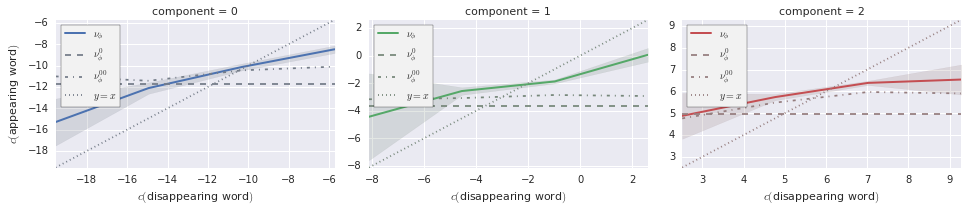

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 5 components.

Those explain the following variance:
[ 0.54692798  0.18982666  0.1567398   0.04211733  0.03665298]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographical_density,synonyms_count
Component-0,-0.721316,-0.087602,0.304948,-0.553093,0.270415,0.000740
Component-1,-0.523566,-0.091867,0.313685,0.740638,-0.265255,0.011695
Component-2,-0.442523,0.125688,-0.881632,0.086823,0.031979,0.050395


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 99525) |         | Elapsed Time: 0:01:28 ETA:  101 days, 17:26:20

  0% (  120 of 99525) |                    | Elapsed Time: 0:01:29 ETA:  0:12:29

  0% (  249 of 99525) |                    | Elapsed Time: 0:01:30 ETA:  0:12:01

  0% (  374 of 99525) |                    | Elapsed Time: 0:01:31 ETA:  0:11:55

  0% (  493 of 99525) |                    | Elapsed Time: 0:01:32 ETA:  0:12:02

  0% (  611 of 99525) |                    | Elapsed Time: 0:01:33 ETA:  0:12:07

  0% (  737 of 99525) |                    | Elapsed Time: 0:01:34 ETA:  0:12:01

  0% (  858 of 99525) |                    | Elapsed Time: 0:01:35 ETA:  0:12:01

  0% (  992 of 99525) |                    | Elapsed Time: 0:01:36 ETA:  0:11:51

  1% ( 1125 of 99525) |                    | Elapsed Time: 0:01:37 ETA:  0:11:43

  1% ( 1245 of 99525) |                    | Elapsed Time: 0:01:38 ETA:  0:11:30

  1% ( 1378 of 99525) |                    | Elapsed Time: 0:01:39 ETA:  0:11:25

  1% ( 1516 of 99525) |                    | Elapsed Time: 0:01:40 ETA:  0:11:16

  1% ( 1647 of 99525) |                    | Elapsed Time: 0:01:41 ETA:  0:11:07

  1% ( 1790 of 99525) |                    | Elapsed Time: 0:01:42 ETA:  0:10:49

  1% ( 1913 of 99525) |                    | Elapsed Time: 0:01:43 ETA:  0:10:50

  2% ( 2065 of 99525) |                    | Elapsed Time: 0:01:44 ETA:  0:10:30

  2% ( 2224 of 99525) |                    | Elapsed Time: 0:01:45 ETA:  0:10:13

  2% ( 2357 of 99525) |                    | Elapsed Time: 0:01:46 ETA:  0:10:12

  2% ( 2489 of 99525) |                    | Elapsed Time: 0:01:47 ETA:  0:10:05

  2% ( 2583 of 99525) |                    | Elapsed Time: 0:01:48 ETA:  0:10:28

  2% ( 2661 of 99525) |                    | Elapsed Time: 0:01:49 ETA:  0:11:06

  2% ( 2737 of 99525) |                    | Elapsed Time: 0:01:50 ETA:  0:11:45

  2% ( 2816 of 99525) |                    | Elapsed Time: 0:01:51 ETA:  0:12:35

  2% ( 2895 of 99525) |                    | Elapsed Time: 0:01:52 ETA:  0:13:14

  2% ( 2977 of 99525) |                    | Elapsed Time: 0:01:53 ETA:  0:14:23

  3% ( 3057 of 99525) |                    | Elapsed Time: 0:01:54 ETA:  0:15:55

  3% ( 3132 of 99525) |                    | Elapsed Time: 0:01:55 ETA:  0:17:14

  3% ( 3210 of 99525) |                    | Elapsed Time: 0:01:56 ETA:  0:18:55

  3% ( 3295 of 99525) |                    | Elapsed Time: 0:01:57 ETA:  0:19:10

  3% ( 3377 of 99525) |                    | Elapsed Time: 0:01:58 ETA:  0:19:01

  3% ( 3490 of 99525) |                    | Elapsed Time: 0:01:59 ETA:  0:17:57

  3% ( 3612 of 99525) |                    | Elapsed Time: 0:02:00 ETA:  0:16:51

  3% ( 3733 of 99525) |                    | Elapsed Time: 0:02:01 ETA:  0:15:47

  3% ( 3851 of 99525) |                    | Elapsed Time: 0:02:02 ETA:  0:14:54

  3% ( 3977 of 99525) |                    | Elapsed Time: 0:02:03 ETA:  0:13:52

  4% ( 4101 of 99525) |                    | Elapsed Time: 0:02:04 ETA:  0:13:01

  4% ( 4236 of 99525) |                    | Elapsed Time: 0:02:05 ETA:  0:12:11

  4% ( 4362 of 99525) |                    | Elapsed Time: 0:02:06 ETA:  0:11:32

  4% ( 4479 of 99525) |                    | Elapsed Time: 0:02:07 ETA:  0:11:27

  4% ( 4588 of 99525) |                    | Elapsed Time: 0:02:08 ETA:  0:11:37

  4% ( 4729 of 99525) |                    | Elapsed Time: 0:02:09 ETA:  0:11:11

  4% ( 4861 of 99525) |                    | Elapsed Time: 0:02:10 ETA:  0:11:05

  5% ( 4977 of 99525) |#                   | Elapsed Time: 0:02:11 ETA:  0:10:54

  5% ( 5115 of 99525) |#                   | Elapsed Time: 0:02:12 ETA:  0:10:44

  5% ( 5279 of 99525) |#                   | Elapsed Time: 0:02:13 ETA:  0:10:17

  5% ( 5439 of 99525) |#                   | Elapsed Time: 0:02:14 ETA:  0:10:00

  5% ( 5614 of 99525) |#                   | Elapsed Time: 0:02:15 ETA:  0:09:30

  5% ( 5772 of 99525) |#                   | Elapsed Time: 0:02:16 ETA:  0:09:07

  5% ( 5933 of 99525) |#                   | Elapsed Time: 0:02:17 ETA:  0:08:39

  6% ( 6060 of 99525) |#                   | Elapsed Time: 0:02:18 ETA:  0:08:45

  6% ( 6221 of 99525) |#                   | Elapsed Time: 0:02:19 ETA:  0:08:31

  6% ( 6372 of 99525) |#                   | Elapsed Time: 0:02:20 ETA:  0:08:23

  6% ( 6529 of 99525) |#                   | Elapsed Time: 0:02:21 ETA:  0:08:26

  6% ( 6644 of 99525) |#                   | Elapsed Time: 0:02:22 ETA:  0:08:51

  6% ( 6734 of 99525) |#                   | Elapsed Time: 0:02:23 ETA:  0:09:42

  6% ( 6874 of 99525) |#                   | Elapsed Time: 0:02:24 ETA:  0:09:53

  7% ( 7011 of 99525) |#                   | Elapsed Time: 0:02:25 ETA:  0:10:08

  7% ( 7154 of 99525) |#                   | Elapsed Time: 0:02:26 ETA:  0:09:56

  7% ( 7301 of 99525) |#                   | Elapsed Time: 0:02:27 ETA:  0:09:51

  7% ( 7465 of 99525) |#                   | Elapsed Time: 0:02:28 ETA:  0:09:52

  7% ( 7607 of 99525) |#                   | Elapsed Time: 0:02:29 ETA:  0:10:02

  7% ( 7746 of 99525) |#                   | Elapsed Time: 0:02:30 ETA:  0:09:43

  7% ( 7888 of 99525) |#                   | Elapsed Time: 0:02:31 ETA:  0:09:09

  8% ( 8016 of 99525) |#                   | Elapsed Time: 0:02:32 ETA:  0:09:15

  8% ( 8129 of 99525) |#                   | Elapsed Time: 0:02:33 ETA:  0:09:30

  8% ( 8236 of 99525) |#                   | Elapsed Time: 0:02:34 ETA:  0:09:53

  8% ( 8305 of 99525) |#                   | Elapsed Time: 0:02:35 ETA:  0:10:50

  8% ( 8455 of 99525) |#                   | Elapsed Time: 0:02:36 ETA:  0:10:49

  8% ( 8597 of 99525) |#                   | Elapsed Time: 0:02:37 ETA:  0:10:38

  8% ( 8709 of 99525) |#                   | Elapsed Time: 0:02:38 ETA:  0:10:37

  8% ( 8848 of 99525) |#                   | Elapsed Time: 0:02:39 ETA:  0:10:36

  8% ( 8921 of 99525) |#                   | Elapsed Time: 0:02:40 ETA:  0:11:29

  9% ( 9047 of 99525) |#                   | Elapsed Time: 0:02:41 ETA:  0:11:30

  9% ( 9128 of 99525) |#                   | Elapsed Time: 0:02:42 ETA:  0:11:56

  9% ( 9213 of 99525) |#                   | Elapsed Time: 0:02:43 ETA:  0:12:15

  9% ( 9296 of 99525) |#                   | Elapsed Time: 0:02:44 ETA:  0:12:01

  9% ( 9380 of 99525) |#                   | Elapsed Time: 0:02:45 ETA:  0:13:04

  9% ( 9507 of 99525) |#                   | Elapsed Time: 0:02:46 ETA:  0:13:18

  9% ( 9690 of 99525) |#                   | Elapsed Time: 0:02:47 ETA:  0:12:31

  9% ( 9845 of 99525) |#                   | Elapsed Time: 0:02:48 ETA:  0:12:15

 10% ( 9953 of 99525) |##                  | Elapsed Time: 0:02:49 ETA:  0:11:39

 10% (10056 of 99525) |##                  | Elapsed Time: 0:02:50 ETA:  0:11:57

 10% (10163 of 99525) |##                  | Elapsed Time: 0:02:51 ETA:  0:11:33

 10% (10268 of 99525) |##                  | Elapsed Time: 0:02:52 ETA:  0:11:16

 10% (10371 of 99525) |##                  | Elapsed Time: 0:02:53 ETA:  0:11:00

 10% (10525 of 99525) |##                  | Elapsed Time: 0:02:54 ETA:  0:10:08

 10% (10677 of 99525) |##                  | Elapsed Time: 0:02:55 ETA:  0:09:50

 10% (10825 of 99525) |##                  | Elapsed Time: 0:02:56 ETA:  0:10:15

 10% (10942 of 99525) |##                  | Elapsed Time: 0:02:57 ETA:  0:10:41

 11% (11051 of 99525) |##                  | Elapsed Time: 0:02:58 ETA:  0:10:43

 11% (11197 of 99525) |##                  | Elapsed Time: 0:02:59 ETA:  0:09:59

 11% (11308 of 99525) |##                  | Elapsed Time: 0:03:00 ETA:  0:09:54

 11% (11431 of 99525) |##                  | Elapsed Time: 0:03:01 ETA:  0:09:37

 11% (11549 of 99525) |##                  | Elapsed Time: 0:03:02 ETA:  0:10:02

 11% (11676 of 99525) |##                  | Elapsed Time: 0:03:03 ETA:  0:10:21

 11% (11789 of 99525) |##                  | Elapsed Time: 0:03:04 ETA:  0:10:48

 11% (11915 of 99525) |##                  | Elapsed Time: 0:03:05 ETA:  0:10:40

 12% (12038 of 99525) |##                  | Elapsed Time: 0:03:06 ETA:  0:10:27

 12% (12160 of 99525) |##                  | Elapsed Time: 0:03:07 ETA:  0:10:45

 12% (12283 of 99525) |##                  | Elapsed Time: 0:03:08 ETA:  0:10:40

 12% (12405 of 99525) |##                  | Elapsed Time: 0:03:09 ETA:  0:10:31

 12% (12441 of 99525) |##                  | Elapsed Time: 0:03:09 ETA:  0:10:30

 12% (12566 of 99525) |##                  | Elapsed Time: 0:03:10 ETA:  0:10:24

 12% (12695 of 99525) |##                  | Elapsed Time: 0:03:11 ETA:  0:10:21

 12% (12819 of 99525) |##                  | Elapsed Time: 0:03:12 ETA:  0:10:11

 13% (12944 of 99525) |##                  | Elapsed Time: 0:03:13 ETA:  0:10:11

 13% (13065 of 99525) |##                  | Elapsed Time: 0:03:14 ETA:  0:10:11

 13% (13189 of 99525) |##                  | Elapsed Time: 0:03:15 ETA:  0:10:09

 13% (13313 of 99525) |##                  | Elapsed Time: 0:03:16 ETA:  0:10:07

 13% (13441 of 99525) |##                  | Elapsed Time: 0:03:17 ETA:  0:10:01

 13% (13580 of 99525) |##                  | Elapsed Time: 0:03:18 ETA:  0:09:50

 13% (13685 of 99525) |##                  | Elapsed Time: 0:03:19 ETA:  0:09:38

 13% (13826 of 99525) |##                  | Elapsed Time: 0:03:20 ETA:  0:09:29

 14% (13968 of 99525) |##                  | Elapsed Time: 0:03:21 ETA:  0:09:16

 14% (14122 of 99525) |##                  | Elapsed Time: 0:03:22 ETA:  0:08:57

 14% (14269 of 99525) |##                  | Elapsed Time: 0:03:23 ETA:  0:08:40

 14% (14412 of 99525) |##                  | Elapsed Time: 0:03:24 ETA:  0:08:28

 14% (14548 of 99525) |##                  | Elapsed Time: 0:03:25 ETA:  0:08:20

 14% (14688 of 99525) |##                  | Elapsed Time: 0:03:26 ETA:  0:08:12

 14% (14837 of 99525) |##                  | Elapsed Time: 0:03:27 ETA:  0:08:06

 15% (14929 of 99525) |###                 | Elapsed Time: 0:03:28 ETA:  0:08:03

 15% (15078 of 99525) |###                 | Elapsed Time: 0:03:29 ETA:  0:07:57

 15% (15228 of 99525) |###                 | Elapsed Time: 0:03:30 ETA:  0:07:52

 15% (15379 of 99525) |###                 | Elapsed Time: 0:03:31 ETA:  0:07:52

 15% (15531 of 99525) |###                 | Elapsed Time: 0:03:32 ETA:  0:07:48

 15% (15681 of 99525) |###                 | Elapsed Time: 0:03:33 ETA:  0:07:42

 15% (15832 of 99525) |###                 | Elapsed Time: 0:03:34 ETA:  0:07:33

 16% (15970 of 99525) |###                 | Elapsed Time: 0:03:35 ETA:  0:07:34

 16% (16109 of 99525) |###                 | Elapsed Time: 0:03:36 ETA:  0:07:38

 16% (16173 of 99525) |###                 | Elapsed Time: 0:03:36 ETA:  0:07:42

 16% (16313 of 99525) |###                 | Elapsed Time: 0:03:37 ETA:  0:07:46

 16% (16452 of 99525) |###                 | Elapsed Time: 0:03:38 ETA:  0:07:51

 16% (16589 of 99525) |###                 | Elapsed Time: 0:03:39 ETA:  0:07:58

 16% (16703 of 99525) |###                 | Elapsed Time: 0:03:40 ETA:  0:08:21

 16% (16830 of 99525) |###                 | Elapsed Time: 0:03:41 ETA:  0:08:34

 17% (16954 of 99525) |###                 | Elapsed Time: 0:03:42 ETA:  0:08:51

 17% (16993 of 99525) |###                 | Elapsed Time: 0:03:43 ETA:  0:10:07

 17% (17124 of 99525) |###                 | Elapsed Time: 0:03:44 ETA:  0:10:13

 17% (17237 of 99525) |###                 | Elapsed Time: 0:03:45 ETA:  0:10:24

 17% (17360 of 99525) |###                 | Elapsed Time: 0:03:46 ETA:  0:10:37

 17% (17417 of 99525) |###                 | Elapsed Time: 0:03:47 ETA:  0:10:50

 17% (17548 of 99525) |###                 | Elapsed Time: 0:03:48 ETA:  0:10:54

 17% (17672 of 99525) |###                 | Elapsed Time: 0:03:49 ETA:  0:10:43

 17% (17801 of 99525) |###                 | Elapsed Time: 0:03:50 ETA:  0:10:40

 18% (17940 of 99525) |###                 | Elapsed Time: 0:03:51 ETA:  0:10:26

 18% (18073 of 99525) |###                 | Elapsed Time: 0:03:52 ETA:  0:09:06

 18% (18209 of 99525) |###                 | Elapsed Time: 0:03:53 ETA:  0:09:02

 18% (18345 of 99525) |###                 | Elapsed Time: 0:03:54 ETA:  0:08:45

 18% (18483 of 99525) |###                 | Elapsed Time: 0:03:55 ETA:  0:08:34

 18% (18619 of 99525) |###                 | Elapsed Time: 0:03:56 ETA:  0:08:32

 18% (18661 of 99525) |###                 | Elapsed Time: 0:03:56 ETA:  0:08:27

 18% (18802 of 99525) |###                 | Elapsed Time: 0:03:57 ETA:  0:08:15

 19% (18939 of 99525) |###                 | Elapsed Time: 0:03:58 ETA:  0:08:09

 19% (19073 of 99525) |###                 | Elapsed Time: 0:03:59 ETA:  0:08:11

 19% (19181 of 99525) |###                 | Elapsed Time: 0:04:00 ETA:  0:08:27

 19% (19306 of 99525) |###                 | Elapsed Time: 0:04:01 ETA:  0:08:34

 19% (19432 of 99525) |###                 | Elapsed Time: 0:04:02 ETA:  0:08:40

 19% (19506 of 99525) |###                 | Elapsed Time: 0:04:03 ETA:  0:09:27

 19% (19594 of 99525) |###                 | Elapsed Time: 0:04:04 ETA:  0:10:06

 19% (19709 of 99525) |###                 | Elapsed Time: 0:04:05 ETA:  0:10:14

 19% (19838 of 99525) |###                 | Elapsed Time: 0:04:06 ETA:  0:10:23

 20% (19905 of 99525) |####                | Elapsed Time: 0:04:07 ETA:  0:10:32

 20% (20042 of 99525) |####                | Elapsed Time: 0:04:08 ETA:  0:10:28

 20% (20176 of 99525) |####                | Elapsed Time: 0:04:09 ETA:  0:10:03

 20% (20313 of 99525) |####                | Elapsed Time: 0:04:10 ETA:  0:09:51

 20% (20423 of 99525) |####                | Elapsed Time: 0:04:11 ETA:  0:10:03

 20% (20570 of 99525) |####                | Elapsed Time: 0:04:12 ETA:  0:09:03

 20% (20721 of 99525) |####                | Elapsed Time: 0:04:13 ETA:  0:08:18

 20% (20869 of 99525) |####                | Elapsed Time: 0:04:14 ETA:  0:07:55

 21% (21016 of 99525) |####                | Elapsed Time: 0:04:15 ETA:  0:07:43

 21% (21150 of 99525) |####                | Elapsed Time: 0:04:15 ETA:  0:07:35

 21% (21317 of 99525) |####                | Elapsed Time: 0:04:16 ETA:  0:07:18

 21% (21482 of 99525) |####                | Elapsed Time: 0:04:17 ETA:  0:07:01

 21% (21627 of 99525) |####                | Elapsed Time: 0:04:18 ETA:  0:06:56

 21% (21731 of 99525) |####                | Elapsed Time: 0:04:19 ETA:  0:06:59

 21% (21836 of 99525) |####                | Elapsed Time: 0:04:20 ETA:  0:07:20

 22% (21939 of 99525) |####                | Elapsed Time: 0:04:21 ETA:  0:07:47

 22% (22086 of 99525) |####                | Elapsed Time: 0:04:22 ETA:  0:07:47

 22% (22235 of 99525) |####                | Elapsed Time: 0:04:23 ETA:  0:07:45

 22% (22394 of 99525) |####                | Elapsed Time: 0:04:25 ETA:  0:08:03

 22% (22547 of 99525) |####                | Elapsed Time: 0:04:26 ETA:  0:08:11

 22% (22698 of 99525) |####                | Elapsed Time: 0:04:27 ETA:  0:08:05

 22% (22849 of 99525) |####                | Elapsed Time: 0:04:28 ETA:  0:07:32

 23% (23000 of 99525) |####                | Elapsed Time: 0:04:29 ETA:  0:07:03

 23% (23148 of 99525) |####                | Elapsed Time: 0:04:30 ETA:  0:06:35

 23% (23306 of 99525) |####                | Elapsed Time: 0:04:31 ETA:  0:06:28

 23% (23450 of 99525) |####                | Elapsed Time: 0:04:32 ETA:  0:06:30

 23% (23568 of 99525) |####                | Elapsed Time: 0:04:33 ETA:  0:06:47

 23% (23638 of 99525) |####                | Elapsed Time: 0:04:33 ETA:  0:06:55

 23% (23757 of 99525) |####                | Elapsed Time: 0:04:34 ETA:  0:07:14

 23% (23883 of 99525) |####                | Elapsed Time: 0:04:35 ETA:  0:07:28

 24% (24052 of 99525) |####                | Elapsed Time: 0:04:36 ETA:  0:07:16

 24% (24225 of 99525) |####                | Elapsed Time: 0:04:37 ETA:  0:07:02

 24% (24393 of 99525) |####                | Elapsed Time: 0:04:38 ETA:  0:06:50

 24% (24546 of 99525) |####                | Elapsed Time: 0:04:39 ETA:  0:06:52

 24% (24709 of 99525) |####                | Elapsed Time: 0:04:40 ETA:  0:06:40

 24% (24835 of 99525) |####                | Elapsed Time: 0:04:41 ETA:  0:06:35

 25% (24882 of 99525) |#####               | Elapsed Time: 0:04:42 ETA:  0:06:29

 25% (25017 of 99525) |#####               | Elapsed Time: 0:04:43 ETA:  0:06:20

 25% (25152 of 99525) |#####               | Elapsed Time: 0:04:44 ETA:  0:06:14

 25% (25287 of 99525) |#####               | Elapsed Time: 0:04:45 ETA:  0:06:31

 25% (25430 of 99525) |#####               | Elapsed Time: 0:04:46 ETA:  0:06:47

 25% (25597 of 99525) |#####               | Elapsed Time: 0:04:47 ETA:  0:06:47

 25% (25759 of 99525) |#####               | Elapsed Time: 0:04:48 ETA:  0:06:41

 26% (25890 of 99525) |#####               | Elapsed Time: 0:04:49 ETA:  0:06:59

 26% (26031 of 99525) |#####               | Elapsed Time: 0:04:50 ETA:  0:06:48

 26% (26126 of 99525) |#####               | Elapsed Time: 0:04:50 ETA:  0:06:44

 26% (26275 of 99525) |#####               | Elapsed Time: 0:04:51 ETA:  0:06:35

 26% (26440 of 99525) |#####               | Elapsed Time: 0:04:52 ETA:  0:06:18

 26% (26581 of 99525) |#####               | Elapsed Time: 0:04:53 ETA:  0:06:14

 26% (26724 of 99525) |#####               | Elapsed Time: 0:04:54 ETA:  0:06:13

 27% (26892 of 99525) |#####               | Elapsed Time: 0:04:55 ETA:  0:06:11

 27% (27058 of 99525) |#####               | Elapsed Time: 0:04:56 ETA:  0:06:08

 27% (27222 of 99525) |#####               | Elapsed Time: 0:04:57 ETA:  0:05:51

 27% (27370 of 99525) |#####               | Elapsed Time: 0:04:58 ETA:  0:05:37

 27% (27535 of 99525) |#####               | Elapsed Time: 0:04:59 ETA:  0:05:29

 27% (27697 of 99525) |#####               | Elapsed Time: 0:05:00 ETA:  0:05:22

 27% (27859 of 99525) |#####               | Elapsed Time: 0:05:01 ETA:  0:05:23

 28% (28022 of 99525) |#####               | Elapsed Time: 0:05:02 ETA:  0:05:12

 28% (28157 of 99525) |#####               | Elapsed Time: 0:05:03 ETA:  0:05:14

 28% (28326 of 99525) |#####               | Elapsed Time: 0:05:04 ETA:  0:05:13

 28% (28493 of 99525) |#####               | Elapsed Time: 0:05:05 ETA:  0:05:11

 28% (28614 of 99525) |#####               | Elapsed Time: 0:05:06 ETA:  0:05:09

 28% (28786 of 99525) |#####               | Elapsed Time: 0:05:07 ETA:  0:05:06

 29% (28957 of 99525) |#####               | Elapsed Time: 0:05:08 ETA:  0:05:02

 29% (29123 of 99525) |#####               | Elapsed Time: 0:05:09 ETA:  0:05:00

 29% (29295 of 99525) |#####               | Elapsed Time: 0:05:10 ETA:  0:04:55

 29% (29399 of 99525) |#####               | Elapsed Time: 0:05:11 ETA:  0:05:21

 29% (29528 of 99525) |#####               | Elapsed Time: 0:05:12 ETA:  0:05:23

 29% (29661 of 99525) |#####               | Elapsed Time: 0:05:13 ETA:  0:05:39

 29% (29809 of 99525) |#####               | Elapsed Time: 0:05:14 ETA:  0:05:48

 30% (29858 of 99525) |######              | Elapsed Time: 0:05:14 ETA:  0:05:52

 30% (30016 of 99525) |######              | Elapsed Time: 0:05:15 ETA:  0:05:58

 30% (30151 of 99525) |######              | Elapsed Time: 0:05:16 ETA:  0:06:18

 30% (30313 of 99525) |######              | Elapsed Time: 0:05:17 ETA:  0:06:18

 30% (30471 of 99525) |######              | Elapsed Time: 0:05:18 ETA:  0:06:25

 30% (30619 of 99525) |######              | Elapsed Time: 0:05:19 ETA:  0:05:58

 30% (30749 of 99525) |######              | Elapsed Time: 0:05:20 ETA:  0:05:57

 31% (30884 of 99525) |######              | Elapsed Time: 0:05:21 ETA:  0:05:54

 31% (31062 of 99525) |######              | Elapsed Time: 0:05:22 ETA:  0:05:37

 31% (31102 of 99525) |######              | Elapsed Time: 0:05:22 ETA:  0:05:36

 31% (31276 of 99525) |######              | Elapsed Time: 0:05:23 ETA:  0:05:27

 31% (31444 of 99525) |######              | Elapsed Time: 0:05:25 ETA:  0:05:09

 31% (31614 of 99525) |######              | Elapsed Time: 0:05:26 ETA:  0:05:04

 31% (31781 of 99525) |######              | Elapsed Time: 0:05:27 ETA:  0:04:59

 32% (31924 of 99525) |######              | Elapsed Time: 0:05:28 ETA:  0:05:01

 32% (32045 of 99525) |######              | Elapsed Time: 0:05:29 ETA:  0:05:05

 32% (32149 of 99525) |######              | Elapsed Time: 0:05:30 ETA:  0:05:19

 32% (32249 of 99525) |######              | Elapsed Time: 0:05:31 ETA:  0:06:01

 32% (32346 of 99525) |######              | Elapsed Time: 0:05:31 ETA:  0:06:09

 32% (32480 of 99525) |######              | Elapsed Time: 0:05:32 ETA:  0:06:31

 32% (32594 of 99525) |######              | Elapsed Time: 0:05:33 ETA:  0:07:04

 32% (32711 of 99525) |######              | Elapsed Time: 0:05:34 ETA:  0:07:40

 33% (32856 of 99525) |######              | Elapsed Time: 0:05:35 ETA:  0:07:54

 33% (32988 of 99525) |######              | Elapsed Time: 0:05:36 ETA:  0:08:01

 33% (33128 of 99525) |######              | Elapsed Time: 0:05:37 ETA:  0:07:48

 33% (33265 of 99525) |######              | Elapsed Time: 0:05:38 ETA:  0:07:23

 33% (33423 of 99525) |######              | Elapsed Time: 0:05:39 ETA:  0:06:43

 33% (33590 of 99525) |######              | Elapsed Time: 0:05:40 ETA:  0:06:22

 33% (33729 of 99525) |######              | Elapsed Time: 0:05:41 ETA:  0:06:05

 34% (33853 of 99525) |######              | Elapsed Time: 0:05:42 ETA:  0:06:00

 34% (33979 of 99525) |######              | Elapsed Time: 0:05:43 ETA:  0:06:12

 34% (34088 of 99525) |######              | Elapsed Time: 0:05:44 ETA:  0:06:26

 34% (34220 of 99525) |######              | Elapsed Time: 0:05:45 ETA:  0:06:27

 34% (34381 of 99525) |######              | Elapsed Time: 0:05:46 ETA:  0:06:10

 34% (34518 of 99525) |######              | Elapsed Time: 0:05:47 ETA:  0:06:24

 34% (34631 of 99525) |######              | Elapsed Time: 0:05:48 ETA:  0:06:58

 34% (34760 of 99525) |######              | Elapsed Time: 0:05:49 ETA:  0:06:58

 35% (34834 of 99525) |#######             | Elapsed Time: 0:05:50 ETA:  0:07:41

 35% (34971 of 99525) |#######             | Elapsed Time: 0:05:51 ETA:  0:07:31

 35% (35130 of 99525) |#######             | Elapsed Time: 0:05:52 ETA:  0:07:06

 35% (35261 of 99525) |#######             | Elapsed Time: 0:05:53 ETA:  0:06:51

 35% (35380 of 99525) |#######             | Elapsed Time: 0:05:54 ETA:  0:06:59

 35% (35515 of 99525) |#######             | Elapsed Time: 0:05:55 ETA:  0:07:16

 35% (35650 of 99525) |#######             | Elapsed Time: 0:05:56 ETA:  0:07:16

 35% (35797 of 99525) |#######             | Elapsed Time: 0:05:57 ETA:  0:06:52

 36% (35934 of 99525) |#######             | Elapsed Time: 0:05:58 ETA:  0:06:46

 36% (36078 of 99525) |#######             | Elapsed Time: 0:05:59 ETA:  0:06:08

 36% (36213 of 99525) |#######             | Elapsed Time: 0:06:00 ETA:  0:06:23

 36% (36366 of 99525) |#######             | Elapsed Time: 0:06:01 ETA:  0:06:07

 36% (36497 of 99525) |#######             | Elapsed Time: 0:06:02 ETA:  0:05:57

 36% (36650 of 99525) |#######             | Elapsed Time: 0:06:03 ETA:  0:05:45

 36% (36780 of 99525) |#######             | Elapsed Time: 0:06:04 ETA:  0:05:48

 37% (36906 of 99525) |#######             | Elapsed Time: 0:06:05 ETA:  0:06:01

 37% (37032 of 99525) |#######             | Elapsed Time: 0:06:06 ETA:  0:06:06

 37% (37161 of 99525) |#######             | Elapsed Time: 0:06:08 ETA:  0:06:10

 37% (37322 of 99525) |#######             | Elapsed Time: 0:06:09 ETA:  0:06:00

 37% (37459 of 99525) |#######             | Elapsed Time: 0:06:10 ETA:  0:06:10

 37% (37606 of 99525) |#######             | Elapsed Time: 0:06:11 ETA:  0:05:58

 37% (37763 of 99525) |#######             | Elapsed Time: 0:06:12 ETA:  0:05:54

 38% (37926 of 99525) |#######             | Elapsed Time: 0:06:13 ETA:  0:05:32

 38% (38050 of 99525) |#######             | Elapsed Time: 0:06:14 ETA:  0:05:31

 38% (38216 of 99525) |#######             | Elapsed Time: 0:06:15 ETA:  0:05:07

 38% (38368 of 99525) |#######             | Elapsed Time: 0:06:16 ETA:  0:04:52

 38% (38465 of 99525) |#######             | Elapsed Time: 0:06:17 ETA:  0:05:23

 38% (38566 of 99525) |#######             | Elapsed Time: 0:06:17 ETA:  0:05:24

 38% (38705 of 99525) |#######             | Elapsed Time: 0:06:18 ETA:  0:05:22

 39% (38824 of 99525) |#######             | Elapsed Time: 0:06:19 ETA:  0:05:38

 39% (38961 of 99525) |#######             | Elapsed Time: 0:06:20 ETA:  0:05:48

 39% (39096 of 99525) |#######             | Elapsed Time: 0:06:21 ETA:  0:06:05

 39% (39262 of 99525) |#######             | Elapsed Time: 0:06:22 ETA:  0:05:38

 39% (39421 of 99525) |#######             | Elapsed Time: 0:06:23 ETA:  0:05:41

 39% (39569 of 99525) |#######             | Elapsed Time: 0:06:24 ETA:  0:05:42

 39% (39721 of 99525) |#######             | Elapsed Time: 0:06:25 ETA:  0:05:09

 40% (39810 of 99525) |########            | Elapsed Time: 0:06:26 ETA:  0:05:03

 40% (39964 of 99525) |########            | Elapsed Time: 0:06:27 ETA:  0:04:54

 40% (40110 of 99525) |########            | Elapsed Time: 0:06:28 ETA:  0:04:39

 40% (40247 of 99525) |########            | Elapsed Time: 0:06:29 ETA:  0:04:38

 40% (40401 of 99525) |########            | Elapsed Time: 0:06:30 ETA:  0:04:28

 40% (40524 of 99525) |########            | Elapsed Time: 0:06:31 ETA:  0:04:49

 40% (40682 of 99525) |########            | Elapsed Time: 0:06:32 ETA:  0:04:49

 40% (40803 of 99525) |########            | Elapsed Time: 0:06:33 ETA:  0:05:02

 41% (40939 of 99525) |########            | Elapsed Time: 0:06:34 ETA:  0:05:10

 41% (41055 of 99525) |########            | Elapsed Time: 0:06:35 ETA:  0:05:16

 41% (41208 of 99525) |########            | Elapsed Time: 0:06:36 ETA:  0:05:16

 41% (41363 of 99525) |########            | Elapsed Time: 0:06:37 ETA:  0:05:09

 41% (41516 of 99525) |########            | Elapsed Time: 0:06:38 ETA:  0:04:59

 41% (41669 of 99525) |########            | Elapsed Time: 0:06:39 ETA:  0:04:59

 42% (41829 of 99525) |########            | Elapsed Time: 0:06:40 ETA:  0:04:38

 42% (41974 of 99525) |########            | Elapsed Time: 0:06:41 ETA:  0:04:44

 42% (42120 of 99525) |########            | Elapsed Time: 0:06:42 ETA:  0:04:30

 42% (42263 of 99525) |########            | Elapsed Time: 0:06:43 ETA:  0:04:26

 42% (42299 of 99525) |########            | Elapsed Time: 0:06:43 ETA:  0:04:18

 42% (42454 of 99525) |########            | Elapsed Time: 0:06:44 ETA:  0:04:16

 42% (42606 of 99525) |########            | Elapsed Time: 0:06:45 ETA:  0:04:16

 42% (42774 of 99525) |########            | Elapsed Time: 0:06:46 ETA:  0:04:08

 43% (42894 of 99525) |########            | Elapsed Time: 0:06:47 ETA:  0:04:24

 43% (43010 of 99525) |########            | Elapsed Time: 0:06:48 ETA:  0:04:49

 43% (43142 of 99525) |########            | Elapsed Time: 0:06:49 ETA:  0:04:56

 43% (43289 of 99525) |########            | Elapsed Time: 0:06:50 ETA:  0:04:54

 43% (43444 of 99525) |########            | Elapsed Time: 0:06:51 ETA:  0:04:46

 43% (43543 of 99525) |########            | Elapsed Time: 0:06:52 ETA:  0:05:27

 43% (43687 of 99525) |########            | Elapsed Time: 0:06:53 ETA:  0:05:32

 44% (43828 of 99525) |########            | Elapsed Time: 0:06:54 ETA:  0:05:50

 44% (43962 of 99525) |########            | Elapsed Time: 0:06:55 ETA:  0:05:39

 44% (44106 of 99525) |########            | Elapsed Time: 0:06:56 ETA:  0:05:18

 44% (44250 of 99525) |########            | Elapsed Time: 0:06:57 ETA:  0:05:09

 44% (44417 of 99525) |########            | Elapsed Time: 0:06:58 ETA:  0:04:55

 44% (44527 of 99525) |########            | Elapsed Time: 0:06:59 ETA:  0:05:23

 44% (44641 of 99525) |########            | Elapsed Time: 0:07:00 ETA:  0:05:05

 45% (44787 of 99525) |#########           | Elapsed Time: 0:07:01 ETA:  0:05:09

 45% (44905 of 99525) |#########           | Elapsed Time: 0:07:02 ETA:  0:05:24

 45% (45053 of 99525) |#########           | Elapsed Time: 0:07:03 ETA:  0:05:13

 45% (45145 of 99525) |#########           | Elapsed Time: 0:07:04 ETA:  0:05:52

 45% (45193 of 99525) |#########           | Elapsed Time: 0:07:05 ETA:  0:07:10

 45% (45339 of 99525) |#########           | Elapsed Time: 0:07:06 ETA:  0:07:29

 45% (45480 of 99525) |#########           | Elapsed Time: 0:07:07 ETA:  0:06:59

 45% (45623 of 99525) |#########           | Elapsed Time: 0:07:08 ETA:  0:06:33

 45% (45754 of 99525) |#########           | Elapsed Time: 0:07:09 ETA:  0:06:40

 46% (45862 of 99525) |#########           | Elapsed Time: 0:07:10 ETA:  0:06:48

 46% (45955 of 99525) |#########           | Elapsed Time: 0:07:11 ETA:  0:07:08

 46% (46031 of 99525) |#########           | Elapsed Time: 0:07:13 ETA:  0:08:01

 46% (46163 of 99525) |#########           | Elapsed Time: 0:07:14 ETA:  0:06:41

 46% (46300 of 99525) |#########           | Elapsed Time: 0:07:15 ETA:  0:06:48

 46% (46440 of 99525) |#########           | Elapsed Time: 0:07:16 ETA:  0:06:48

 46% (46582 of 99525) |#########           | Elapsed Time: 0:07:17 ETA:  0:06:48

 46% (46686 of 99525) |#########           | Elapsed Time: 0:07:18 ETA:  0:07:10

 47% (46781 of 99525) |#########           | Elapsed Time: 0:07:19 ETA:  0:07:22

 47% (46878 of 99525) |#########           | Elapsed Time: 0:07:20 ETA:  0:07:15

 47% (46975 of 99525) |#########           | Elapsed Time: 0:07:21 ETA:  0:06:45

 47% (47067 of 99525) |#########           | Elapsed Time: 0:07:22 ETA:  0:07:07

 47% (47153 of 99525) |#########           | Elapsed Time: 0:07:23 ETA:  0:07:46

 47% (47223 of 99525) |#########           | Elapsed Time: 0:07:24 ETA:  0:08:51

 47% (47275 of 99525) |#########           | Elapsed Time: 0:07:24 ETA:  0:09:54

 47% (47366 of 99525) |#########           | Elapsed Time: 0:07:25 ETA:  0:11:01

 47% (47457 of 99525) |#########           | Elapsed Time: 0:07:26 ETA:  0:11:19

 47% (47555 of 99525) |#########           | Elapsed Time: 0:07:27 ETA:  0:11:14

 47% (47631 of 99525) |#########           | Elapsed Time: 0:07:28 ETA:  0:11:43

 47% (47725 of 99525) |#########           | Elapsed Time: 0:07:29 ETA:  0:11:46

 48% (47792 of 99525) |#########           | Elapsed Time: 0:07:30 ETA:  0:12:26

 48% (47861 of 99525) |#########           | Elapsed Time: 0:07:31 ETA:  0:12:54

 48% (47921 of 99525) |#########           | Elapsed Time: 0:07:32 ETA:  0:13:11

 48% (47988 of 99525) |#########           | Elapsed Time: 0:07:33 ETA:  0:13:29

 48% (48071 of 99525) |#########           | Elapsed Time: 0:07:34 ETA:  0:13:42

 48% (48143 of 99525) |#########           | Elapsed Time: 0:07:35 ETA:  0:14:20

 48% (48211 of 99525) |#########           | Elapsed Time: 0:07:36 ETA:  0:15:18

 48% (48292 of 99525) |#########           | Elapsed Time: 0:07:37 ETA:  0:15:07

 48% (48355 of 99525) |#########           | Elapsed Time: 0:07:38 ETA:  0:16:11

 48% (48426 of 99525) |#########           | Elapsed Time: 0:07:39 ETA:  0:16:00

 48% (48484 of 99525) |#########           | Elapsed Time: 0:07:40 ETA:  0:16:24

 48% (48519 of 99525) |#########           | Elapsed Time: 0:07:41 ETA:  0:15:20

 48% (48617 of 99525) |#########           | Elapsed Time: 0:07:42 ETA:  0:14:19

 48% (48689 of 99525) |#########           | Elapsed Time: 0:07:43 ETA:  0:14:41

 49% (48771 of 99525) |#########           | Elapsed Time: 0:07:44 ETA:  0:14:16

 49% (48833 of 99525) |#########           | Elapsed Time: 0:07:45 ETA:  0:14:28

 49% (48901 of 99525) |#########           | Elapsed Time: 0:07:46 ETA:  0:14:55

 49% (48958 of 99525) |#########           | Elapsed Time: 0:07:47 ETA:  0:15:09

 49% (49043 of 99525) |#########           | Elapsed Time: 0:07:48 ETA:  0:14:37

 49% (49134 of 99525) |#########           | Elapsed Time: 0:07:49 ETA:  0:13:28

 49% (49243 of 99525) |#########           | Elapsed Time: 0:07:50 ETA:  0:12:58

 49% (49387 of 99525) |#########           | Elapsed Time: 0:07:51 ETA:  0:11:36

 49% (49542 of 99525) |#########           | Elapsed Time: 0:07:52 ETA:  0:09:41

 49% (49699 of 99525) |#########           | Elapsed Time: 0:07:53 ETA:  0:08:15

 50% (49763 of 99525) |##########          | Elapsed Time: 0:07:53 ETA:  0:07:08

 50% (49925 of 99525) |##########          | Elapsed Time: 0:07:54 ETA:  0:05:45

 50% (50090 of 99525) |##########          | Elapsed Time: 0:07:55 ETA:  0:04:25

 50% (50236 of 99525) |##########          | Elapsed Time: 0:07:56 ETA:  0:03:46

 50% (50391 of 99525) |##########          | Elapsed Time: 0:07:57 ETA:  0:03:09

 50% (50497 of 99525) |##########          | Elapsed Time: 0:07:58 ETA:  0:03:09

 50% (50608 of 99525) |##########          | Elapsed Time: 0:07:59 ETA:  0:03:27

 50% (50743 of 99525) |##########          | Elapsed Time: 0:08:00 ETA:  0:03:37

 51% (50878 of 99525) |##########          | Elapsed Time: 0:08:01 ETA:  0:03:49

 51% (51007 of 99525) |##########          | Elapsed Time: 0:08:02 ETA:  0:04:16

 51% (51137 of 99525) |##########          | Elapsed Time: 0:08:03 ETA:  0:04:40

 51% (51280 of 99525) |##########          | Elapsed Time: 0:08:04 ETA:  0:04:41

 51% (51425 of 99525) |##########          | Elapsed Time: 0:08:05 ETA:  0:04:48

 51% (51561 of 99525) |##########          | Elapsed Time: 0:08:06 ETA:  0:04:24

 51% (51720 of 99525) |##########          | Elapsed Time: 0:08:07 ETA:  0:03:51

 52% (51867 of 99525) |##########          | Elapsed Time: 0:08:08 ETA:  0:03:42

 52% (52039 of 99525) |##########          | Elapsed Time: 0:08:09 ETA:  0:03:18

 52% (52205 of 99525) |##########          | Elapsed Time: 0:08:10 ETA:  0:02:56

 52% (52251 of 99525) |##########          | Elapsed Time: 0:08:11 ETA:  0:02:57

 52% (52384 of 99525) |##########          | Elapsed Time: 0:08:12 ETA:  0:02:54

 52% (52519 of 99525) |##########          | Elapsed Time: 0:08:13 ETA:  0:02:57

 52% (52664 of 99525) |##########          | Elapsed Time: 0:08:14 ETA:  0:02:56

 53% (52815 of 99525) |##########          | Elapsed Time: 0:08:15 ETA:  0:02:47

 53% (52982 of 99525) |##########          | Elapsed Time: 0:08:16 ETA:  0:02:42

 53% (53134 of 99525) |##########          | Elapsed Time: 0:08:17 ETA:  0:02:39

 53% (53274 of 99525) |##########          | Elapsed Time: 0:08:18 ETA:  0:02:54

 53% (53404 of 99525) |##########          | Elapsed Time: 0:08:19 ETA:  0:03:14

 53% (53495 of 99525) |##########          | Elapsed Time: 0:08:19 ETA:  0:03:05

 53% (53664 of 99525) |##########          | Elapsed Time: 0:08:20 ETA:  0:02:45

 54% (53792 of 99525) |##########          | Elapsed Time: 0:08:21 ETA:  0:02:48

 54% (53951 of 99525) |##########          | Elapsed Time: 0:08:22 ETA:  0:02:40

 54% (54081 of 99525) |##########          | Elapsed Time: 0:08:23 ETA:  0:02:50

 54% (54243 of 99525) |##########          | Elapsed Time: 0:08:24 ETA:  0:02:52

 54% (54394 of 99525) |##########          | Elapsed Time: 0:08:25 ETA:  0:02:51

 54% (54545 of 99525) |##########          | Elapsed Time: 0:08:26 ETA:  0:02:44

 55% (54739 of 99525) |###########         | Elapsed Time: 0:08:27 ETA:  0:02:25

 55% (54893 of 99525) |###########         | Elapsed Time: 0:08:28 ETA:  0:02:32

 55% (55036 of 99525) |###########         | Elapsed Time: 0:08:29 ETA:  0:02:22

 55% (55182 of 99525) |###########         | Elapsed Time: 0:08:30 ETA:  0:02:28

 55% (55357 of 99525) |###########         | Elapsed Time: 0:08:31 ETA:  0:02:04

 55% (55520 of 99525) |###########         | Elapsed Time: 0:08:32 ETA:  0:02:03

 55% (55663 of 99525) |###########         | Elapsed Time: 0:08:33 ETA:  0:02:06

 56% (55842 of 99525) |###########         | Elapsed Time: 0:08:34 ETA:  0:01:51

 56% (55983 of 99525) |###########         | Elapsed Time: 0:08:35 ETA:  0:02:07

 56% (56126 of 99525) |###########         | Elapsed Time: 0:08:36 ETA:  0:02:12

 56% (56261 of 99525) |###########         | Elapsed Time: 0:08:37 ETA:  0:02:15

 56% (56403 of 99525) |###########         | Elapsed Time: 0:08:38 ETA:  0:02:16

 56% (56503 of 99525) |###########         | Elapsed Time: 0:08:39 ETA:  0:02:57

 56% (56661 of 99525) |###########         | Elapsed Time: 0:08:40 ETA:  0:02:59

 57% (56820 of 99525) |###########         | Elapsed Time: 0:08:41 ETA:  0:02:49

 57% (56967 of 99525) |###########         | Elapsed Time: 0:08:42 ETA:  0:03:08

 57% (57144 of 99525) |###########         | Elapsed Time: 0:08:43 ETA:  0:02:43

 57% (57227 of 99525) |###########         | Elapsed Time: 0:08:44 ETA:  0:02:34

 57% (57389 of 99525) |###########         | Elapsed Time: 0:08:45 ETA:  0:02:23

 57% (57536 of 99525) |###########         | Elapsed Time: 0:08:46 ETA:  0:02:16

 57% (57690 of 99525) |###########         | Elapsed Time: 0:08:47 ETA:  0:02:09

 58% (57847 of 99525) |###########         | Elapsed Time: 0:08:48 ETA:  0:01:40

 58% (58007 of 99525) |###########         | Elapsed Time: 0:08:49 ETA:  0:01:38

 58% (58147 of 99525) |###########         | Elapsed Time: 0:08:50 ETA:  0:01:46

 58% (58323 of 99525) |###########         | Elapsed Time: 0:08:51 ETA:  0:01:31

 58% (58471 of 99525) |###########         | Elapsed Time: 0:08:52 ETA:  0:01:40

 58% (58633 of 99525) |###########         | Elapsed Time: 0:08:53 ETA:  0:01:41

 59% (58788 of 99525) |###########         | Elapsed Time: 0:08:54 ETA:  0:01:43

 59% (58954 of 99525) |###########         | Elapsed Time: 0:08:55 ETA:  0:01:34

 59% (59102 of 99525) |###########         | Elapsed Time: 0:08:56 ETA:  0:01:35

 59% (59260 of 99525) |###########         | Elapsed Time: 0:08:57 ETA:  0:01:34

 59% (59416 of 99525) |###########         | Elapsed Time: 0:08:58 ETA:  0:01:35

 59% (59555 of 99525) |###########         | Elapsed Time: 0:08:59 ETA:  0:01:35

 60% (59715 of 99525) |############        | Elapsed Time: 0:09:00 ETA:  0:01:46

 60% (59872 of 99525) |############        | Elapsed Time: 0:09:01 ETA:  0:01:48

 60% (60036 of 99525) |############        | Elapsed Time: 0:09:02 ETA:  0:01:42

 60% (60192 of 99525) |############        | Elapsed Time: 0:09:03 ETA:  0:01:46

 60% (60360 of 99525) |############        | Elapsed Time: 0:09:04 ETA:  0:01:35

 60% (60511 of 99525) |############        | Elapsed Time: 0:09:05 ETA:  0:01:38

 60% (60635 of 99525) |############        | Elapsed Time: 0:09:06 ETA:  0:01:54

 61% (60743 of 99525) |############        | Elapsed Time: 0:09:07 ETA:  0:02:10

 61% (60841 of 99525) |############        | Elapsed Time: 0:09:08 ETA:  0:02:43

 61% (60936 of 99525) |############        | Elapsed Time: 0:09:09 ETA:  0:03:08

 61% (60960 of 99525) |############        | Elapsed Time: 0:09:09 ETA:  0:03:29

 61% (61081 of 99525) |############        | Elapsed Time: 0:09:10 ETA:  0:03:59

 61% (61212 of 99525) |############        | Elapsed Time: 0:09:11 ETA:  0:04:18

 61% (61339 of 99525) |############        | Elapsed Time: 0:09:12 ETA:  0:04:50

 61% (61493 of 99525) |############        | Elapsed Time: 0:09:13 ETA:  0:04:46

 61% (61642 of 99525) |############        | Elapsed Time: 0:09:14 ETA:  0:04:24

 62% (61759 of 99525) |############        | Elapsed Time: 0:09:15 ETA:  0:04:16

 62% (61889 of 99525) |############        | Elapsed Time: 0:09:16 ETA:  0:03:49

 62% (62039 of 99525) |############        | Elapsed Time: 0:09:17 ETA:  0:03:09

 62% (62204 of 99525) |############        | Elapsed Time: 0:09:18 ETA:  0:02:32

 62% (62343 of 99525) |############        | Elapsed Time: 0:09:19 ETA:  0:02:21

 62% (62508 of 99525) |############        | Elapsed Time: 0:09:20 ETA:  0:02:01

 62% (62677 of 99525) |############        | Elapsed Time: 0:09:21 ETA:  0:01:39

 63% (62751 of 99525) |############        | Elapsed Time: 0:09:22 ETA:  0:02:20

 63% (62811 of 99525) |############        | Elapsed Time: 0:09:23 ETA:  0:03:13

 63% (62958 of 99525) |############        | Elapsed Time: 0:09:24 ETA:  0:02:54

 63% (63107 of 99525) |############        | Elapsed Time: 0:09:25 ETA:  0:02:41

 63% (63271 of 99525) |############        | Elapsed Time: 0:09:26 ETA:  0:02:32

 63% (63448 of 99525) |############        | Elapsed Time: 0:09:27 ETA:  0:02:49

 63% (63595 of 99525) |############        | Elapsed Time: 0:09:28 ETA:  0:03:01

 64% (63718 of 99525) |############        | Elapsed Time: 0:09:29 ETA:  0:03:32

 64% (63831 of 99525) |############        | Elapsed Time: 0:09:30 ETA:  0:03:03

 64% (63945 of 99525) |############        | Elapsed Time: 0:09:31 ETA:  0:02:25

 64% (64055 of 99525) |############        | Elapsed Time: 0:09:32 ETA:  0:02:48

 64% (64202 of 99525) |############        | Elapsed Time: 0:09:33 ETA:  0:02:48

 64% (64355 of 99525) |############        | Elapsed Time: 0:09:34 ETA:  0:02:55

 64% (64502 of 99525) |############        | Elapsed Time: 0:09:35 ETA:  0:03:00

 64% (64645 of 99525) |############        | Elapsed Time: 0:09:36 ETA:  0:02:54

 65% (64692 of 99525) |#############       | Elapsed Time: 0:09:37 ETA:  0:02:57

 65% (64846 of 99525) |#############       | Elapsed Time: 0:09:38 ETA:  0:02:35

 65% (65007 of 99525) |#############       | Elapsed Time: 0:09:39 ETA:  0:02:04

 65% (65170 of 99525) |#############       | Elapsed Time: 0:09:40 ETA:  0:01:35

 65% (65324 of 99525) |#############       | Elapsed Time: 0:09:41 ETA:  0:01:11

 65% (65463 of 99525) |#############       | Elapsed Time: 0:09:42 ETA:  0:01:14

 65% (65612 of 99525) |#############       | Elapsed Time: 0:09:43 ETA:  0:01:15

 66% (65748 of 99525) |#############       | Elapsed Time: 0:09:44 ETA:  0:01:19

 66% (65896 of 99525) |#############       | Elapsed Time: 0:09:45 ETA:  0:01:16

 66% (65936 of 99525) |#############       | Elapsed Time: 0:09:45 ETA:  0:01:18

 66% (66076 of 99525) |#############       | Elapsed Time: 0:09:46 ETA:  0:01:25

 66% (66221 of 99525) |#############       | Elapsed Time: 0:09:47 ETA:  0:01:33

 66% (66356 of 99525) |#############       | Elapsed Time: 0:09:48 ETA:  0:01:48

 66% (66483 of 99525) |#############       | Elapsed Time: 0:09:49 ETA:  0:02:03

 66% (66638 of 99525) |#############       | Elapsed Time: 0:09:50 ETA:  0:01:52

 67% (66816 of 99525) |#############       | Elapsed Time: 0:09:51 ETA:  0:01:35

 67% (66936 of 99525) |#############       | Elapsed Time: 0:09:52 ETA:  0:01:43

 67% (67062 of 99525) |#############       | Elapsed Time: 0:09:53 ETA:  0:01:56

 67% (67180 of 99525) |#############       | Elapsed Time: 0:09:54 ETA:  0:02:23

 67% (67326 of 99525) |#############       | Elapsed Time: 0:09:55 ETA:  0:02:20

 67% (67490 of 99525) |#############       | Elapsed Time: 0:09:56 ETA:  0:02:00

 67% (67649 of 99525) |#############       | Elapsed Time: 0:09:57 ETA:  0:01:40

 68% (67826 of 99525) |#############       | Elapsed Time: 0:09:58 ETA:  0:01:26

 68% (67934 of 99525) |#############       | Elapsed Time: 0:10:01 ETA:  0:04:24

 68% (68071 of 99525) |#############       | Elapsed Time: 0:10:02 ETA:  0:04:09

 68% (68226 of 99525) |#############       | Elapsed Time: 0:10:03 ETA:  0:03:47

 68% (68379 of 99525) |#############       | Elapsed Time: 0:10:04 ETA:  0:03:15

 68% (68424 of 99525) |#############       | Elapsed Time: 0:10:04 ETA:  0:03:13

 68% (68585 of 99525) |#############       | Elapsed Time: 0:10:05 ETA:  0:03:03

 69% (68724 of 99525) |#############       | Elapsed Time: 0:10:06 ETA:  0:03:18

 69% (68876 of 99525) |#############       | Elapsed Time: 0:10:07 ETA:  0:03:21

 69% (69000 of 99525) |#############       | Elapsed Time: 0:10:08 ETA:  0:03:57

 69% (69142 of 99525) |#############       | Elapsed Time: 0:10:09 ETA:  0:01:24

 69% (69298 of 99525) |#############       | Elapsed Time: 0:10:10 ETA:  0:01:12

 69% (69413 of 99525) |#############       | Elapsed Time: 0:10:11 ETA:  0:01:35

 69% (69533 of 99525) |#############       | Elapsed Time: 0:10:12 ETA:  0:01:54

 70% (69668 of 99525) |##############      | Elapsed Time: 0:10:13 ETA:  0:01:38

 70% (69823 of 99525) |##############      | Elapsed Time: 0:10:14 ETA:  0:01:40

 70% (69950 of 99525) |##############      | Elapsed Time: 0:10:15 ETA:  0:01:46

 70% (70097 of 99525) |##############      | Elapsed Time: 0:10:16 ETA:  0:01:48

 70% (70248 of 99525) |##############      | Elapsed Time: 0:10:17 ETA:  0:01:31

 70% (70393 of 99525) |##############      | Elapsed Time: 0:10:18 ETA:  0:01:29

 70% (70517 of 99525) |##############      | Elapsed Time: 0:10:19 ETA:  0:01:47

 70% (70622 of 99525) |##############      | Elapsed Time: 0:10:20 ETA:  0:01:51

 71% (70710 of 99525) |##############      | Elapsed Time: 0:10:21 ETA:  0:02:11

 71% (70772 of 99525) |##############      | Elapsed Time: 0:10:22 ETA:  0:03:14

 71% (70844 of 99525) |##############      | Elapsed Time: 0:10:23 ETA:  0:04:19

 71% (70912 of 99525) |##############      | Elapsed Time: 0:10:24 ETA:  0:04:40

 71% (71018 of 99525) |##############      | Elapsed Time: 0:10:25 ETA:  0:05:21

 71% (71135 of 99525) |##############      | Elapsed Time: 0:10:26 ETA:  0:05:56

 71% (71196 of 99525) |##############      | Elapsed Time: 0:10:27 ETA:  0:07:42

 71% (71262 of 99525) |##############      | Elapsed Time: 0:10:28 ETA:  0:09:06

 71% (71327 of 99525) |##############      | Elapsed Time: 0:10:29 ETA:  0:10:20

 71% (71415 of 99525) |##############      | Elapsed Time: 0:10:30 ETA:  0:10:18

 71% (71505 of 99525) |##############      | Elapsed Time: 0:10:31 ETA:  0:09:27

 71% (71567 of 99525) |##############      | Elapsed Time: 0:10:32 ETA:  0:09:45

 71% (71654 of 99525) |##############      | Elapsed Time: 0:10:33 ETA:  0:09:56

 72% (71731 of 99525) |##############      | Elapsed Time: 0:10:34 ETA:  0:10:43

 72% (71797 of 99525) |##############      | Elapsed Time: 0:10:35 ETA:  0:12:22

 72% (71868 of 99525) |##############      | Elapsed Time: 0:10:36 ETA:  0:11:56

 72% (71965 of 99525) |##############      | Elapsed Time: 0:10:37 ETA:  0:10:54

 72% (72030 of 99525) |##############      | Elapsed Time: 0:10:38 ETA:  0:10:49

 72% (72104 of 99525) |##############      | Elapsed Time: 0:10:39 ETA:  0:11:13

 72% (72156 of 99525) |##############      | Elapsed Time: 0:10:39 ETA:  0:11:32

 72% (72216 of 99525) |##############      | Elapsed Time: 0:10:41 ETA:  0:11:37

 72% (72313 of 99525) |##############      | Elapsed Time: 0:10:42 ETA:  0:11:20

 72% (72432 of 99525) |##############      | Elapsed Time: 0:10:43 ETA:  0:09:59

 72% (72584 of 99525) |##############      | Elapsed Time: 0:10:44 ETA:  0:07:41

 73% (72742 of 99525) |##############      | Elapsed Time: 0:10:45 ETA:  0:05:50

 73% (72859 of 99525) |##############      | Elapsed Time: 0:10:46 ETA:  0:05:27

 73% (72962 of 99525) |##############      | Elapsed Time: 0:10:47 ETA:  0:04:44

 73% (73077 of 99525) |##############      | Elapsed Time: 0:10:48 ETA:  0:04:04

 73% (73240 of 99525) |##############      | Elapsed Time: 0:10:49 ETA:  0:03:06

 73% (73400 of 99525) |##############      | Elapsed Time: 0:10:50 ETA:  0:01:31

 73% (73568 of 99525) |##############      | Elapsed Time: 0:10:51 ETA:  0:00:58

 74% (73744 of 99525) |##############      | Elapsed Time: 0:10:52 ETA:  0:00:43

 74% (73913 of 99525) |##############      | Elapsed Time: 0:10:53 ETA:  0:00:35

 74% (74027 of 99525) |##############      | Elapsed Time: 0:10:54 ETA:  0:00:36

 74% (74141 of 99525) |##############      | Elapsed Time: 0:10:55 ETA:  0:00:29

 74% (74317 of 99525) |##############      | Elapsed Time: 0:10:56 ETA:  0:00:00

 74% (74485 of 99525) |##############      | Elapsed Time: 0:10:57 ETA:  0:00:00

 75% (74644 of 99525) |###############     | Elapsed Time: 0:10:58 ETA:  0:00:00

 75% (74819 of 99525) |###############     | Elapsed Time: 0:10:59 ETA:  0:00:00

 75% (74982 of 99525) |###############     | Elapsed Time: 0:11:00 ETA:  0:00:00

 75% (75109 of 99525) |###############     | Elapsed Time: 0:11:01 ETA:  0:00:00

 75% (75236 of 99525) |###############     | Elapsed Time: 0:11:02 ETA:  0:00:13

 75% (75342 of 99525) |###############     | Elapsed Time: 0:11:03 ETA:  0:00:16

 75% (75488 of 99525) |###############     | Elapsed Time: 0:11:04 ETA:  0:00:00

 76% (75663 of 99525) |###############     | Elapsed Time: 0:11:05 ETA:  0:00:00

 76% (75823 of 99525) |###############     | Elapsed Time: 0:11:06 ETA:  0:00:02

 76% (75888 of 99525) |###############     | Elapsed Time: 0:11:06 ETA:  0:00:10

 76% (76047 of 99525) |###############     | Elapsed Time: 0:11:07 ETA:  0:00:18

 76% (76204 of 99525) |###############     | Elapsed Time: 0:11:08 ETA:  0:00:21

 76% (76346 of 99525) |###############     | Elapsed Time: 0:11:09 ETA:  0:00:11

 76% (76500 of 99525) |###############     | Elapsed Time: 0:11:10 ETA:  0:00:00

 77% (76658 of 99525) |###############     | Elapsed Time: 0:11:11 ETA:  0:00:00

 77% (76792 of 99525) |###############     | Elapsed Time: 0:11:12 ETA:  0:00:00

 77% (76939 of 99525) |###############     | Elapsed Time: 0:11:13 ETA:  0:00:00

 77% (77099 of 99525) |###############     | Elapsed Time: 0:11:14 ETA:  0:00:00

 77% (77132 of 99525) |###############     | Elapsed Time: 0:11:14 ETA:  0:00:00

 77% (77266 of 99525) |###############     | Elapsed Time: 0:11:15 ETA:  0:00:00

 77% (77394 of 99525) |###############     | Elapsed Time: 0:11:16 ETA:  0:00:12

 77% (77551 of 99525) |###############     | Elapsed Time: 0:11:17 ETA:  0:00:03

 78% (77674 of 99525) |###############     | Elapsed Time: 0:11:18 ETA:  0:00:20

 78% (77817 of 99525) |###############     | Elapsed Time: 0:11:19 ETA:  0:00:27

 78% (77990 of 99525) |###############     | Elapsed Time: 0:11:20 ETA:  0:00:03

 78% (78161 of 99525) |###############     | Elapsed Time: 0:11:21 ETA:  0:00:00

 78% (78317 of 99525) |###############     | Elapsed Time: 0:11:22 ETA:  0:00:00

 78% (78376 of 99525) |###############     | Elapsed Time: 0:11:23 ETA:  0:00:00

 78% (78520 of 99525) |###############     | Elapsed Time: 0:11:24 ETA:  0:00:00

 79% (78682 of 99525) |###############     | Elapsed Time: 0:11:25 ETA:  0:00:00

 79% (78831 of 99525) |###############     | Elapsed Time: 0:11:26 ETA:  0:00:00

 79% (79001 of 99525) |###############     | Elapsed Time: 0:11:27 ETA:  0:00:00

 79% (79172 of 99525) |###############     | Elapsed Time: 0:11:28 ETA:  0:00:00

 79% (79317 of 99525) |###############     | Elapsed Time: 0:11:29 ETA:  0:00:00

 79% (79399 of 99525) |###############     | Elapsed Time: 0:11:30 ETA:  0:00:00

 79% (79562 of 99525) |###############     | Elapsed Time: 0:11:31 ETA:  0:00:00

 80% (79620 of 99525) |################    | Elapsed Time: 0:11:31 ETA:  0:00:00

 80% (79735 of 99525) |################    | Elapsed Time: 0:11:32 ETA:  0:00:00

 80% (79873 of 99525) |################    | Elapsed Time: 0:11:33 ETA:  0:00:09

 80% (79994 of 99525) |################    | Elapsed Time: 0:11:34 ETA:  0:00:26

 80% (80140 of 99525) |################    | Elapsed Time: 0:11:35 ETA:  0:00:40

 80% (80272 of 99525) |################    | Elapsed Time: 0:11:36 ETA:  0:01:06

 80% (80410 of 99525) |################    | Elapsed Time: 0:11:37 ETA:  0:01:10

 80% (80571 of 99525) |################    | Elapsed Time: 0:11:38 ETA:  0:00:16

 81% (80731 of 99525) |################    | Elapsed Time: 0:11:39 ETA:  0:00:17

 81% (80865 of 99525) |################    | Elapsed Time: 0:11:40 ETA:  0:00:13

 81% (81023 of 99525) |################    | Elapsed Time: 0:11:41 ETA:  0:00:00

 81% (81161 of 99525) |################    | Elapsed Time: 0:11:42 ETA:  0:00:00

 81% (81325 of 99525) |################    | Elapsed Time: 0:11:43 ETA:  0:00:00

 81% (81480 of 99525) |################    | Elapsed Time: 0:11:44 ETA:  0:00:00

 82% (81625 of 99525) |################    | Elapsed Time: 0:11:45 ETA:  0:00:00

 82% (81775 of 99525) |################    | Elapsed Time: 0:11:46 ETA:  0:00:00

 82% (81950 of 99525) |################    | Elapsed Time: 0:11:47 ETA:  0:00:00

 82% (82109 of 99525) |################    | Elapsed Time: 0:11:48 ETA:  0:00:00

 82% (82270 of 99525) |################    | Elapsed Time: 0:11:49 ETA:  0:00:00

 82% (82422 of 99525) |################    | Elapsed Time: 0:11:50 ETA:  0:00:00

 82% (82587 of 99525) |################    | Elapsed Time: 0:11:51 ETA:  0:00:00

 83% (82764 of 99525) |################    | Elapsed Time: 0:11:52 ETA:  0:00:00

 83% (82919 of 99525) |################    | Elapsed Time: 0:11:53 ETA:  0:00:00

 83% (83073 of 99525) |################    | Elapsed Time: 0:11:54 ETA:  0:00:00

 83% (83222 of 99525) |################    | Elapsed Time: 0:11:55 ETA:  0:00:00

 83% (83353 of 99525) |################    | Elapsed Time: 0:11:56 ETA:  0:00:00

 83% (83502 of 99525) |################    | Elapsed Time: 0:11:57 ETA:  0:00:00

 84% (83660 of 99525) |################    | Elapsed Time: 0:11:58 ETA:  0:00:00

 84% (83817 of 99525) |################    | Elapsed Time: 0:11:59 ETA:  0:00:00

 84% (83958 of 99525) |################    | Elapsed Time: 0:12:00 ETA:  0:00:00

 84% (84105 of 99525) |################    | Elapsed Time: 0:12:01 ETA:  0:00:00

 84% (84296 of 99525) |################    | Elapsed Time: 0:12:02 ETA:  0:00:00

 84% (84484 of 99525) |################    | Elapsed Time: 0:12:03 ETA:  0:00:00

 85% (84597 of 99525) |#################   | Elapsed Time: 0:12:04 ETA:  0:00:00

 85% (84740 of 99525) |#################   | Elapsed Time: 0:12:05 ETA:  0:00:00

 85% (84899 of 99525) |#################   | Elapsed Time: 0:12:06 ETA:  0:00:00

 85% (85040 of 99525) |#################   | Elapsed Time: 0:12:07 ETA:  0:00:00

 85% (85206 of 99525) |#################   | Elapsed Time: 0:12:08 ETA:  0:00:00

 85% (85363 of 99525) |#################   | Elapsed Time: 0:12:09 ETA:  0:00:00

 85% (85479 of 99525) |#################   | Elapsed Time: 0:12:10 ETA:  0:00:00

 86% (85644 of 99525) |#################   | Elapsed Time: 0:12:11 ETA:  0:00:00

 86% (85789 of 99525) |#################   | Elapsed Time: 0:12:12 ETA:  0:00:00

 86% (85841 of 99525) |#################   | Elapsed Time: 0:12:12 ETA:  0:00:00

 86% (85987 of 99525) |#################   | Elapsed Time: 0:12:13 ETA:  0:00:00

 86% (86159 of 99525) |#################   | Elapsed Time: 0:12:14 ETA:  0:00:00

 86% (86284 of 99525) |#################   | Elapsed Time: 0:12:15 ETA:  0:00:00

 86% (86430 of 99525) |#################   | Elapsed Time: 0:12:16 ETA:  0:00:00

 86% (86583 of 99525) |#################   | Elapsed Time: 0:12:17 ETA:  0:00:00

 87% (86724 of 99525) |#################   | Elapsed Time: 0:12:18 ETA:  0:00:00

 87% (86876 of 99525) |#################   | Elapsed Time: 0:12:19 ETA:  0:00:00

 87% (87024 of 99525) |#################   | Elapsed Time: 0:12:20 ETA:  0:00:00

 87% (87085 of 99525) |#################   | Elapsed Time: 0:12:21 ETA:  0:00:00

 87% (87235 of 99525) |#################   | Elapsed Time: 0:12:22 ETA:  0:00:00

 87% (87398 of 99525) |#################   | Elapsed Time: 0:12:23 ETA:  0:00:00

 87% (87556 of 99525) |#################   | Elapsed Time: 0:12:24 ETA:  0:00:00

 88% (87721 of 99525) |#################   | Elapsed Time: 0:12:25 ETA:  0:00:00

 88% (87826 of 99525) |#########  | Elapsed Time: 1:37:04 ETA:  4 days, 15:30:19

 88% (87829 of 99525) |##########  | Elapsed Time: 1:37:05 ETA:  5 days, 5:37:59

 88% (87835 of 99525) |##########  | Elapsed Time: 1:37:06 ETA:  6 days, 1:00:23

 88% (87844 of 99525) |##########  | Elapsed Time: 1:37:07 ETA:  7 days, 1:51:43

 88% (87853 of 99525) |#########  | Elapsed Time: 1:37:08 ETA:  7 days, 13:29:47

 88% (87869 of 99525) |##########  | Elapsed Time: 1:37:09 ETA:  9 days, 4:12:12

 88% (87875 of 99525) |#########  | Elapsed Time: 1:37:10 ETA:  12 days, 5:12:58

 88% (87883 of 99525) |########  | Elapsed Time: 1:37:11 ETA:  17 days, 20:27:46

 88% (87891 of 99525) |#########  | Elapsed Time: 1:37:12 ETA:  34 days, 9:39:23

 88% (87904 of 99525) |#################   | Elapsed Time: 1:37:13 ETA:  1:41:17

 88% (87916 of 99525) |#################   | Elapsed Time: 1:37:14 ETA:  1:20:46

 88% (87927 of 99525) |#################   | Elapsed Time: 1:37:15 ETA:  1:10:42

 88% (87936 of 99525) |#################   | Elapsed Time: 1:37:16 ETA:  1:11:18

 88% (87947 of 99525) |#################   | Elapsed Time: 1:37:17 ETA:  1:08:26

 88% (87960 of 99525) |#################   | Elapsed Time: 1:37:18 ETA:  1:13:13

 88% (87971 of 99525) |#################   | Elapsed Time: 1:37:19 ETA:  1:04:02

 88% (87982 of 99525) |#################   | Elapsed Time: 1:37:20 ETA:  0:58:52

 88% (87992 of 99525) |#################   | Elapsed Time: 1:37:21 ETA:  0:56:35

 88% (87996 of 99525) |#################   | Elapsed Time: 1:37:22 ETA:  1:11:40

 88% (88009 of 99525) |#################   | Elapsed Time: 1:37:23 ETA:  1:09:37

 88% (88019 of 99525) |#################   | Elapsed Time: 1:37:24 ETA:  1:12:21

 88% (88025 of 99525) |#################   | Elapsed Time: 1:37:25 ETA:  1:17:29

 88% (88028 of 99525) |#################   | Elapsed Time: 1:37:27 ETA:  1:35:00

 88% (88037 of 99525) |#################   | Elapsed Time: 1:37:28 ETA:  1:43:46

 88% (88047 of 99525) |#################   | Elapsed Time: 1:37:29 ETA:  1:52:23

 88% (88059 of 99525) |#################   | Elapsed Time: 1:37:30 ETA:  1:50:47

 88% (88069 of 99525) |#################   | Elapsed Time: 1:37:31 ETA:  1:49:50

 88% (88083 of 99525) |#################   | Elapsed Time: 1:37:32 ETA:  1:25:38

 88% (88094 of 99525) |#################   | Elapsed Time: 1:37:33 ETA:  1:30:55

 88% (88107 of 99525) |#################   | Elapsed Time: 1:37:34 ETA:  1:23:51

 88% (88119 of 99525) |#################   | Elapsed Time: 1:37:35 ETA:  1:13:30

 88% (88129 of 99525) |#################   | Elapsed Time: 1:37:36 ETA:  1:01:45

 88% (88143 of 99525) |#################   | Elapsed Time: 1:37:37 ETA:  0:54:26

 88% (88150 of 99525) |#################   | Elapsed Time: 1:37:38 ETA:  0:55:00

 88% (88159 of 99525) |#################   | Elapsed Time: 1:37:40 ETA:  1:02:49

 88% (88165 of 99525) |#################   | Elapsed Time: 1:37:41 ETA:  1:10:59

 88% (88177 of 99525) |#################   | Elapsed Time: 1:37:42 ETA:  1:13:58

 88% (88187 of 99525) |#################   | Elapsed Time: 1:37:43 ETA:  1:16:02

 88% (88201 of 99525) |#################   | Elapsed Time: 1:37:44 ETA:  1:14:15

 88% (88214 of 99525) |#################   | Elapsed Time: 1:37:45 ETA:  1:10:47

 88% (88223 of 99525) |#################   | Elapsed Time: 1:37:46 ETA:  1:12:03

 88% (88233 of 99525) |#################   | Elapsed Time: 1:37:48 ETA:  1:32:07

 88% (88242 of 99525) |#################   | Elapsed Time: 1:37:49 ETA:  1:27:02

 88% (88250 of 99525) |#################   | Elapsed Time: 1:37:50 ETA:  1:25:34

 88% (88262 of 99525) |#################   | Elapsed Time: 1:37:51 ETA:  1:12:52

 88% (88272 of 99525) |#################   | Elapsed Time: 1:37:52 ETA:  1:16:36

 88% (88284 of 99525) |#################   | Elapsed Time: 1:37:53 ETA:  1:12:06

 88% (88298 of 99525) |#################   | Elapsed Time: 1:37:54 ETA:  1:11:52

 88% (88309 of 99525) |#################   | Elapsed Time: 1:37:55 ETA:  1:16:34

 88% (88316 of 99525) |#################   | Elapsed Time: 1:37:56 ETA:  1:20:41

 88% (88323 of 99525) |#################   | Elapsed Time: 1:37:57 ETA:  1:15:04

 88% (88329 of 99525) |#################   | Elapsed Time: 1:37:57 ETA:  1:09:42

 88% (88342 of 99525) |#################   | Elapsed Time: 1:37:58 ETA:  0:59:40

 88% (88349 of 99525) |#################   | Elapsed Time: 1:37:59 ETA:  1:08:33

 88% (88361 of 99525) |#################   | Elapsed Time: 1:38:00 ETA:  1:06:29

 88% (88375 of 99525) |#################   | Elapsed Time: 1:38:02 ETA:  1:02:49

 88% (88388 of 99525) |#################   | Elapsed Time: 1:38:03 ETA:  1:05:04

 88% (88394 of 99525) |#################   | Elapsed Time: 1:38:04 ETA:  1:13:26

 88% (88405 of 99525) |#################   | Elapsed Time: 1:38:05 ETA:  1:04:31

 88% (88418 of 99525) |#################   | Elapsed Time: 1:38:06 ETA:  0:53:22

 88% (88430 of 99525) |#################   | Elapsed Time: 1:38:07 ETA:  0:54:58

 88% (88440 of 99525) |#################   | Elapsed Time: 1:38:08 ETA:  0:59:50

 88% (88456 of 99525) |#################   | Elapsed Time: 1:38:09 ETA:  0:49:54

 88% (88465 of 99525) |#################   | Elapsed Time: 1:38:10 ETA:  0:52:37

 88% (88475 of 99525) |#################   | Elapsed Time: 1:38:11 ETA:  0:59:04

 88% (88490 of 99525) |#################   | Elapsed Time: 1:38:12 ETA:  0:57:43

 88% (88502 of 99525) |#################   | Elapsed Time: 1:38:13 ETA:  0:49:27

 88% (88516 of 99525) |#################   | Elapsed Time: 1:38:14 ETA:  0:46:08

 88% (88523 of 99525) |#################   | Elapsed Time: 1:38:15 ETA:  0:54:26

 88% (88534 of 99525) |#################   | Elapsed Time: 1:38:17 ETA:  0:59:55

 88% (88542 of 99525) |#################   | Elapsed Time: 1:38:18 ETA:  1:03:34

 88% (88554 of 99525) |#################   | Elapsed Time: 1:38:19 ETA:  1:06:26

 88% (88566 of 99525) |#################   | Elapsed Time: 1:38:20 ETA:  1:01:33

 88% (88576 of 99525) |#################   | Elapsed Time: 1:38:21 ETA:  1:00:41

 89% (88591 of 99525) |#################   | Elapsed Time: 1:38:22 ETA:  0:59:54

 89% (88603 of 99525) |#################   | Elapsed Time: 1:38:23 ETA:  0:59:21

 89% (88616 of 99525) |#################   | Elapsed Time: 1:38:24 ETA:  1:00:11

 89% (88627 of 99525) |#################   | Elapsed Time: 1:38:25 ETA:  0:54:02

 89% (88641 of 99525) |#################   | Elapsed Time: 1:38:26 ETA:  0:44:54

 89% (88656 of 99525) |#################   | Elapsed Time: 1:38:27 ETA:  0:35:54

 89% (88665 of 99525) |#################   | Elapsed Time: 1:38:28 ETA:  0:40:42

 89% (88675 of 99525) |#################   | Elapsed Time: 1:38:29 ETA:  0:44:44

 89% (88689 of 99525) |#################   | Elapsed Time: 1:38:30 ETA:  0:40:07

 89% (88699 of 99525) |#################   | Elapsed Time: 1:38:31 ETA:  0:47:51

 89% (88710 of 99525) |#################   | Elapsed Time: 1:38:32 ETA:  0:49:11

 89% (88725 of 99525) |#################   | Elapsed Time: 1:38:33 ETA:  0:47:10

 89% (88738 of 99525) |#################   | Elapsed Time: 1:38:34 ETA:  0:44:24

 89% (88751 of 99525) |#################   | Elapsed Time: 1:38:35 ETA:  0:46:49

 89% (88766 of 99525) |#################   | Elapsed Time: 1:38:37 ETA:  0:47:09

 89% (88776 of 99525) |#################   | Elapsed Time: 1:38:38 ETA:  0:46:10

 89% (88788 of 99525) |#################   | Elapsed Time: 1:38:39 ETA:  0:42:31

 89% (88801 of 99525) |#################   | Elapsed Time: 1:38:40 ETA:  0:43:27

 89% (88814 of 99525) |#################   | Elapsed Time: 1:38:41 ETA:  0:39:00

 89% (88820 of 99525) |#################   | Elapsed Time: 1:38:42 ETA:  0:45:56

 89% (88827 of 99525) |#################   | Elapsed Time: 1:38:43 ETA:  0:57:57

 89% (88833 of 99525) |#################   | Elapsed Time: 1:38:44 ETA:  1:11:45

 89% (88841 of 99525) |#################   | Elapsed Time: 1:38:45 ETA:  1:21:37

 89% (88848 of 99525) |#################   | Elapsed Time: 1:38:47 ETA:  1:44:08

 89% (88861 of 99525) |#################   | Elapsed Time: 1:38:48 ETA:  1:35:18

 89% (88873 of 99525) |#################   | Elapsed Time: 1:38:49 ETA:  1:34:32

 89% (88884 of 99525) |#################   | Elapsed Time: 1:38:50 ETA:  1:48:43

 89% (88896 of 99525) |#################   | Elapsed Time: 1:38:51 ETA:  1:48:29

 89% (88909 of 99525) |#################   | Elapsed Time: 1:38:52 ETA:  1:31:52

 89% (88921 of 99525) |#################   | Elapsed Time: 1:38:53 ETA:  1:20:54

 89% (88928 of 99525) |#################   | Elapsed Time: 1:38:54 ETA:  1:16:52

 89% (88941 of 99525) |#################   | Elapsed Time: 1:38:55 ETA:  1:06:47

 89% (88954 of 99525) |#################   | Elapsed Time: 1:38:56 ETA:  0:53:19

 89% (88967 of 99525) |#################   | Elapsed Time: 1:38:57 ETA:  0:53:56

 89% (88976 of 99525) |#################   | Elapsed Time: 1:38:58 ETA:  0:58:36

 89% (88988 of 99525) |#################   | Elapsed Time: 1:38:59 ETA:  0:50:01

 89% (89002 of 99525) |#################   | Elapsed Time: 1:39:01 ETA:  0:48:29

 89% (89013 of 99525) |#################   | Elapsed Time: 1:39:02 ETA:  0:50:42

 89% (89027 of 99525) |#################   | Elapsed Time: 1:39:03 ETA:  0:47:11

 89% (89041 of 99525) |#################   | Elapsed Time: 1:39:04 ETA:  0:37:41

 89% (89055 of 99525) |#################   | Elapsed Time: 1:39:05 ETA:  0:36:50

 89% (89071 of 99525) |#################   | Elapsed Time: 1:39:06 ETA:  0:32:50

 89% (89088 of 99525) |#################   | Elapsed Time: 1:39:07 ETA:  0:27:51

 89% (89103 of 99525) |#################   | Elapsed Time: 1:39:08 ETA:  0:21:44

 89% (89121 of 99525) |#################   | Elapsed Time: 1:39:09 ETA:  0:15:59

 89% (89138 of 99525) |#################   | Elapsed Time: 1:39:10 ETA:  0:13:49

 89% (89154 of 99525) |#################   | Elapsed Time: 1:39:11 ETA:  0:10:02

 89% (89167 of 99525) |#################   | Elapsed Time: 1:39:12 ETA:  0:10:36

 89% (89179 of 99525) |#################   | Elapsed Time: 1:39:13 ETA:  0:12:38

 89% (89192 of 99525) |#################   | Elapsed Time: 1:39:14 ETA:  0:13:35

 89% (89203 of 99525) |#################   | Elapsed Time: 1:39:15 ETA:  0:19:45

 89% (89217 of 99525) |#################   | Elapsed Time: 1:39:16 ETA:  0:23:04

 89% (89230 of 99525) |#################   | Elapsed Time: 1:39:17 ETA:  0:25:51

 89% (89244 of 99525) |#################   | Elapsed Time: 1:39:18 ETA:  0:29:52

 89% (89258 of 99525) |#################   | Elapsed Time: 1:39:19 ETA:  0:32:42

 89% (89270 of 99525) |#################   | Elapsed Time: 1:39:20 ETA:  0:37:00

 89% (89282 of 99525) |#################   | Elapsed Time: 1:39:21 ETA:  0:39:05

 89% (89292 of 99525) |#################   | Elapsed Time: 1:39:22 ETA:  0:41:16

 89% (89306 of 99525) |#################   | Elapsed Time: 1:39:23 ETA:  0:39:17

 89% (89319 of 99525) |#################   | Elapsed Time: 1:39:25 ETA:  0:38:50

 89% (89334 of 99525) |#################   | Elapsed Time: 1:39:26 ETA:  0:36:57

 89% (89342 of 99525) |#################   | Elapsed Time: 1:39:27 ETA:  0:42:00

 89% (89356 of 99525) |#################   | Elapsed Time: 1:39:28 ETA:  0:41:58

 89% (89366 of 99525) |#################   | Elapsed Time: 1:39:29 ETA:  0:46:35

 89% (89380 of 99525) |#################   | Elapsed Time: 1:39:30 ETA:  0:43:52

 89% (89396 of 99525) |#################   | Elapsed Time: 1:39:31 ETA:  0:38:32

 89% (89408 of 99525) |#################   | Elapsed Time: 1:39:32 ETA:  0:36:56

 89% (89423 of 99525) |#################   | Elapsed Time: 1:39:33 ETA:  0:35:45

 89% (89435 of 99525) |#################   | Elapsed Time: 1:39:34 ETA:  0:32:53

 89% (89446 of 99525) |#################   | Elapsed Time: 1:39:35 ETA:  0:37:46

 89% (89451 of 99525) |#################   | Elapsed Time: 1:39:36 ETA:  0:41:29

 89% (89464 of 99525) |#################   | Elapsed Time: 1:39:37 ETA:  0:42:39

 89% (89471 of 99525) |#################   | Elapsed Time: 1:39:38 ETA:  0:47:23

 89% (89486 of 99525) |#################   | Elapsed Time: 1:39:39 ETA:  0:46:04

 89% (89498 of 99525) |#################   | Elapsed Time: 1:39:40 ETA:  0:53:29

 89% (89510 of 99525) |#################   | Elapsed Time: 1:39:41 ETA:  0:52:15

 89% (89525 of 99525) |#################   | Elapsed Time: 1:39:42 ETA:  0:52:50

 89% (89539 of 99525) |#################   | Elapsed Time: 1:39:43 ETA:  0:49:44

 89% (89550 of 99525) |#################   | Elapsed Time: 1:39:44 ETA:  0:49:50

 89% (89561 of 99525) |#################   | Elapsed Time: 1:39:45 ETA:  0:41:40

 90% (89573 of 99525) |##################  | Elapsed Time: 1:39:46 ETA:  0:42:01

 90% (89587 of 99525) |##################  | Elapsed Time: 1:39:47 ETA:  0:32:21

 90% (89605 of 99525) |##################  | Elapsed Time: 1:39:48 ETA:  0:29:11

 90% (89621 of 99525) |##################  | Elapsed Time: 1:39:50 ETA:  0:23:46

 90% (89634 of 99525) |##################  | Elapsed Time: 1:39:51 ETA:  0:23:10

 90% (89650 of 99525) |##################  | Elapsed Time: 1:39:52 ETA:  0:21:59

 90% (89661 of 99525) |##################  | Elapsed Time: 1:39:53 ETA:  0:24:52

 90% (89671 of 99525) |##################  | Elapsed Time: 1:39:54 ETA:  0:29:12

 90% (89688 of 99525) |##################  | Elapsed Time: 1:39:55 ETA:  0:24:08

 90% (89701 of 99525) |##################  | Elapsed Time: 1:39:56 ETA:  0:23:58

 90% (89717 of 99525) |##################  | Elapsed Time: 1:39:57 ETA:  0:22:07

 90% (89729 of 99525) |##################  | Elapsed Time: 1:39:58 ETA:  0:27:48

 90% (89739 of 99525) |##################  | Elapsed Time: 1:39:59 ETA:  0:33:49

 90% (89751 of 99525) |##################  | Elapsed Time: 1:40:00 ETA:  0:35:11

 90% (89767 of 99525) |##################  | Elapsed Time: 1:40:01 ETA:  0:35:01

 90% (89777 of 99525) |##################  | Elapsed Time: 1:40:02 ETA:  0:36:37

 90% (89791 of 99525) |##################  | Elapsed Time: 1:40:03 ETA:  0:28:27

 90% (89807 of 99525) |##################  | Elapsed Time: 1:40:04 ETA:  0:28:57

 90% (89821 of 99525) |##################  | Elapsed Time: 1:40:05 ETA:  0:28:33

 90% (89838 of 99525) |##################  | Elapsed Time: 1:40:06 ETA:  0:27:34

 90% (89849 of 99525) |##################  | Elapsed Time: 1:40:07 ETA:  0:30:05

 90% (89863 of 99525) |##################  | Elapsed Time: 1:40:08 ETA:  0:25:41

 90% (89879 of 99525) |##################  | Elapsed Time: 1:40:09 ETA:  0:21:08

 90% (89896 of 99525) |##################  | Elapsed Time: 1:40:10 ETA:  0:20:19

 90% (89912 of 99525) |##################  | Elapsed Time: 1:40:12 ETA:  0:14:53

 90% (89927 of 99525) |##################  | Elapsed Time: 1:40:13 ETA:  0:13:53

 90% (89942 of 99525) |##################  | Elapsed Time: 1:40:14 ETA:  0:14:34

 90% (89956 of 99525) |##################  | Elapsed Time: 1:40:15 ETA:  0:17:49

 90% (89966 of 99525) |##################  | Elapsed Time: 1:40:16 ETA:  0:24:11

 90% (89980 of 99525) |##################  | Elapsed Time: 1:40:17 ETA:  0:20:36

 90% (89997 of 99525) |##################  | Elapsed Time: 1:40:18 ETA:  0:18:07

 90% (90013 of 99525) |##################  | Elapsed Time: 1:40:19 ETA:  0:18:46

 90% (90029 of 99525) |##################  | Elapsed Time: 1:40:20 ETA:  0:19:58

 90% (90044 of 99525) |##################  | Elapsed Time: 1:40:21 ETA:  0:21:15

 90% (90058 of 99525) |##################  | Elapsed Time: 1:40:22 ETA:  0:22:56

 90% (90074 of 99525) |##################  | Elapsed Time: 1:40:23 ETA:  0:22:41

 90% (90085 of 99525) |##################  | Elapsed Time: 1:40:24 ETA:  0:21:53

 90% (90098 of 99525) |##################  | Elapsed Time: 1:40:25 ETA:  0:19:07

 90% (90114 of 99525) |##################  | Elapsed Time: 1:40:26 ETA:  0:16:41

 90% (90132 of 99525) |##################  | Elapsed Time: 1:40:27 ETA:  0:15:35

 90% (90147 of 99525) |##################  | Elapsed Time: 1:40:28 ETA:  0:16:19

 90% (90161 of 99525) |##################  | Elapsed Time: 1:40:29 ETA:  0:17:23

 90% (90170 of 99525) |##################  | Elapsed Time: 1:40:31 ETA:  0:22:18

 90% (90179 of 99525) |##################  | Elapsed Time: 1:40:32 ETA:  0:26:34

 90% (90186 of 99525) |##################  | Elapsed Time: 1:40:33 ETA:  0:37:42

 90% (90196 of 99525) |##################  | Elapsed Time: 1:40:34 ETA:  0:39:41

 90% (90215 of 99525) |##################  | Elapsed Time: 1:40:35 ETA:  0:32:49

 90% (90228 of 99525) |##################  | Elapsed Time: 1:40:36 ETA:  0:36:27

 90% (90244 of 99525) |##################  | Elapsed Time: 1:40:37 ETA:  0:39:15

 90% (90257 of 99525) |##################  | Elapsed Time: 1:40:38 ETA:  0:41:05

 90% (90271 of 99525) |##################  | Elapsed Time: 1:40:39 ETA:  0:43:23

 90% (90280 of 99525) |##################  | Elapsed Time: 1:40:40 ETA:  0:43:50

 90% (90291 of 99525) |##################  | Elapsed Time: 1:40:41 ETA:  0:41:51

 90% (90305 of 99525) |##################  | Elapsed Time: 1:40:42 ETA:  0:31:43

 90% (90319 of 99525) |##################  | Elapsed Time: 1:40:43 ETA:  0:26:13

 90% (90337 of 99525) |##################  | Elapsed Time: 1:40:44 ETA:  0:27:15

 90% (90352 of 99525) |##################  | Elapsed Time: 1:40:45 ETA:  0:25:08

 90% (90370 of 99525) |##################  | Elapsed Time: 1:40:46 ETA:  0:22:44

 90% (90388 of 99525) |##################  | Elapsed Time: 1:40:47 ETA:  0:18:41

 90% (90404 of 99525) |##################  | Elapsed Time: 1:40:48 ETA:  0:15:18

 90% (90419 of 99525) |##################  | Elapsed Time: 1:40:49 ETA:  0:10:12

 90% (90437 of 99525) |##################  | Elapsed Time: 1:40:50 ETA:  0:04:44

 90% (90452 of 99525) |##################  | Elapsed Time: 1:40:51 ETA:  0:04:04

 90% (90465 of 99525) |##################  | Elapsed Time: 1:40:53 ETA:  0:04:57

 90% (90473 of 99525) |##################  | Elapsed Time: 1:40:54 ETA:  0:12:50

 90% (90488 of 99525) |##################  | Elapsed Time: 1:40:55 ETA:  0:13:21

 90% (90507 of 99525) |##################  | Elapsed Time: 1:40:56 ETA:  0:12:33

 90% (90518 of 99525) |##################  | Elapsed Time: 1:40:57 ETA:  0:18:59

 90% (90536 of 99525) |##################  | Elapsed Time: 1:40:58 ETA:  0:17:36

 90% (90554 of 99525) |##################  | Elapsed Time: 1:40:59 ETA:  0:15:02

 90% (90567 of 99525) |##################  | Elapsed Time: 1:41:00 ETA:  0:19:48

 91% (90579 of 99525) |##################  | Elapsed Time: 1:41:01 ETA:  0:25:36

 91% (90596 of 99525) |##################  | Elapsed Time: 1:41:02 ETA:  0:21:36

 91% (90616 of 99525) |##################  | Elapsed Time: 1:41:03 ETA:  0:11:16

 91% (90633 of 99525) |##################  | Elapsed Time: 1:41:04 ETA:  0:09:39

 91% (90651 of 99525) |##################  | Elapsed Time: 1:41:05 ETA:  0:10:52

 91% (90670 of 99525) |##################  | Elapsed Time: 1:41:06 ETA:  0:04:10

 91% (90688 of 99525) |##################  | Elapsed Time: 1:41:07 ETA:  0:04:12

 91% (90707 of 99525) |##################  | Elapsed Time: 1:41:08 ETA:  0:03:11

 91% (90727 of 99525) |##################  | Elapsed Time: 1:41:10 ETA:  0:00:00

 91% (90743 of 99525) |##################  | Elapsed Time: 1:41:11 ETA:  0:00:00

 91% (90753 of 99525) |##################  | Elapsed Time: 1:41:12 ETA:  0:00:00

 91% (90763 of 99525) |##################  | Elapsed Time: 1:41:13 ETA:  0:06:48

 91% (90776 of 99525) |##################  | Elapsed Time: 1:41:14 ETA:  0:09:38

 91% (90798 of 99525) |##################  | Elapsed Time: 1:41:15 ETA:  0:06:27

 91% (90806 of 99525) |##################  | Elapsed Time: 1:41:16 ETA:  0:17:07

 91% (90817 of 99525) |##################  | Elapsed Time: 1:41:17 ETA:  0:18:53

 91% (90828 of 99525) |##################  | Elapsed Time: 1:41:18 ETA:  0:27:14

 91% (90850 of 99525) |##################  | Elapsed Time: 1:41:19 ETA:  0:24:41

 91% (90873 of 99525) |##################  | Elapsed Time: 1:41:20 ETA:  0:17:56

 91% (90890 of 99525) |##################  | Elapsed Time: 1:41:21 ETA:  0:10:13

 91% (90908 of 99525) |##################  | Elapsed Time: 1:41:22 ETA:  0:03:22

 91% (90925 of 99525) |##################  | Elapsed Time: 1:41:23 ETA:  0:00:17

 91% (90937 of 99525) |##################  | Elapsed Time: 1:41:24 ETA:  0:08:17

 91% (90955 of 99525) |##################  | Elapsed Time: 1:41:25 ETA:  0:00:00

 91% (90974 of 99525) |##################  | Elapsed Time: 1:41:26 ETA:  0:00:00

 91% (90993 of 99525) |##################  | Elapsed Time: 1:41:27 ETA:  0:00:00

 91% (91014 of 99525) |##################  | Elapsed Time: 1:41:28 ETA:  0:00:00

 91% (91034 of 99525) |##################  | Elapsed Time: 1:41:29 ETA:  0:00:00

 91% (91051 of 99525) |##################  | Elapsed Time: 1:41:30 ETA:  0:00:00

 91% (91074 of 99525) |##################  | Elapsed Time: 1:41:31 ETA:  0:00:00

 91% (91091 of 99525) |##################  | Elapsed Time: 1:41:32 ETA:  0:00:00

 91% (91108 of 99525) |##################  | Elapsed Time: 1:41:34 ETA:  0:00:00

 91% (91124 of 99525) |##################  | Elapsed Time: 1:41:35 ETA:  0:00:00

 91% (91141 of 99525) |##################  | Elapsed Time: 1:41:36 ETA:  0:00:06

 91% (91164 of 99525) |##################  | Elapsed Time: 1:41:38 ETA:  0:00:00

 91% (91184 of 99525) |##################  | Elapsed Time: 1:41:39 ETA:  0:00:00

 91% (91195 of 99525) |##################  | Elapsed Time: 1:41:40 ETA:  0:03:16

 91% (91214 of 99525) |##################  | Elapsed Time: 1:41:41 ETA:  0:01:41

 91% (91233 of 99525) |##################  | Elapsed Time: 1:41:42 ETA:  0:04:29

 91% (91250 of 99525) |##################  | Elapsed Time: 1:41:43 ETA:  0:04:20

 91% (91264 of 99525) |##################  | Elapsed Time: 1:41:44 ETA:  0:06:08

 91% (91279 of 99525) |##################  | Elapsed Time: 1:41:45 ETA:  0:00:00

 91% (91289 of 99525) |##################  | Elapsed Time: 1:41:46 ETA:  0:03:47

 91% (91298 of 99525) |##################  | Elapsed Time: 1:41:47 ETA:  0:14:23

 91% (91315 of 99525) |##################  | Elapsed Time: 1:41:48 ETA:  0:17:25

 91% (91331 of 99525) |##################  | Elapsed Time: 1:41:49 ETA:  0:16:47

 91% (91352 of 99525) |##################  | Elapsed Time: 1:41:50 ETA:  0:14:53

 91% (91371 of 99525) |##################  | Elapsed Time: 1:41:51 ETA:  0:14:58

 91% (91387 of 99525) |##################  | Elapsed Time: 1:41:52 ETA:  0:15:50

 91% (91404 of 99525) |##################  | Elapsed Time: 1:41:53 ETA:  0:13:27

 91% (91425 of 99525) |##################  | Elapsed Time: 1:41:54 ETA:  0:07:19

 91% (91448 of 99525) |##################  | Elapsed Time: 1:41:55 ETA:  0:00:00

 91% (91465 of 99525) |##################  | Elapsed Time: 1:41:57 ETA:  0:00:00

 91% (91491 of 99525) |##################  | Elapsed Time: 1:41:58 ETA:  0:00:00

 91% (91513 of 99525) |##################  | Elapsed Time: 1:41:59 ETA:  0:00:00

 91% (91525 of 99525) |##################  | Elapsed Time: 1:42:00 ETA:  0:00:00

 91% (91538 of 99525) |##################  | Elapsed Time: 1:42:01 ETA:  0:00:00

 91% (91553 of 99525) |##################  | Elapsed Time: 1:42:02 ETA:  0:00:00

 92% (91576 of 99525) |##################  | Elapsed Time: 1:42:03 ETA:  0:00:00

 92% (91591 of 99525) |##################  | Elapsed Time: 1:42:04 ETA:  0:00:00

 92% (91612 of 99525) |##################  | Elapsed Time: 1:42:05 ETA:  0:00:00

 92% (91635 of 99525) |##################  | Elapsed Time: 1:42:06 ETA:  0:00:00

 92% (91651 of 99525) |##################  | Elapsed Time: 1:42:07 ETA:  0:00:00

 92% (91675 of 99525) |##################  | Elapsed Time: 1:42:08 ETA:  0:00:00

 92% (91687 of 99525) |##################  | Elapsed Time: 1:42:09 ETA:  0:00:00

 92% (91704 of 99525) |##################  | Elapsed Time: 1:42:10 ETA:  0:00:00

 92% (91717 of 99525) |##################  | Elapsed Time: 1:42:11 ETA:  0:00:00

 92% (91723 of 99525) |##################  | Elapsed Time: 1:42:13 ETA:  0:09:08

 92% (91735 of 99525) |##################  | Elapsed Time: 1:42:14 ETA:  0:12:03

 92% (91758 of 99525) |##################  | Elapsed Time: 1:42:15 ETA:  0:10:26

 92% (91785 of 99525) |##################  | Elapsed Time: 1:42:16 ETA:  0:07:05

 92% (91800 of 99525) |##################  | Elapsed Time: 1:42:17 ETA:  0:07:24

 92% (91824 of 99525) |##################  | Elapsed Time: 1:42:18 ETA:  0:07:32

 92% (91843 of 99525) |##################  | Elapsed Time: 1:42:19 ETA:  0:02:41

 92% (91864 of 99525) |##################  | Elapsed Time: 1:42:20 ETA:  0:00:20

 92% (91889 of 99525) |##################  | Elapsed Time: 1:42:21 ETA:  0:00:00

 92% (91910 of 99525) |##################  | Elapsed Time: 1:42:22 ETA:  0:00:00

 92% (91923 of 99525) |##################  | Elapsed Time: 1:42:23 ETA:  0:00:00

 92% (91942 of 99525) |##################  | Elapsed Time: 1:42:24 ETA:  0:00:00

 92% (91967 of 99525) |##################  | Elapsed Time: 1:42:25 ETA:  0:00:00

 92% (91993 of 99525) |##################  | Elapsed Time: 1:42:26 ETA:  0:00:00

 92% (92018 of 99525) |##################  | Elapsed Time: 1:42:27 ETA:  0:00:00

 92% (92037 of 99525) |##################  | Elapsed Time: 1:42:28 ETA:  0:00:00

 92% (92048 of 99525) |##################  | Elapsed Time: 1:42:29 ETA:  0:00:00

 92% (92061 of 99525) |##################  | Elapsed Time: 1:42:31 ETA:  0:00:00

 92% (92083 of 99525) |##################  | Elapsed Time: 1:42:32 ETA:  0:00:00

 92% (92099 of 99525) |##################  | Elapsed Time: 1:42:33 ETA:  0:00:00

 92% (92125 of 99525) |##################  | Elapsed Time: 1:42:34 ETA:  0:00:00

 92% (92146 of 99525) |##################  | Elapsed Time: 1:42:35 ETA:  0:00:00

 92% (92173 of 99525) |##################  | Elapsed Time: 1:42:36 ETA:  0:00:00

 92% (92179 of 99525) |##################  | Elapsed Time: 1:42:37 ETA:  0:00:00

 92% (92200 of 99525) |##################  | Elapsed Time: 1:42:38 ETA:  0:00:00

 92% (92224 of 99525) |##################  | Elapsed Time: 1:42:39 ETA:  0:00:00

 92% (92234 of 99525) |##################  | Elapsed Time: 1:42:40 ETA:  0:00:00

 92% (92245 of 99525) |##################  | Elapsed Time: 1:42:41 ETA:  0:00:00

 92% (92271 of 99525) |##################  | Elapsed Time: 1:42:42 ETA:  0:00:00

 92% (92298 of 99525) |##################  | Elapsed Time: 1:42:43 ETA:  0:00:00

 92% (92325 of 99525) |##################  | Elapsed Time: 1:42:44 ETA:  0:00:00

 92% (92346 of 99525) |##################  | Elapsed Time: 1:42:45 ETA:  0:00:00

 92% (92364 of 99525) |##################  | Elapsed Time: 1:42:46 ETA:  0:00:00

 92% (92384 of 99525) |##################  | Elapsed Time: 1:42:47 ETA:  0:00:00

 92% (92404 of 99525) |##################  | Elapsed Time: 1:42:48 ETA:  0:00:00

 92% (92430 of 99525) |##################  | Elapsed Time: 1:42:49 ETA:  0:00:00

 92% (92447 of 99525) |##################  | Elapsed Time: 1:42:50 ETA:  0:00:00

 92% (92463 of 99525) |##################  | Elapsed Time: 1:42:51 ETA:  0:00:00

 92% (92477 of 99525) |##################  | Elapsed Time: 1:42:52 ETA:  0:00:00

 92% (92497 of 99525) |##################  | Elapsed Time: 1:42:53 ETA:  0:00:00

 92% (92517 of 99525) |##################  | Elapsed Time: 1:42:54 ETA:  0:00:00

 92% (92535 of 99525) |##################  | Elapsed Time: 1:42:55 ETA:  0:00:00

 92% (92555 of 99525) |##################  | Elapsed Time: 1:42:56 ETA:  0:00:00

 93% (92577 of 99525) |##################  | Elapsed Time: 1:42:57 ETA:  0:00:00

 93% (92590 of 99525) |##################  | Elapsed Time: 1:42:58 ETA:  0:00:00

 93% (92615 of 99525) |##################  | Elapsed Time: 1:43:00 ETA:  0:00:00

 93% (92645 of 99525) |##################  | Elapsed Time: 1:43:01 ETA:  0:00:00

 93% (92671 of 99525) |##################  | Elapsed Time: 1:43:02 ETA:  0:00:00

 93% (92683 of 99525) |##################  | Elapsed Time: 1:43:03 ETA:  0:00:00

 93% (92705 of 99525) |##################  | Elapsed Time: 1:43:04 ETA:  0:00:00

 93% (92723 of 99525) |##################  | Elapsed Time: 1:43:05 ETA:  0:00:00

 93% (92746 of 99525) |##################  | Elapsed Time: 1:43:06 ETA:  0:00:00

 93% (92771 of 99525) |##################  | Elapsed Time: 1:43:07 ETA:  0:00:00

 93% (92794 of 99525) |##################  | Elapsed Time: 1:43:08 ETA:  0:00:00

 93% (92809 of 99525) |##################  | Elapsed Time: 1:43:09 ETA:  0:00:00

 93% (92825 of 99525) |##################  | Elapsed Time: 1:43:10 ETA:  0:00:00

 93% (92847 of 99525) |##################  | Elapsed Time: 1:43:11 ETA:  0:00:00

 93% (92854 of 99525) |##################  | Elapsed Time: 1:43:12 ETA:  0:00:00

 93% (92875 of 99525) |##################  | Elapsed Time: 1:43:13 ETA:  0:00:00

 93% (92902 of 99525) |##################  | Elapsed Time: 1:43:14 ETA:  0:00:00

 93% (92923 of 99525) |##################  | Elapsed Time: 1:43:15 ETA:  0:00:00

 93% (92942 of 99525) |##################  | Elapsed Time: 1:43:16 ETA:  0:00:00

 93% (92977 of 99525) |##################  | Elapsed Time: 1:43:17 ETA:  0:00:00

 93% (92996 of 99525) |##################  | Elapsed Time: 1:43:18 ETA:  0:00:00

 93% (93026 of 99525) |##################  | Elapsed Time: 1:43:19 ETA:  0:00:00

 93% (93054 of 99525) |##################  | Elapsed Time: 1:43:20 ETA:  0:00:00

 93% (93077 of 99525) |##################  | Elapsed Time: 1:43:21 ETA:  0:00:00

 93% (93102 of 99525) |##################  | Elapsed Time: 1:43:22 ETA:  0:00:00

 93% (93117 of 99525) |##################  | Elapsed Time: 1:43:23 ETA:  0:00:00

 93% (93136 of 99525) |##################  | Elapsed Time: 1:43:24 ETA:  0:00:00

 93% (93165 of 99525) |##################  | Elapsed Time: 1:43:25 ETA:  0:00:00

 93% (93185 of 99525) |##################  | Elapsed Time: 1:43:26 ETA:  0:00:00

 93% (93219 of 99525) |##################  | Elapsed Time: 1:43:27 ETA:  0:00:00

 93% (93250 of 99525) |##################  | Elapsed Time: 1:43:29 ETA:  0:00:00

 93% (93278 of 99525) |##################  | Elapsed Time: 1:43:30 ETA:  0:00:00

 93% (93305 of 99525) |##################  | Elapsed Time: 1:43:31 ETA:  0:00:00

 93% (93334 of 99525) |##################  | Elapsed Time: 1:43:32 ETA:  0:00:00

 93% (93364 of 99525) |##################  | Elapsed Time: 1:43:33 ETA:  0:00:00

 93% (93386 of 99525) |##################  | Elapsed Time: 1:43:34 ETA:  0:00:00

 93% (93414 of 99525) |##################  | Elapsed Time: 1:43:35 ETA:  0:00:00

 93% (93444 of 99525) |##################  | Elapsed Time: 1:43:36 ETA:  0:00:00

 93% (93458 of 99525) |##################  | Elapsed Time: 1:43:37 ETA:  0:00:00

 93% (93467 of 99525) |##################  | Elapsed Time: 1:43:38 ETA:  0:00:00

 93% (93477 of 99525) |##################  | Elapsed Time: 1:43:39 ETA:  0:00:00

 93% (93501 of 99525) |##################  | Elapsed Time: 1:43:40 ETA:  0:00:00

 93% (93528 of 99525) |##################  | Elapsed Time: 1:43:41 ETA:  0:00:00

 93% (93552 of 99525) |##################  | Elapsed Time: 1:43:42 ETA:  0:00:00

 94% (93567 of 99525) |##################  | Elapsed Time: 1:43:43 ETA:  0:00:00

 94% (93587 of 99525) |##################  | Elapsed Time: 1:43:44 ETA:  0:00:00

 94% (93618 of 99525) |##################  | Elapsed Time: 1:43:45 ETA:  0:00:00

 94% (93640 of 99525) |##################  | Elapsed Time: 1:43:47 ETA:  0:00:00

 94% (93658 of 99525) |##################  | Elapsed Time: 1:43:48 ETA:  0:00:00

 94% (93689 of 99525) |##################  | Elapsed Time: 1:43:49 ETA:  0:00:00

 94% (93725 of 99525) |##################  | Elapsed Time: 1:43:50 ETA:  0:00:00

 94% (93752 of 99525) |##################  | Elapsed Time: 1:43:51 ETA:  0:00:00

 94% (93776 of 99525) |##################  | Elapsed Time: 1:43:52 ETA:  0:00:00

 94% (93803 of 99525) |##################  | Elapsed Time: 1:43:53 ETA:  0:00:00

 94% (93829 of 99525) |##################  | Elapsed Time: 1:43:54 ETA:  0:00:00

 94% (93856 of 99525) |##################  | Elapsed Time: 1:43:55 ETA:  0:00:00

 94% (93876 of 99525) |##################  | Elapsed Time: 1:43:56 ETA:  0:00:00

 94% (93891 of 99525) |##################  | Elapsed Time: 1:43:57 ETA:  0:00:00

 94% (93905 of 99525) |##################  | Elapsed Time: 1:43:58 ETA:  0:00:00

 94% (93913 of 99525) |##################  | Elapsed Time: 1:43:59 ETA:  0:00:00

 94% (93926 of 99525) |##################  | Elapsed Time: 1:44:00 ETA:  0:00:00

 94% (93941 of 99525) |##################  | Elapsed Time: 1:44:01 ETA:  0:00:00

 94% (93961 of 99525) |##################  | Elapsed Time: 1:44:02 ETA:  0:00:00

 94% (93980 of 99525) |##################  | Elapsed Time: 1:44:03 ETA:  0:00:28

 94% (94001 of 99525) |##################  | Elapsed Time: 1:44:04 ETA:  0:05:08

 94% (94019 of 99525) |##################  | Elapsed Time: 1:44:05 ETA:  0:05:44

 94% (94036 of 99525) |##################  | Elapsed Time: 1:44:06 ETA:  0:02:22

 94% (94055 of 99525) |##################  | Elapsed Time: 1:44:07 ETA:  0:00:00

 94% (94069 of 99525) |##################  | Elapsed Time: 1:44:08 ETA:  0:00:00

 94% (94087 of 99525) |##################  | Elapsed Time: 1:44:09 ETA:  0:00:00

 94% (94104 of 99525) |##################  | Elapsed Time: 1:44:10 ETA:  0:00:00

 94% (94120 of 99525) |##################  | Elapsed Time: 1:44:11 ETA:  0:00:00

 94% (94128 of 99525) |##################  | Elapsed Time: 1:44:13 ETA:  0:01:07

 94% (94135 of 99525) |##################  | Elapsed Time: 1:44:14 ETA:  0:11:46

 94% (94151 of 99525) |##################  | Elapsed Time: 1:44:15 ETA:  0:13:22

 94% (94169 of 99525) |##################  | Elapsed Time: 1:44:16 ETA:  0:12:55

 94% (94189 of 99525) |##################  | Elapsed Time: 1:44:17 ETA:  0:12:18

 94% (94211 of 99525) |##################  | Elapsed Time: 1:44:18 ETA:  0:06:01

 94% (94224 of 99525) |##################  | Elapsed Time: 1:44:19 ETA:  0:10:12

 94% (94244 of 99525) |##################  | Elapsed Time: 1:44:20 ETA:  0:07:31

 94% (94257 of 99525) |##################  | Elapsed Time: 1:44:21 ETA:  0:12:08

 94% (94266 of 99525) |##################  | Elapsed Time: 1:44:22 ETA:  0:10:05

 94% (94278 of 99525) |##################  | Elapsed Time: 1:44:23 ETA:  0:07:02

 94% (94291 of 99525) |##################  | Elapsed Time: 1:44:24 ETA:  0:09:35

 94% (94309 of 99525) |##################  | Elapsed Time: 1:44:25 ETA:  0:09:38

 94% (94330 of 99525) |##################  | Elapsed Time: 1:44:26 ETA:  0:08:42

 94% (94351 of 99525) |##################  | Elapsed Time: 1:44:27 ETA:  0:09:08

 94% (94370 of 99525) |##################  | Elapsed Time: 1:44:28 ETA:  0:04:21

 94% (94392 of 99525) |##################  | Elapsed Time: 1:44:29 ETA:  0:02:45

 94% (94411 of 99525) |##################  | Elapsed Time: 1:44:30 ETA:  0:00:00

 94% (94427 of 99525) |##################  | Elapsed Time: 1:44:31 ETA:  0:00:00

 94% (94447 of 99525) |##################  | Elapsed Time: 1:44:32 ETA:  0:00:00

 94% (94466 of 99525) |##################  | Elapsed Time: 1:44:33 ETA:  0:00:00

 94% (94489 of 99525) |##################  | Elapsed Time: 1:44:35 ETA:  0:00:00

 94% (94508 of 99525) |##################  | Elapsed Time: 1:44:36 ETA:  0:00:00

 94% (94529 of 99525) |##################  | Elapsed Time: 1:44:37 ETA:  0:00:00

 94% (94544 of 99525) |##################  | Elapsed Time: 1:44:38 ETA:  0:00:00

 95% (94549 of 99525) |################### | Elapsed Time: 1:44:38 ETA:  0:00:00

 95% (94558 of 99525) |################### | Elapsed Time: 1:44:39 ETA:  0:00:00

 95% (94571 of 99525) |################### | Elapsed Time: 1:44:40 ETA:  0:00:21

 95% (94589 of 99525) |################### | Elapsed Time: 1:44:42 ETA:  0:01:15

 95% (94604 of 99525) |################### | Elapsed Time: 1:44:43 ETA:  0:04:07

 95% (94622 of 99525) |################### | Elapsed Time: 1:44:44 ETA:  0:08:41

 95% (94637 of 99525) |################### | Elapsed Time: 1:44:45 ETA:  0:11:52

 95% (94646 of 99525) |################### | Elapsed Time: 1:44:46 ETA:  0:23:57

 95% (94663 of 99525) |################### | Elapsed Time: 1:44:47 ETA:  0:19:38

 95% (94678 of 99525) |################### | Elapsed Time: 1:44:48 ETA:  0:14:58

 95% (94696 of 99525) |################### | Elapsed Time: 1:44:49 ETA:  0:06:52

 95% (94710 of 99525) |################### | Elapsed Time: 1:44:50 ETA:  0:06:18

 95% (94718 of 99525) |################### | Elapsed Time: 1:44:51 ETA:  0:15:27

 95% (94729 of 99525) |################### | Elapsed Time: 1:44:52 ETA:  0:19:00

 95% (94742 of 99525) |################### | Elapsed Time: 1:44:53 ETA:  0:24:00

 95% (94752 of 99525) |################### | Elapsed Time: 1:44:54 ETA:  0:29:38

 95% (94762 of 99525) |################### | Elapsed Time: 1:44:55 ETA:  0:28:19

 95% (94773 of 99525) |################### | Elapsed Time: 1:44:56 ETA:  0:35:31

 95% (94787 of 99525) |################### | Elapsed Time: 1:44:57 ETA:  0:36:45

 95% (94804 of 99525) |################### | Elapsed Time: 1:44:58 ETA:  0:38:07

 95% (94822 of 99525) |################### | Elapsed Time: 1:44:59 ETA:  0:33:05

 95% (94833 of 99525) |################### | Elapsed Time: 1:45:00 ETA:  0:29:09

 95% (94844 of 99525) |################### | Elapsed Time: 1:45:01 ETA:  0:29:01

 95% (94859 of 99525) |################### | Elapsed Time: 1:45:02 ETA:  0:29:30

 95% (94880 of 99525) |################### | Elapsed Time: 1:45:03 ETA:  0:18:06

 95% (94898 of 99525) |################### | Elapsed Time: 1:45:05 ETA:  0:10:52

 95% (94916 of 99525) |################### | Elapsed Time: 1:45:06 ETA:  0:05:26

 95% (94940 of 99525) |################### | Elapsed Time: 1:45:07 ETA:  0:00:00

 95% (94966 of 99525) |################### | Elapsed Time: 1:45:08 ETA:  0:00:00

 95% (94988 of 99525) |################### | Elapsed Time: 1:45:09 ETA:  0:00:00

 95% (95004 of 99525) |################### | Elapsed Time: 1:45:10 ETA:  0:00:00

 95% (95023 of 99525) |################### | Elapsed Time: 1:45:11 ETA:  0:00:00

 95% (95045 of 99525) |################### | Elapsed Time: 1:45:12 ETA:  0:00:00

 95% (95064 of 99525) |################### | Elapsed Time: 1:45:13 ETA:  0:00:00

 95% (95086 of 99525) |################### | Elapsed Time: 1:45:14 ETA:  0:00:00

 95% (95108 of 99525) |################### | Elapsed Time: 1:45:15 ETA:  0:00:00

 95% (95130 of 99525) |################### | Elapsed Time: 1:45:16 ETA:  0:00:00

 95% (95143 of 99525) |################### | Elapsed Time: 1:45:17 ETA:  0:00:00

 95% (95151 of 99525) |################### | Elapsed Time: 1:45:18 ETA:  0:00:00

 95% (95165 of 99525) |################### | Elapsed Time: 1:45:19 ETA:  0:00:00

 95% (95175 of 99525) |################### | Elapsed Time: 1:45:20 ETA:  0:00:00

 95% (95187 of 99525) |################### | Elapsed Time: 1:45:21 ETA:  0:04:22

 95% (95205 of 99525) |################### | Elapsed Time: 1:45:22 ETA:  0:03:48

 95% (95225 of 99525) |################### | Elapsed Time: 1:45:23 ETA:  0:04:56

 95% (95264 of 99525) |################### | Elapsed Time: 1:45:24 ETA:  0:00:00

 95% (95295 of 99525) |################### | Elapsed Time: 1:45:25 ETA:  0:00:00

 95% (95329 of 99525) |################### | Elapsed Time: 1:45:26 ETA:  0:00:00

 95% (95359 of 99525) |################### | Elapsed Time: 1:45:27 ETA:  0:00:00

 95% (95392 of 99525) |################### | Elapsed Time: 1:45:29 ETA:  0:00:00

 95% (95427 of 99525) |################### | Elapsed Time: 1:45:30 ETA:  0:00:00

 95% (95463 of 99525) |################### | Elapsed Time: 1:45:31 ETA:  0:00:00

 95% (95495 of 99525) |################### | Elapsed Time: 1:45:32 ETA:  0:00:00

 95% (95531 of 99525) |################### | Elapsed Time: 1:45:33 ETA:  0:00:00

 96% (95562 of 99525) |################### | Elapsed Time: 1:45:34 ETA:  0:00:00

 96% (95600 of 99525) |################### | Elapsed Time: 1:45:35 ETA:  0:00:00

 96% (95619 of 99525) |################### | Elapsed Time: 1:45:36 ETA:  0:00:00

 96% (95655 of 99525) |################### | Elapsed Time: 1:45:37 ETA:  0:00:00

 96% (95692 of 99525) |################### | Elapsed Time: 1:45:38 ETA:  0:00:00

 96% (95709 of 99525) |################### | Elapsed Time: 1:45:39 ETA:  0:00:00

 96% (95723 of 99525) |################### | Elapsed Time: 1:45:40 ETA:  0:00:00

 96% (95743 of 99525) |################### | Elapsed Time: 1:45:41 ETA:  0:00:00

 96% (95776 of 99525) |################### | Elapsed Time: 1:45:42 ETA:  0:00:00

 96% (95793 of 99525) |################### | Elapsed Time: 1:45:42 ETA:  0:00:00

 96% (95831 of 99525) |################### | Elapsed Time: 1:45:43 ETA:  0:00:00

 96% (95865 of 99525) |################### | Elapsed Time: 1:45:44 ETA:  0:00:00

 96% (95891 of 99525) |################### | Elapsed Time: 1:45:45 ETA:  0:00:00

 96% (95923 of 99525) |################### | Elapsed Time: 1:45:47 ETA:  0:00:00

 96% (95950 of 99525) |################### | Elapsed Time: 1:45:48 ETA:  0:00:00

 96% (95983 of 99525) |################### | Elapsed Time: 1:45:49 ETA:  0:00:00

 96% (96023 of 99525) |################### | Elapsed Time: 1:45:50 ETA:  0:00:00

 96% (96051 of 99525) |################### | Elapsed Time: 1:45:51 ETA:  0:00:00

 96% (96065 of 99525) |################### | Elapsed Time: 1:45:52 ETA:  0:00:00

 96% (96080 of 99525) |################### | Elapsed Time: 1:45:53 ETA:  0:00:00

 96% (96091 of 99525) |################### | Elapsed Time: 1:45:54 ETA:  0:00:00

 96% (96125 of 99525) |################### | Elapsed Time: 1:45:55 ETA:  0:00:00

 96% (96167 of 99525) |################### | Elapsed Time: 1:45:56 ETA:  0:00:00

 96% (96210 of 99525) |################### | Elapsed Time: 1:45:57 ETA:  0:00:00

 96% (96243 of 99525) |################### | Elapsed Time: 1:45:58 ETA:  0:00:00

 96% (96285 of 99525) |################### | Elapsed Time: 1:45:59 ETA:  0:00:00

 96% (96323 of 99525) |################### | Elapsed Time: 1:46:00 ETA:  0:00:00

 96% (96354 of 99525) |################### | Elapsed Time: 1:46:01 ETA:  0:00:00

 96% (96365 of 99525) |################### | Elapsed Time: 1:46:02 ETA:  0:00:00

 96% (96387 of 99525) |################### | Elapsed Time: 1:46:03 ETA:  0:00:00

 96% (96424 of 99525) |################### | Elapsed Time: 1:46:04 ETA:  0:00:00

 96% (96445 of 99525) |################### | Elapsed Time: 1:46:05 ETA:  0:00:00

 96% (96483 of 99525) |################### | Elapsed Time: 1:46:06 ETA:  0:00:00

 96% (96521 of 99525) |################### | Elapsed Time: 1:46:07 ETA:  0:00:00

 97% (96562 of 99525) |################### | Elapsed Time: 1:46:08 ETA:  0:00:00

 97% (96599 of 99525) |################### | Elapsed Time: 1:46:09 ETA:  0:00:00

 97% (96638 of 99525) |################### | Elapsed Time: 1:46:10 ETA:  0:00:00

 97% (96679 of 99525) |################### | Elapsed Time: 1:46:11 ETA:  0:00:00

 97% (96718 of 99525) |################### | Elapsed Time: 1:46:12 ETA:  0:00:00

 97% (96756 of 99525) |################### | Elapsed Time: 1:46:13 ETA:  0:00:00

 97% (96797 of 99525) |################### | Elapsed Time: 1:46:14 ETA:  0:00:00

 97% (96840 of 99525) |################### | Elapsed Time: 1:46:15 ETA:  0:00:00

 97% (96875 of 99525) |################### | Elapsed Time: 1:46:17 ETA:  0:00:00

 97% (96892 of 99525) |################### | Elapsed Time: 1:46:18 ETA:  0:00:00

 97% (96908 of 99525) |################### | Elapsed Time: 1:46:19 ETA:  0:00:00

 97% (96932 of 99525) |################### | Elapsed Time: 1:46:20 ETA:  0:00:00

 97% (96969 of 99525) |################### | Elapsed Time: 1:46:21 ETA:  0:00:00

 97% (97013 of 99525) |################### | Elapsed Time: 1:46:22 ETA:  0:00:00

 97% (97037 of 99525) |################### | Elapsed Time: 1:46:22 ETA:  0:00:00

 97% (97070 of 99525) |################### | Elapsed Time: 1:46:23 ETA:  0:00:00

 97% (97114 of 99525) |################### | Elapsed Time: 1:46:24 ETA:  0:00:00

 97% (97155 of 99525) |################### | Elapsed Time: 1:46:25 ETA:  0:00:00

 97% (97186 of 99525) |################### | Elapsed Time: 1:46:26 ETA:  0:00:00

 97% (97226 of 99525) |################### | Elapsed Time: 1:46:27 ETA:  0:00:00

 97% (97275 of 99525) |################### | Elapsed Time: 1:46:28 ETA:  0:00:00

 97% (97325 of 99525) |################### | Elapsed Time: 1:46:29 ETA:  0:00:00

 97% (97369 of 99525) |################### | Elapsed Time: 1:46:30 ETA:  0:00:00

 97% (97401 of 99525) |################### | Elapsed Time: 1:46:31 ETA:  0:00:00

 97% (97442 of 99525) |################### | Elapsed Time: 1:46:32 ETA:  0:00:00

 97% (97456 of 99525) |################### | Elapsed Time: 1:46:34 ETA:  0:00:00

 97% (97468 of 99525) |################### | Elapsed Time: 1:46:35 ETA:  0:00:00

 97% (97503 of 99525) |################### | Elapsed Time: 1:46:36 ETA:  0:00:00

 98% (97548 of 99525) |################### | Elapsed Time: 1:46:37 ETA:  0:00:00

 98% (97593 of 99525) |################### | Elapsed Time: 1:46:38 ETA:  0:00:00

 98% (97648 of 99525) |################### | Elapsed Time: 1:46:39 ETA:  0:00:00

 98% (97689 of 99525) |################### | Elapsed Time: 1:46:40 ETA:  0:00:00

 98% (97727 of 99525) |################### | Elapsed Time: 1:46:41 ETA:  0:00:00

 98% (97772 of 99525) |################### | Elapsed Time: 1:46:42 ETA:  0:00:00

 98% (97819 of 99525) |################### | Elapsed Time: 1:46:43 ETA:  0:00:00

 98% (97859 of 99525) |################### | Elapsed Time: 1:46:44 ETA:  0:00:00

 98% (97895 of 99525) |################### | Elapsed Time: 1:46:45 ETA:  0:00:00

 98% (97943 of 99525) |################### | Elapsed Time: 1:46:46 ETA:  0:00:00

 98% (97961 of 99525) |################### | Elapsed Time: 1:46:47 ETA:  0:00:00

 98% (97980 of 99525) |################### | Elapsed Time: 1:46:48 ETA:  0:00:00

 98% (98020 of 99525) |################### | Elapsed Time: 1:46:49 ETA:  0:00:00

 98% (98069 of 99525) |################### | Elapsed Time: 1:46:50 ETA:  0:00:00

 98% (98104 of 99525) |################### | Elapsed Time: 1:46:51 ETA:  0:00:00

 98% (98147 of 99525) |################### | Elapsed Time: 1:46:52 ETA:  0:00:00

 98% (98187 of 99525) |################### | Elapsed Time: 1:46:53 ETA:  0:00:00

 98% (98222 of 99525) |################### | Elapsed Time: 1:46:54 ETA:  0:00:00

 98% (98265 of 99525) |################### | Elapsed Time: 1:46:55 ETA:  0:00:00

 98% (98281 of 99525) |################### | Elapsed Time: 1:46:55 ETA:  0:00:00

 98% (98326 of 99525) |################### | Elapsed Time: 1:46:56 ETA:  0:00:00

 98% (98372 of 99525) |################### | Elapsed Time: 1:46:57 ETA:  0:00:00

 98% (98428 of 99525) |################### | Elapsed Time: 1:46:58 ETA:  0:00:00

 98% (98478 of 99525) |################### | Elapsed Time: 1:46:59 ETA:  0:00:00

 98% (98521 of 99525) |################### | Elapsed Time: 1:47:00 ETA:  0:00:00

 99% (98570 of 99525) |################### | Elapsed Time: 1:47:01 ETA:  0:00:00

 99% (98605 of 99525) |################### | Elapsed Time: 1:47:02 ETA:  0:00:00

 99% (98624 of 99525) |################### | Elapsed Time: 1:47:04 ETA:  0:00:00

 99% (98652 of 99525) |################### | Elapsed Time: 1:47:05 ETA:  0:00:00

 99% (98705 of 99525) |################### | Elapsed Time: 1:47:06 ETA:  0:00:00

 99% (98758 of 99525) |################### | Elapsed Time: 1:47:07 ETA:  0:00:00

 99% (98803 of 99525) |################### | Elapsed Time: 1:47:08 ETA:  0:00:00

 99% (98857 of 99525) |################### | Elapsed Time: 1:47:09 ETA:  0:00:00

 99% (98874 of 99525) |################### | Elapsed Time: 1:47:10 ETA:  0:00:00

 99% (98891 of 99525) |################### | Elapsed Time: 1:47:11 ETA:  0:00:00

 99% (98911 of 99525) |################### | Elapsed Time: 1:47:12 ETA:  0:00:00

 99% (98951 of 99525) |################### | Elapsed Time: 1:47:13 ETA:  0:00:00

 99% (98992 of 99525) |################### | Elapsed Time: 1:47:14 ETA:  0:00:00

 99% (99041 of 99525) |################### | Elapsed Time: 1:47:15 ETA:  0:00:00

 99% (99092 of 99525) |################### | Elapsed Time: 1:47:16 ETA:  0:00:00

 99% (99128 of 99525) |################### | Elapsed Time: 1:47:17 ETA:  0:00:00

 99% (99176 of 99525) |################### | Elapsed Time: 1:47:18 ETA:  0:00:00

 99% (99213 of 99525) |################### | Elapsed Time: 1:47:19 ETA:  0:00:00

 99% (99262 of 99525) |################### | Elapsed Time: 1:47:20 ETA:  0:00:00

 99% (99294 of 99525) |################### | Elapsed Time: 1:47:21 ETA:  0:00:00

 99% (99310 of 99525) |################### | Elapsed Time: 1:47:22 ETA:  0:00:00

 99% (99335 of 99525) |################### | Elapsed Time: 1:47:23 ETA:  0:00:00

 99% (99356 of 99525) |################### | Elapsed Time: 1:47:24 ETA:  0:00:00

 99% (99393 of 99525) |################### | Elapsed Time: 1:47:25 ETA:  0:00:00

 99% (99440 of 99525) |################### | Elapsed Time: 1:47:26 ETA:  0:00:00

 99% (99489 of 99525) |################### | Elapsed Time: 1:47:27 ETA:  0:00:00

100% (99525 of 99525) |####################| Elapsed Time: 1:47:28 Time: 1:47:28


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

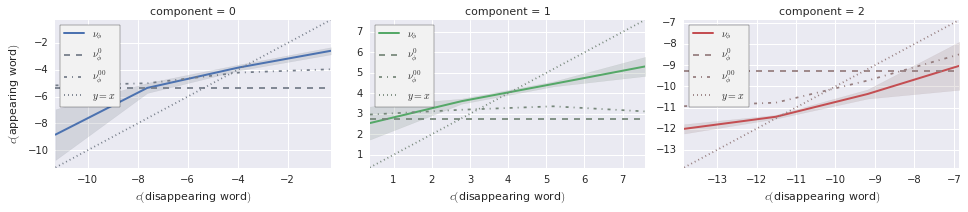

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographical_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 2672 (cluster-unique) substitutions, but the PCA is in fact computed on 1006 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.